**Importing Libraries required for analysis**

In [2]:
#Import the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install xgboost

In [4]:
## importing libraries required

import numpy as np # Import numpy library

import pandas as pd # Import pandas library
pd.set_option('display.max_columns', 300)

import matplotlib.pyplot as plt # Import matplotlib library
%matplotlib inline

import seaborn as sns # Import seaborn library
sns.set_style("darkgrid")

from sklearn.impute import KNNImputer # Import KNNImputer to impute missing values

from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler for scaling

from sklearn.decomposition import PCA # Required for PCA

from sklearn.decomposition import IncrementalPCA # Required for Incremental PCA

from sklearn.linear_model import LogisticRegression # Required for Logistic Regression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn import metrics # Required for analysis of confusion matrix

from sklearn.metrics import precision_score, recall_score # Required for calculation of precision and recall_score

from sklearn.metrics import precision_recall_curve # Required for calculation of precision and recall trade off

import statsmodels.api as sm # Required for Model Building

# ROC Curve
from sklearn.metrics import RocCurveDisplay

from sklearn import tree # Required for decision tree

from sklearn.ensemble import RandomForestClassifier # Required for Random Forest

import xgboost as xgb  # Import XGBoost after installation
print(xgb.__version__)  # Verify the installation by printing the version 

from sklearn import model_selection # Required for train-test split and GridSearchCV

2.1.3


**Read the data for understanding different attributes and values they contain**

In [6]:
df = pd.read_csv("telecom_churn_data.csv", sep = ",", encoding = "ISO-8859-1", header = 0)
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

**Check the statistical description of all attributes in table**

In [8]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

**Check the number of rows and columns**

In [10]:
df.shape

(99999, 226)

**Displays DataFrame details, including column types, non-null counts, and memory**

In [12]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

**Improve Data Quality by removing unnecessary columns**

Identifying and Removing Irrelevant & Unnecessary Columns for Effective Data Analysis
1) Mobile Number: Not relevant for analysis
2) Single-Value Numerical Columns: Provide no variability or insights
3) Date Columns: Not significant for the current analysis

In [15]:
# Columns viz. Mobile Number & Date_of_last_rech are not useful for analysis & Last date of month columns have same values across all rows. 
#Therefore, these columns will be removed
columns_to_delete = ['mobile_number','last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8', 'date_of_last_rech_data_9'] 


num_dtypes = ['int32','int64','float32','float64']
numerical_col = df.select_dtypes(include=num_dtypes).columns # getting a list of numerical columns

for col in numerical_col:
    if (df[col].min() == df[col].max()):
        columns_to_delete.append(col)


# Enlist the columns that are deleted as result of above code
columns_to_delete 

['mobile_number',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

1. Identify columns with more than 70% null values.  
2. Append these columns to the columns_to_delete variable.  
3. Acknowledge that some null values may be meaningful but note the risk of introducing bias when imputing them.  
4. Remove these columns as they are not important for the analysis.  

In [17]:
for col in df.columns:
    if (df[col].isnull().sum()/df.shape[0] >= 0.7):
        columns_to_delete.append(col) # append columns having more than 70% null values
        print(col + " :  " +str(100*df[col].isnull().sum()/df.shape[0])) # Display the columns with more than 70% null values along with their respective percentages of null values

date_of_last_rech_data_6 :  74.84674846748467
date_of_last_rech_data_7 :  74.42874428744287
date_of_last_rech_data_8 :  73.66073660736608
date_of_last_rech_data_9 :  74.07774077740777
total_rech_data_6 :  74.84674846748467
total_rech_data_7 :  74.42874428744287
total_rech_data_8 :  73.66073660736608
total_rech_data_9 :  74.07774077740777
max_rech_data_6 :  74.84674846748467
max_rech_data_7 :  74.42874428744287
max_rech_data_8 :  73.66073660736608
max_rech_data_9 :  74.07774077740777
count_rech_2g_6 :  74.84674846748467
count_rech_2g_7 :  74.42874428744287
count_rech_2g_8 :  73.66073660736608
count_rech_2g_9 :  74.07774077740777
count_rech_3g_6 :  74.84674846748467
count_rech_3g_7 :  74.42874428744287
count_rech_3g_8 :  73.66073660736608
count_rech_3g_9 :  74.07774077740777
av_rech_amt_data_6 :  74.84674846748467
av_rech_amt_data_7 :  74.42874428744287
av_rech_amt_data_8 :  73.66073660736608
av_rech_amt_data_9 :  74.07774077740777
arpu_3g_6 :  74.84674846748467
arpu_3g_7 :  74.428744287

The final list of columns to be removed before identifying high-value customers

In [19]:
columns_to_delete

['mobile_number',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count

In [20]:
df.drop(columns_to_delete, axis = 1, inplace = True) # drop the columns enlisted above

In [21]:
df.shape #shape of the dataframe after cleaning the dataset i.e. dropping/deleting the unwanted columns

(99999, 165)

**Enriching the Data Quality by changing datatype columns by on the basis of distinct values**

1. Identify columns with 31 or fewer unique values  
2. Convert these columns to the categorical data type to ensure accurate representation

In [24]:
toConvert = []

for col in df.columns:
    uniqueValue = df[col].nunique() # Retrieving the unique values for each column
    if (uniqueValue <= 31): # Find out columns with 31 or fewer unique values.
        print(col + " : " + str(uniqueValue)) # Display these columns along with the count of its unique values
        toConvert.append(col)

monthly_2g_6 : 5
monthly_2g_7 : 6
monthly_2g_8 : 6
monthly_2g_9 : 5
monthly_3g_6 : 12
monthly_3g_7 : 15
monthly_3g_8 : 12
monthly_3g_9 : 11
sachet_3g_6 : 25
sachet_3g_7 : 27
sachet_3g_8 : 29
sachet_3g_9 : 27


1. Examine the unique value counts for the columns mentioned above
2. Analyze the distribution to determine if these columns are skewed 
3. Assess the columns before converting them to the 'object' (categorical) data type

In [26]:
for col in toConvert:
    print(col)
    print(df[col].value_counts(normalize = True)*100)
    print("------------")

monthly_2g_6
monthly_2g_6
0    92.674927
1     6.728067
2     0.562006
3     0.028000
4     0.007000
Name: proportion, dtype: float64
------------
monthly_2g_7
monthly_2g_7
0    92.435924
1     6.855069
2     0.669007
3     0.033000
4     0.005000
5     0.002000
Name: proportion, dtype: float64
------------
monthly_2g_8
monthly_2g_8
0    92.591926
1     6.775068
2     0.586006
3     0.037000
4     0.008000
5     0.002000
Name: proportion, dtype: float64
------------
monthly_2g_9
monthly_2g_9
0    93.735937
1     5.695057
2     0.530005
3     0.033000
4     0.006000
Name: proportion, dtype: float64
------------
monthly_3g_6
monthly_3g_6
0     94.290943
1      4.472045
2      0.861009
3      0.237002
4      0.076001
5      0.034000
6      0.012000
7      0.009000
8      0.003000
9      0.002000
11     0.002000
14     0.001000
Name: proportion, dtype: float64
------------
monthly_3g_7
monthly_3g_7
0     94.326943
1      4.263043
2      1.016010
3      0.227002
4      0.074001
5      0.042

- The above columns are highly skewed, with over 90% of values being '0'.  
- Due to this skewed distribution, these columns do not provide meaningful insights.  
- Therefore, drop these columns from the dataset.  

In [28]:
df.drop(toConvert, axis = 1, inplace = True) #Drop these columns from the dataset

In [29]:
df.shape

(99999, 153)

1. Remove high-missing and highly skewed columns.  
2. Impute the remaining columns that contain null values.  
3. Analyze the columns with null values to determine the imputation strategy.

In [31]:
null_cols = [] # List of column names which contain null values.

for col in df.columns:
    if ((df[col].isnull().sum() / df.shape[0]) > 0): # find columns with null percentage greater than 0
        null_cols.append(col)
        print(col + " : " +str(100 * df[col].isnull().sum() / df.shape[0])) # Display only the columns containing null values along with their percentage of missing data.

onnet_mou_6 : 3.937039370393704
onnet_mou_7 : 3.8590385903859037
onnet_mou_8 : 5.3780537805378055
onnet_mou_9 : 7.745077450774508
offnet_mou_6 : 3.937039370393704
offnet_mou_7 : 3.8590385903859037
offnet_mou_8 : 5.3780537805378055
offnet_mou_9 : 7.745077450774508
roam_ic_mou_6 : 3.937039370393704
roam_ic_mou_7 : 3.8590385903859037
roam_ic_mou_8 : 5.3780537805378055
roam_ic_mou_9 : 7.745077450774508
roam_og_mou_6 : 3.937039370393704
roam_og_mou_7 : 3.8590385903859037
roam_og_mou_8 : 5.3780537805378055
roam_og_mou_9 : 7.745077450774508
loc_og_t2t_mou_6 : 3.937039370393704
loc_og_t2t_mou_7 : 3.8590385903859037
loc_og_t2t_mou_8 : 5.3780537805378055
loc_og_t2t_mou_9 : 7.745077450774508
loc_og_t2m_mou_6 : 3.937039370393704
loc_og_t2m_mou_7 : 3.8590385903859037
loc_og_t2m_mou_8 : 5.3780537805378055
loc_og_t2m_mou_9 : 7.745077450774508
loc_og_t2f_mou_6 : 3.937039370393704
loc_og_t2f_mou_7 : 3.8590385903859037
loc_og_t2f_mou_8 : 5.3780537805378055
loc_og_t2f_mou_9 : 7.745077450774508
loc_og_t2c

Replace all null values using Median values for that column. Since we have already removed columns which are highly skewed we can perform imputation using Mean values.

**Enriching the Data Quality by replacing null values**

In [34]:
# Replace NaN with mean or median as a simpler approach
df.fillna(df.median(), inplace=True)

In [35]:
df.shape

(99999, 153)

In [36]:
df.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100        34.31        32.33         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0        29.84         96.31        91.735          0.00         87.29   
1        18.34         15.74        99.840        304.76         53.76   
2        74.81        143.33       220.590        208.36        118.91   
3       241.71        123.31       109.010         71.68        113.54   
4        58.78         76.96        91.880        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            0.0           0.00           0.00           0.00            0.0   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             11.91   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0             11.61              0.00             11.26             41.03   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0             40.43              0.00             39.12              0.00   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00               0.0   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0              0.00              0.00              0.00         65.11   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00              0.00              0.00        183.03   
4              0.00              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0        63.685          0.00         61.84              0.00   
1       150.510        299.54         72.11              0.23   
2        67.410         67.66         64.81              4.34   
3       118.680         37.99         83.03             26.23   
4       241.330        208.16      

Re-verifying to ensure if there are any null values present in the dataset

In [38]:
df.isnull().values.any()

False

**For further analysis filtering the high-value customers**

In [40]:
for col in df.columns:
    if col.startswith('total_rech_amt') :
        print(col)

total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9


**To identify and filter high-value customers, we will follow the steps provided below:**

*Calculate Average Recharge Amount:*
Determine the average recharge amount for customers during the first two months (referred to as the "good phase").

*Identify the 70th Percentile:*
Compute the 70th percentile of the average recharge amounts.

*Filter Customers:*
Select customers whose average recharge amount is equal to or greater than the 70th percentile determined.

In [42]:
#Determine the average recharge amount for customers during good phase.
df['total_rech_amt_good_avg'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2 
df.shape

(99999, 154)

In [43]:
# we have derived a new feature as avergae of amounts of recharge in 6th and 7th months. We can drop columns 'total_rech_amt_6','total_rech_amt_7'
df.drop(['total_rech_amt_6','total_rech_amt_7'], axis = 1, inplace = True) 
df.shape

(99999, 152)

In [44]:
#Compute the 70th percentile of the average recharge amounts.
df['total_rech_amt_good_avg'].quantile([0.7])

0.7    368.5
Name: total_rech_amt_good_avg, dtype: float64

In [45]:
#Select customers whose average recharge amount is equal to or greater than 368.5
high_df = df[df['total_rech_amt_good_avg'] >= 368.5]
high_df.shape

(30011, 152)

**Now we will be deriving the churn**

Will create a column 'churn' based on the 9th month:

Users who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.
Attributes:

1) total_ic_mou_9
2) total_og_mou_9
3) vol_2g_mb_9
4) vol_3g_mb_9

### Steps to Create the 'Churn' Column Based on the 9th Month:

1. **Define Churn Criteria**:  
   - Identify users who have not made any calls (incoming or outgoing) **and** have not used mobile internet during the churn phase.  

2. **Attributes Used for Evaluation are as followed**:  
   - total_ic_mou_9 
   - total_og_mou_9
   - vol_2g_mb_9 
   - vol_3g_mb_9 

In [49]:
high_df[(high_df['total_ic_mou_9'] == 0) & (high_df['total_og_mou_9'] == 0) & (high_df['vol_2g_mb_9'] == 0) & (high_df['vol_3g_mb_9'] == 0)]

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7      1069.180  1349.850  3171.480  500.000        57.84        54.68   
97      374.863   294.023   183.043    0.000       433.59       415.66   
111     596.301   146.073     0.000    0.000        55.19         3.26   
143     695.609    39.981     0.000    0.000      1325.91        28.61   
188     734.641   183.668     0.000    0.000         4.38         0.98   
...         ...       ...       ...      ...          ...          ...   
99827  1053.035    20.060     0.000    0.000      1263.94         0.06   
99868   594.210   591.700   506.715  200.145       230.93        73.76   
99885   456.151   486.175   526.636    8.750       741.94       931.84   
99887   816.531   628.336   142.974    0.010       326.06       299.59   
99961   283.572   464.217   138.881    0.000        75.24       168.46   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7            52.29        29.84        453.43        567.16        325.91   
97          221.06        29.84         74.54         43.66         31.86   
111          32.36        29.84         45.51         12.34         92.14   
143          32.36        29.84         13.91          1.89         92.14   
188          32.36        29.84        105.16         39.39         92.14   
...            ...          ...           ...           ...           ...   
99827        32.36        29.84        151.26          0.00         92.14   
99868        55.93        48.19        194.11        191.04         59.06   
99885       966.33         4.74         63.53         27.08         50.06   
99887         8.61         0.00        522.14        514.78        436.74   
99961        65.79        29.84        123.96        231.99        132.51   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7             87.29          16.23          33.49          31.64   
97            87.29           0.00           0.00           6.16   
111           87.29           0.00           0.00           0.00   
143           87.29           0.00           8.94           0.00   
188           87.29           0.00           0.00           0.00   
...             ...            ...            ...            ...   
99827         87.29         385.51           0.00           0.00   
99868         33.64           0.00          80.41         147.03   
99885          0.83           0.00           0.00           4.31   
99887          0.03         172.53         182.14          10.76   
99961         87.29           0.00           0.00           0.00   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7               0.00          23.74          12.59          38.06   
97              0.00           0.00           0.00          23.91   
111             0.00           0.00           0.00           0.00   
143             0.00           0.00           8.53           0.00   
188             0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
99827           0.00         899.01           0.06           0.00   
99868          68.36           0.00          19.60         114.99   
99885           2.11           0.00           0.00          39.84   
99887          15.16         530.71         472.48           0.00   
99961           0.00           0.00           0.00           0.00   

       roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7               0.00             51.39             31.38             40.28   
97              0.00              2.83             16.19              9.73   
111             0.00             55.19              3.26             11.73   
143             0.00             18.89              6.83             11.73   
188             0.00              4.38              0.98             11.73   
...              ...               ...               ...               ...   
998

### Steps for Assigning Values to the 'Churn' Column:

1. **Identify Churned Users**:  
   - There are 2,593 rows where users have been identified as churned.

2. **Assign Value for Churned Users**:  
   - For these rows, assign the value **'1'** in the new column 'churn'.

3. **Assign Value for Non-Churned Users**:  
   - For all other rows, assign the value **'0'** in the 'churn' column.

In [51]:
high_df['churn'] = np.where(((high_df['total_ic_mou_9']== 0) & (high_df['total_og_mou_9']== 0) & (high_df['vol_2g_mb_9']== 0) & (high_df['vol_3g_mb_9']== 0)), 1, 0)

In [52]:
# Verifying the count of rows where the churn value is set to 1.
len(high_df[high_df['churn'] == 1]) 

2593

**Steps to Remove Unnecessary Attributes for Churn Phase:**

1. **Identify Unneeded Attributes**:  
   - Since all churned customers have been tagged, the attributes specific to the churn phase are no longer necessary.

2. **Target Attributes with Specific Naming Patterns**:  
   - Drop all columns that contain **‘_9’** or similar patterns in their names, as they correspond to churn phase data.

3. **Clean the Dataset**:  
   - Remove these identified attributes to streamline the dataset and reduce memory usage.

In [54]:
churnCols = []

for col in high_df.columns:
    if col.endswith('_9'):
        churnCols.append(col)

print(churnCols) # Display the attributes corresponding to the 9th month.
print(len(churnCols)) # Display the count of columns associated with the churn phase.

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'sachet_2g_9']
37


In [55]:
final_df = high_df.copy() # create a new dataframe 

final_df.drop(churnCols, axis = 1, inplace = True)
final_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [56]:
final_df.shape

(30011, 116)

**Data Preparation for further analysis**

**Checking the churn percentage**

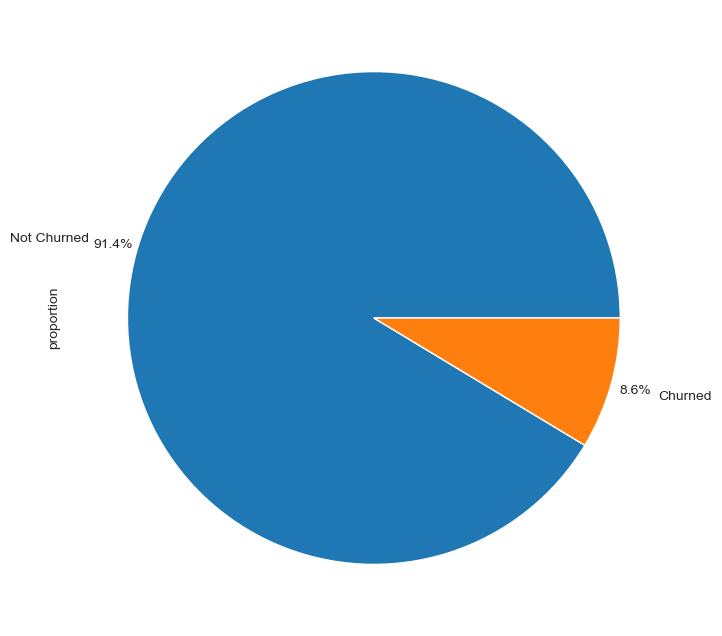

In [59]:
(final_df['churn'].value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2, figsize = (8,8), labels = ["Not Churned", "Churned"])

plt.show()

The **"Churn"** feature is highly imbalanced. To address this imbalance, we will utilize the **`class_weight`** parameter during the modeling process rather than relying on undersampling or oversampling techniques.

For a more effective exploratory analysis, we will create new derived features. Specifically, we will calculate the average values for each feature across the first two months (**Month 6 and Month 7**) and generate a new column representing these averages, reflecting the characteristics of the good phase.

In [61]:
month_6 = [] # store all the features with _6 in the end
month_7 = [] # store all the features with _7 in the end

for col in final_df.columns:
    if col.endswith('_6'):
        month_6.append(col)
    elif col.endswith('_7'):
        month_7.append(col)

print('Month 6')
print(month_6) # print all the column names with _6 in the end
print(len(month_6))

print('-------------')

print('Month 7')
print(month_7) # print all the column names with _7 in the end
print(len(month_7))

Month 6
['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'sachet_2g_6']
36
-------------
Month 7
['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',

In [62]:
final_df.shape

(30011, 116)

In [63]:
for i in range(0,len(month_6)): 
    final_df[month_6[i].rstrip('_6') + '_good_avg'] = (final_df[month_6[i]] + final_df[month_7[i]]) / 2 # strip _6 from end, and add good_avg in the end for the average of the good phase

final_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

Verifying the shape of the DataFrame after incorporating the newly derived features

In [65]:
final_df.shape

(30011, 152)

Dropping the features with **'_6'** and **'_7'** at the end, as they are no longer needed after deriving new features.

In [67]:
final_df.drop(month_6, axis = 1, inplace = True)
final_df.drop(month_7, axis = 1, inplace = True)
final_df.shape

(30011, 80)

Examining the final version of the DataFrame

In [69]:
final_df.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
7   3171.480        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
13   593.260       534.24        482.46          72.11           1.44   
16   187.894        70.61        162.76           0.00           0.00   
17    25.499         7.79          5.54           4.81          13.34   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
13             36.01            294.46             23.51              0.49   
16             67.38            128.28             10.26              0.00   
17              0.00              0.00              0.00              0.00   

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
7         255.79             12.01             49.14             16.68   
8          63.04             22.58             75.69              0.00   
13        353.99            498.23            156.94              0.00   
16        205.93              3.23             18.29              0.00   
17          0.00              0.00              0.00              0.00   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
13        655.18          1.29          4.78          0.0         1015.26   
16         21.53          0.00          5.91          0.0          233.38   
17          0.00          0.00          0.00          0.0            0.00   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
13             52.58            195.18              7.49        255.26   
16             28.89            150.16             32.71        211.78   
17              0.00              0.00              0.00          0.00   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
7              30.39            141.33             22.21        193.94   
8               0.10              0.65              0.00          0.75   
13            154.58            317.91              1.91        474.41   
16              6.33             73.93              2.18         82.44   
17              0.00              0.00              0.00          0.00   

    total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
7           428.74           0.0         31.59        15.14                 7   
8            16.54           0.0          0.00         0.00                14   
13         1144.53           0.0        393.39        21.44                11   
16          294.46           0.0          0.23         0.00                 2   
17            0.00           0.0          0.00         0.00                 4   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  \
7               3638            1580                 779         0.00   
8                120              30                  10         0.03   
13               717             130                   0         0.02   
16               160             130                 130         0.00   
17                30              30                   0         0.00   

    vol_3g_mb_8  sachet_2g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
7          0.00            0   802       57.74       19.38       18.74   
8         11.94            3   315       21.03      910.65      122.16   
13         0.00            3  2607        0.00        0.00        0.00   
16         0.00            0   511        0.00        2.45       21.89   
17  

In [70]:
final_df.describe(percentiles= (0.25,0.5,0.75,0.9,0.95,0.99))

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  30011.000000  30011.00000  30011.000000    30011.00000   30011.000000   
mean     534.857433    268.61183    377.901545       13.25627      21.469272   
std      492.259586    466.01448    475.492462       74.55207     106.244774   
min     -945.808000      0.00000      0.000000        0.00000       0.000000   
25%      289.609500     32.36000     95.695000        0.00000       0.000000   
50%      452.091000     99.44000    240.940000        0.00000       0.000000   
75%      671.150000    297.73500    482.610000        0.00000       0.000000   
90%      985.202000    723.61000    853.790000       18.68000      37.110000   
95%     1258.555500   1115.66000   1188.460000       62.79500     114.800000   
99%     1987.934400   2188.50400   2211.642000      288.48500     432.743000   
max    33543.624000  10752.56000  14007.340000     4169.81000    5337.040000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean          87.506619        168.852659          6.494314          1.712739   
std          234.594665        234.065949         20.220028          7.397562   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.760000         28.480000          0.000000          0.000000   
50%           28.640000         89.810000          0.160000          0.000000   
75%           84.670000        223.590000          4.680000          0.050000   
90%          196.910000        416.660000         16.960000          4.450000   
95%          324.145000        585.060000         31.310000          9.330000   
99%          956.502000       1092.586000         86.680000         28.871000   
max        10752.560000       4961.330000        928.490000        351.830000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  30011.000000      30011.000000      30011.000000      30011.000000   
mean     263.225832        172.196408        179.672245          1.789728   
std      365.285105        410.033964        416.708652         11.700376   
min        0.000000          0.000000          0.000000          0.000000   
25%       48.005000          0.000000          0.660000          0.000000   
50%      148.280000          5.930000         23.660000          0.000000   
75%      348.310000        132.820000        164.725000          0.000000   
90%      633.340000        567.340000        531.260000          1.730000   
95%      883.250000        936.485000        886.560000          7.180000   
99%     1689.069000       1938.130000       1905.805000         38.882000   
max    11039.910000       8014.430000      13950.040000        516.910000   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  \
count  30011.000000  30011.000000  30011.000000  30011.000000    30011.000000   
mean     353.884193      2.029314      6.885193      0.059131      623.774684   
std      616.035639     44.794926     22.893414      3.320320      685.983313   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        3.730000      0.000000      0.000000      0.000000      188.790000   
50%       72.890000      0.000000      0.490000      0.000000      435.330000   
75%      481.030000      0.000000      6.380000      0.000000      833.100000   
90%     1057.290000      0.000000     18.040000      0.000000     1393.510000   
95%     1518.820000      0.550000     30.230000      0.000000     1882.775000   
99%     2800.870000     31.240000     74.112000      0.000000     3251.785000   
max    13980.060000   5681.540000   1390.880000    394.930000    14043.060000   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
count      30011.000000      30011.000000      30011.000000  30011.000000   
mean          66.437989    

In [71]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30011 entries, 7 to 99997
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   arpu_8                     30011 non-null  float64
 1   onnet_mou_8                30011 non-null  float64
 2   offnet_mou_8               30011 non-null  float64
 3   roam_ic_mou_8              30011 non-null  float64
 4   roam_og_mou_8              30011 non-null  float64
 5   loc_og_t2t_mou_8           30011 non-null  float64
 6   loc_og_t2m_mou_8           30011 non-null  float64
 7   loc_og_t2f_mou_8           30011 non-null  float64
 8   loc_og_t2c_mou_8           30011 non-null  float64
 9   loc_og_mou_8               30011 non-null  float64
 10  std_og_t2t_mou_8           30011 non-null  float64
 11  std_og_t2m_mou_8           30011 non-null  float64
 12  std_og_t2f_mou_8           30011 non-null  float64
 13  std_og_mou_8               30011 non-null  float64


**Treat the Outlier in columns of the dataset**

Creating boxplots for each feature and addressing the outliers.

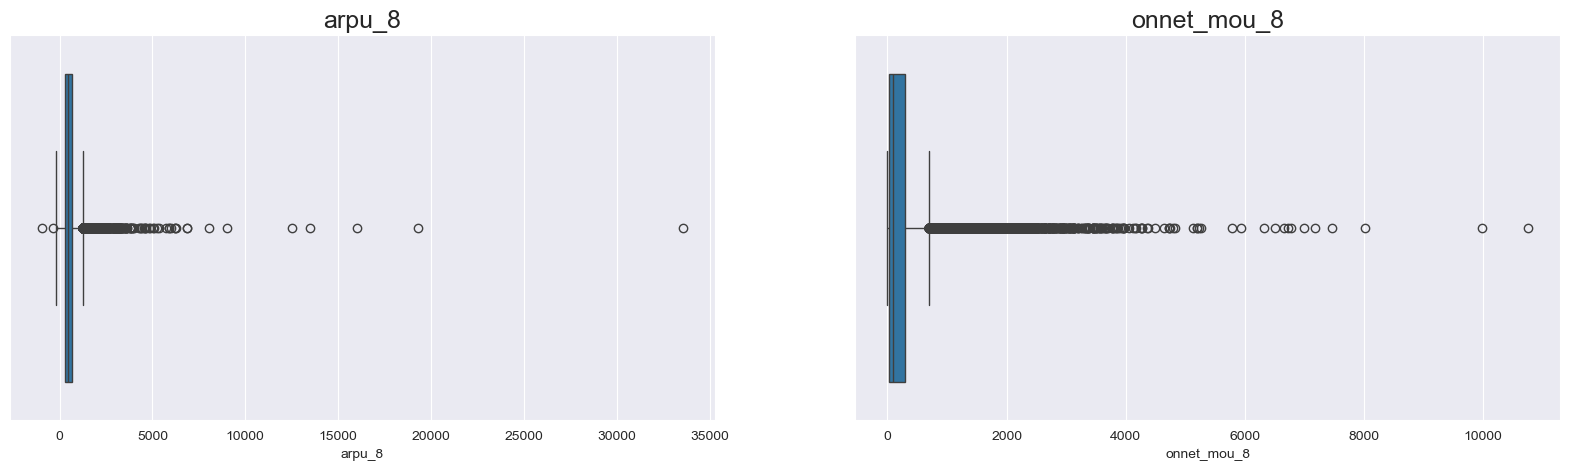

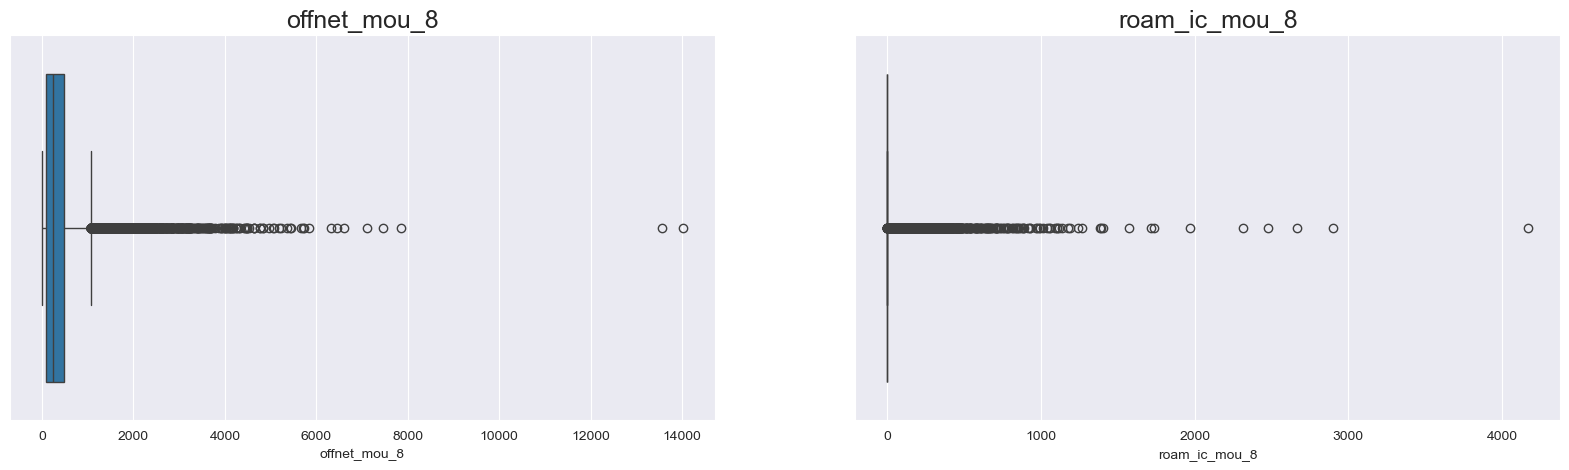

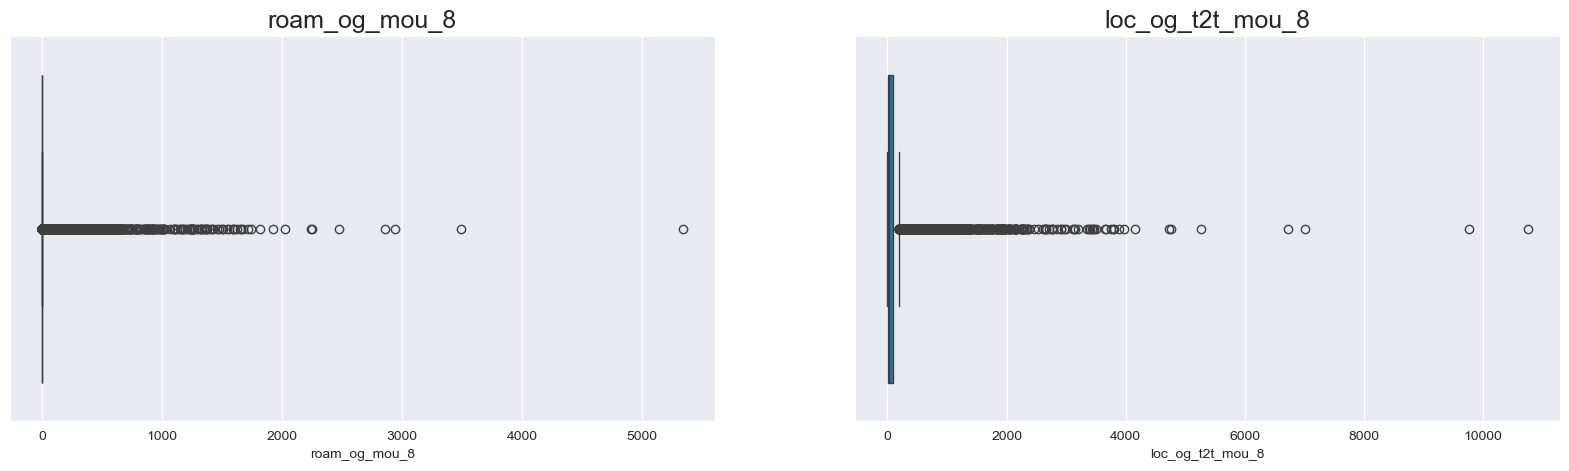

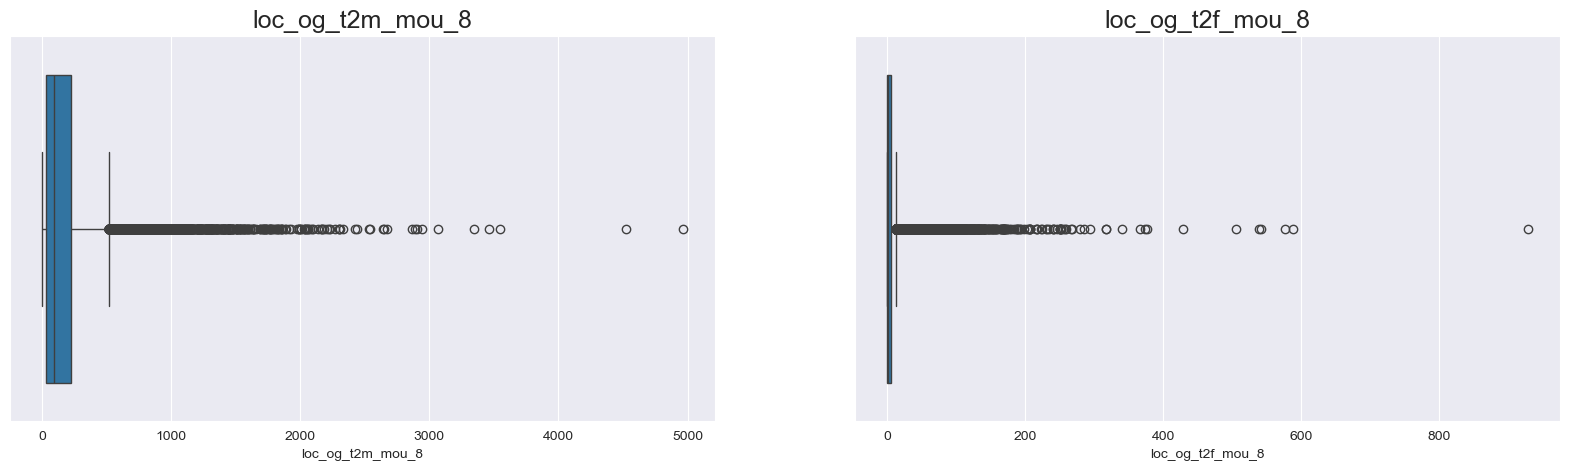

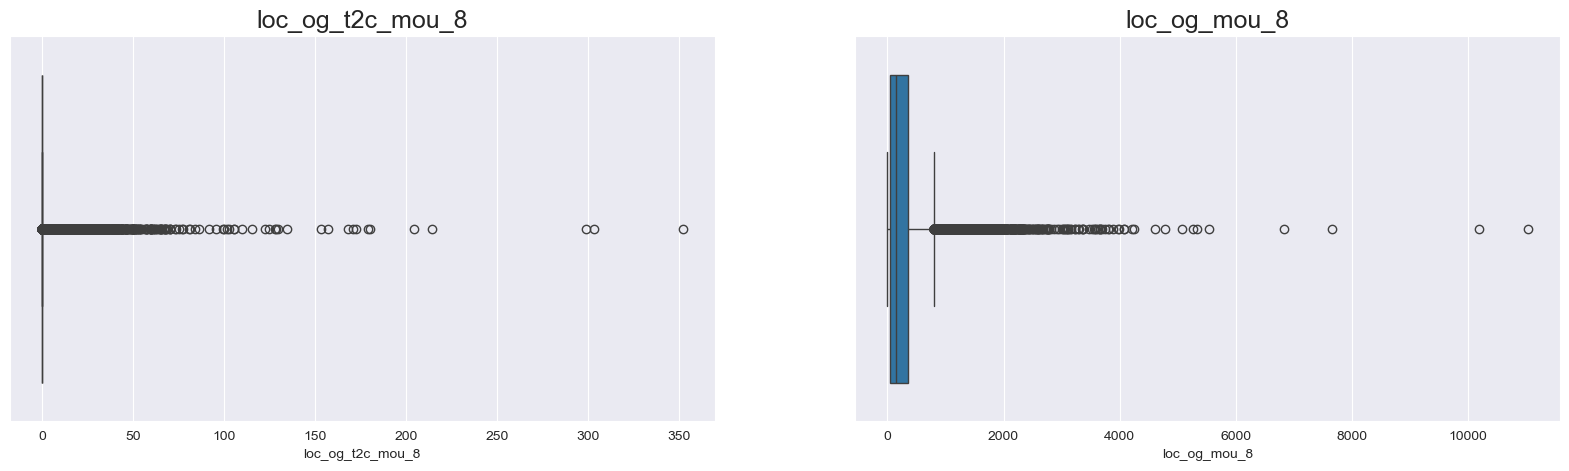

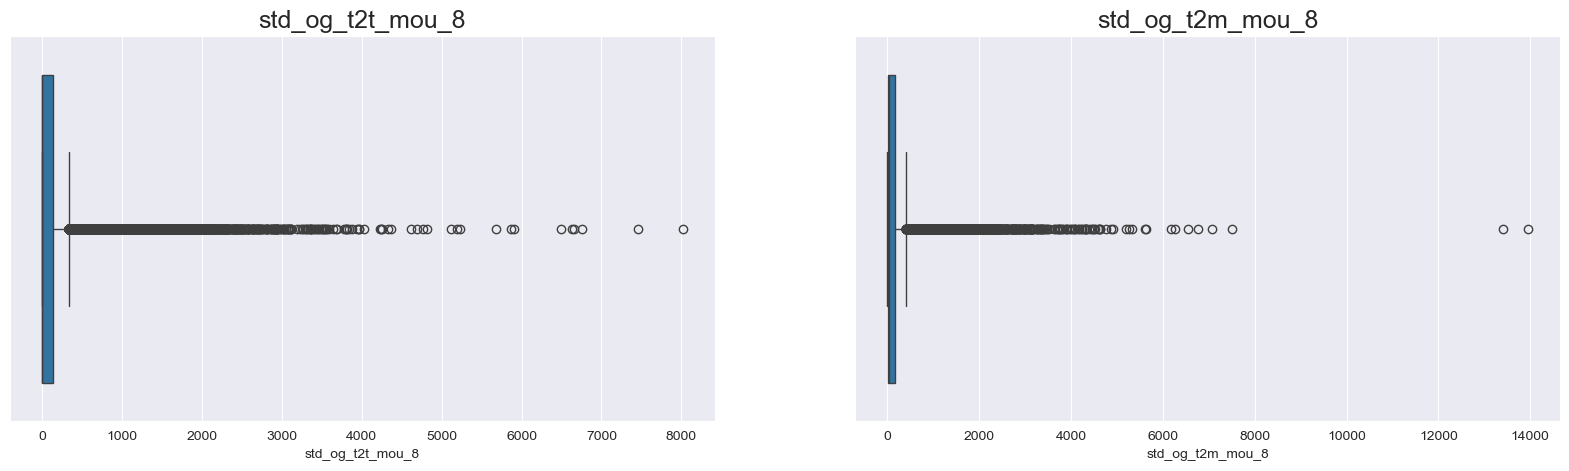

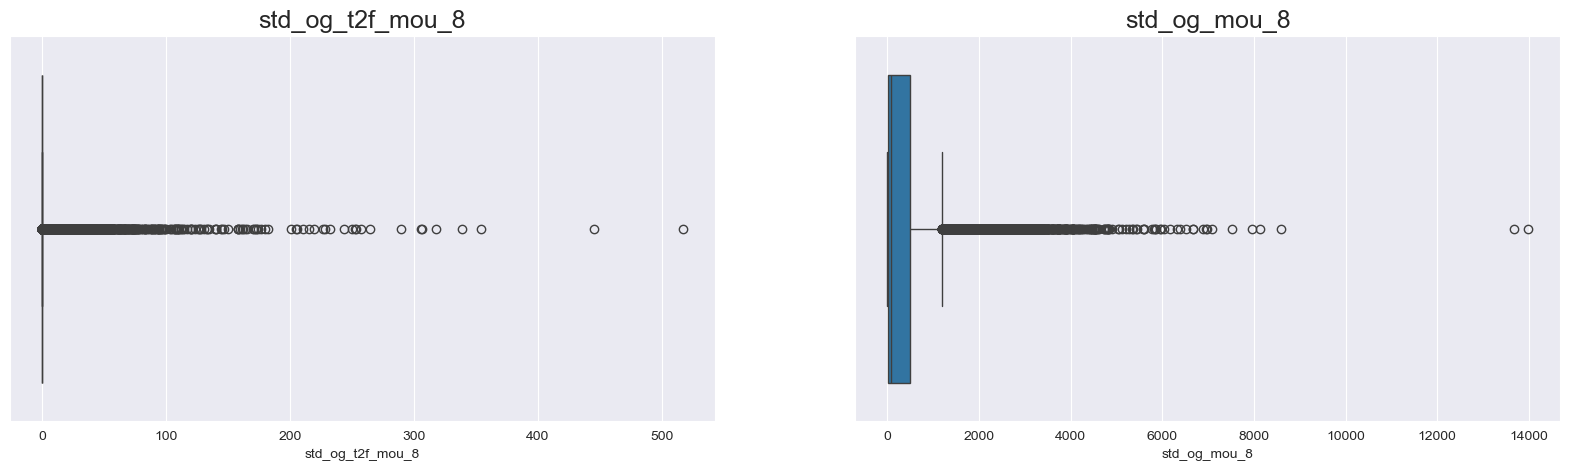

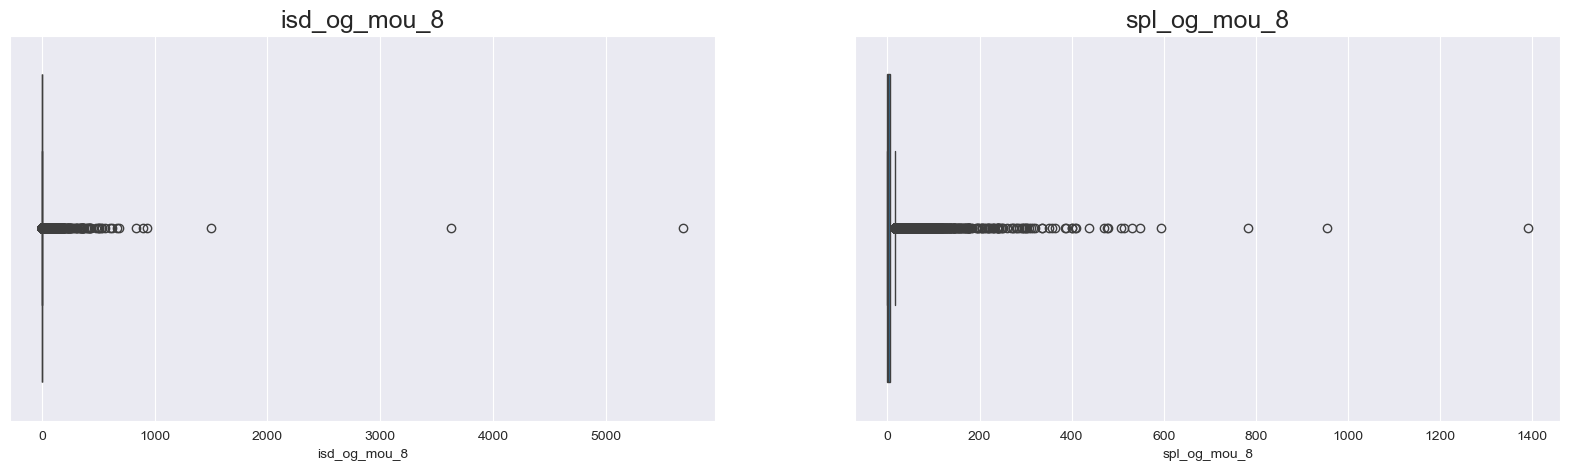

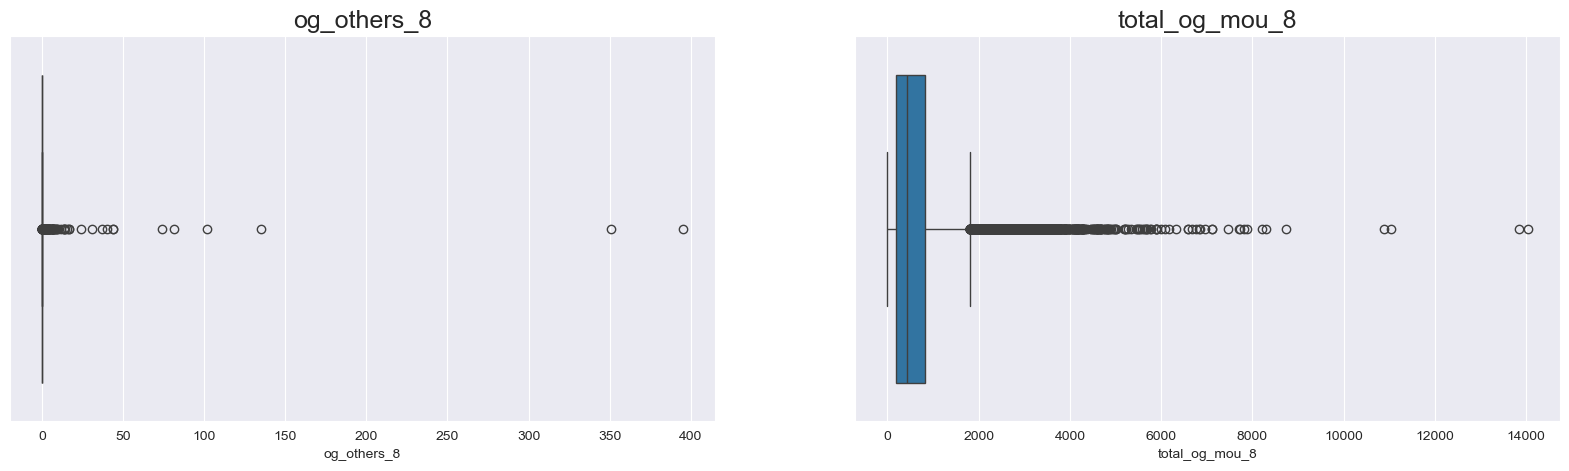

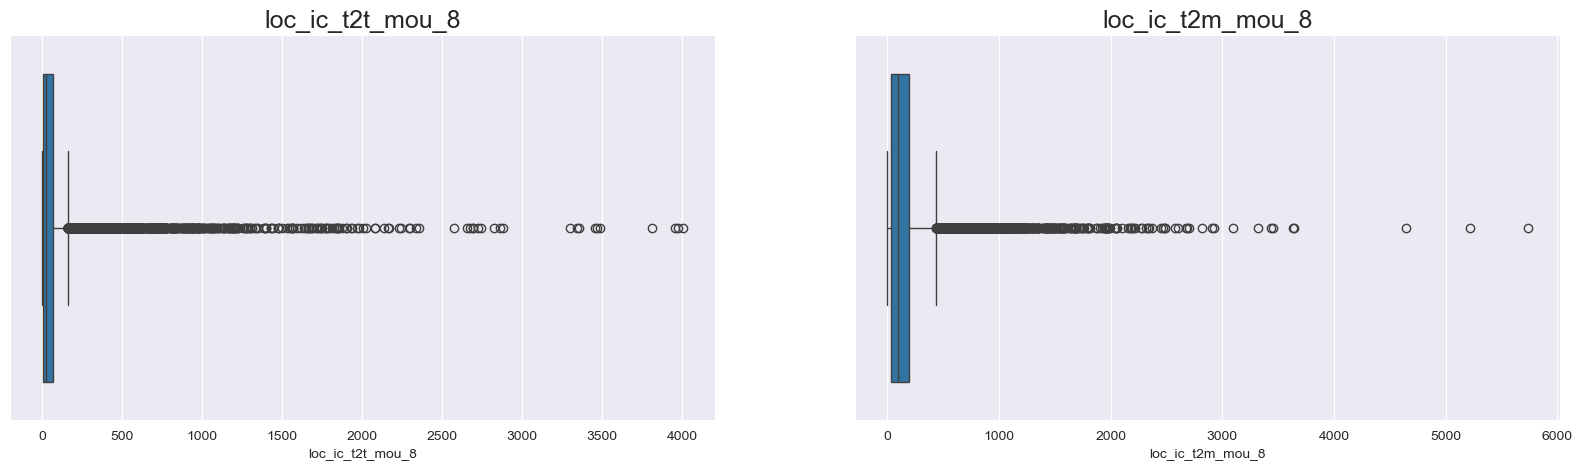

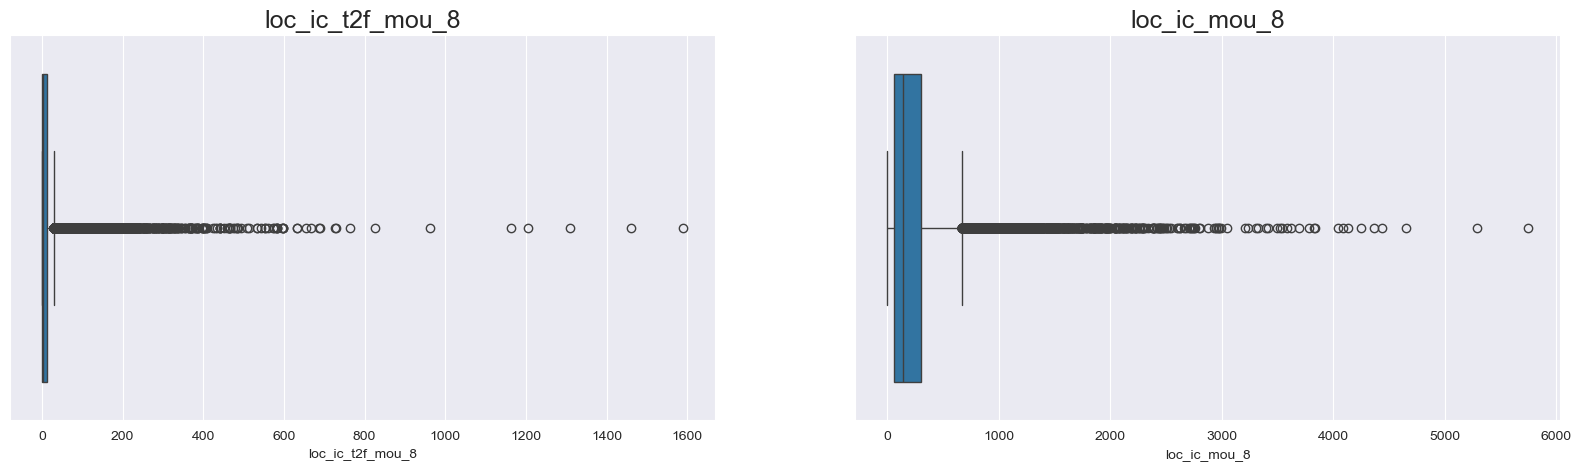

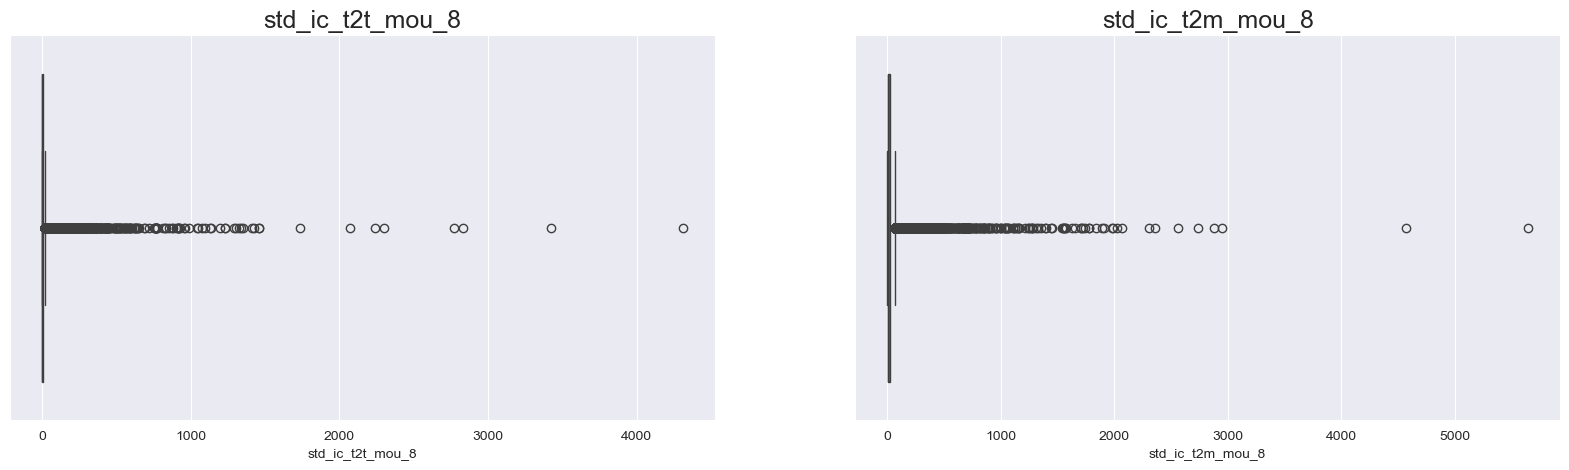

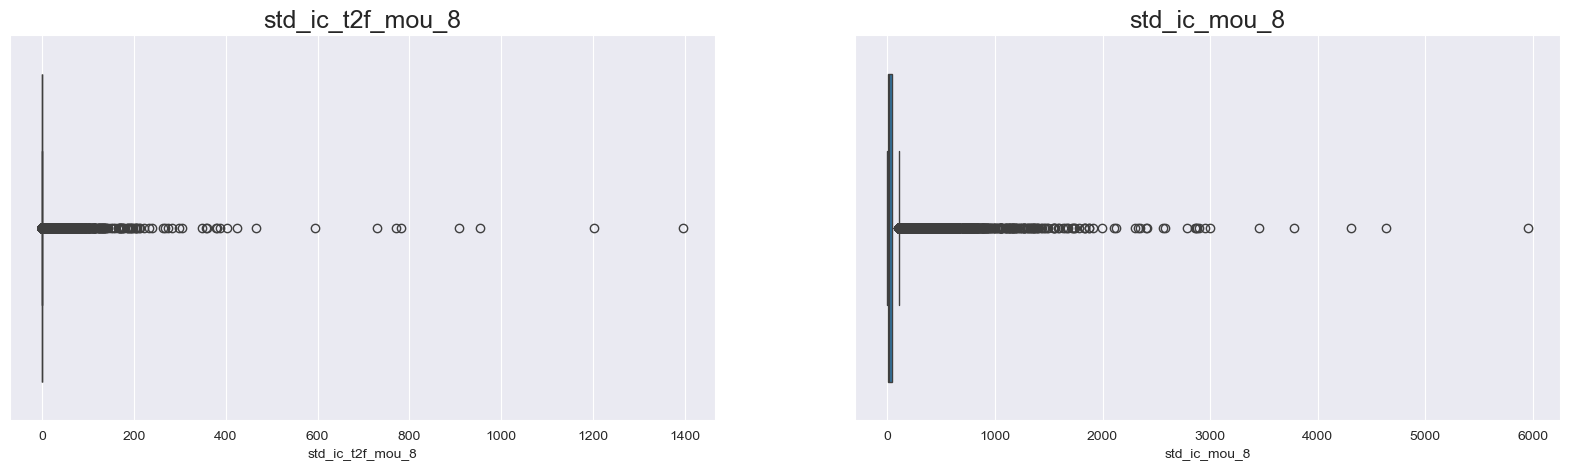

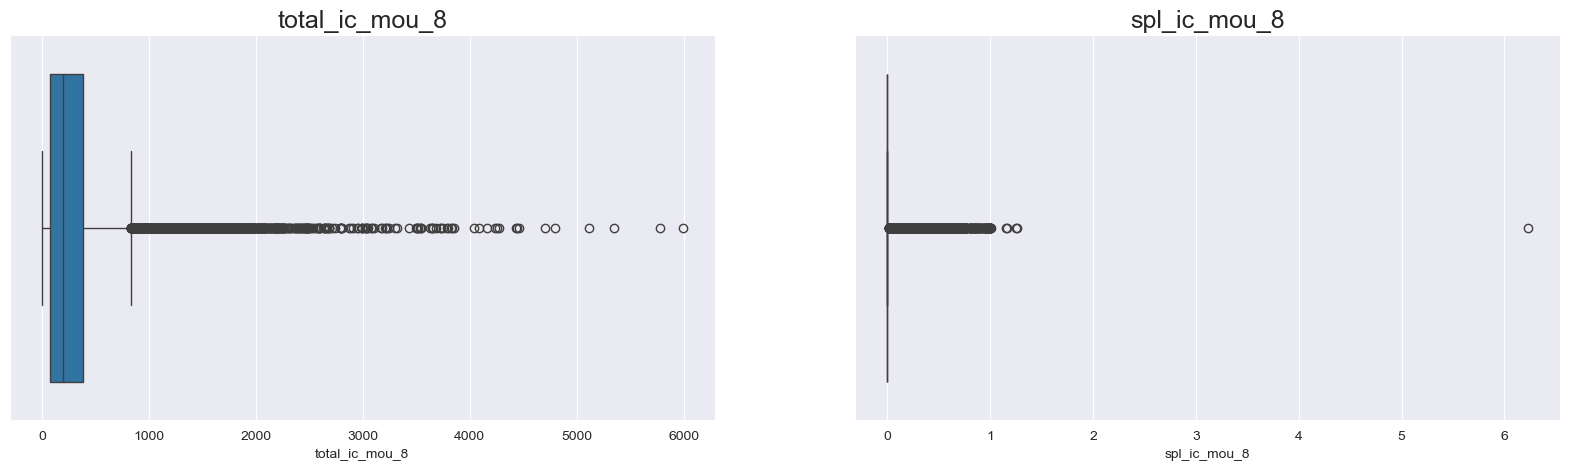

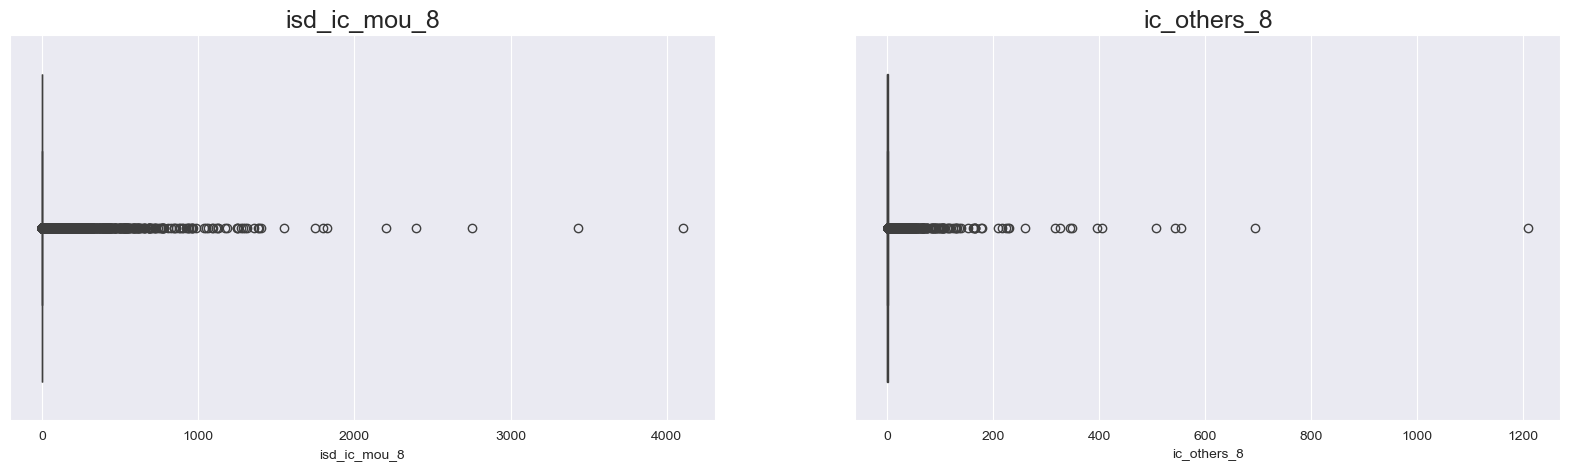

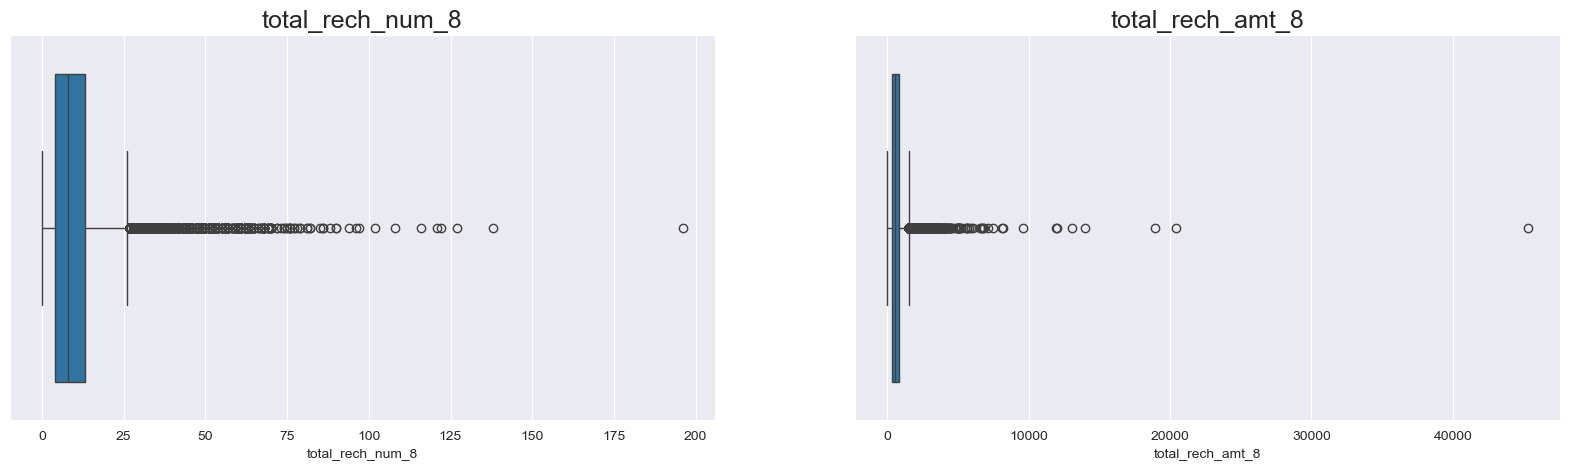

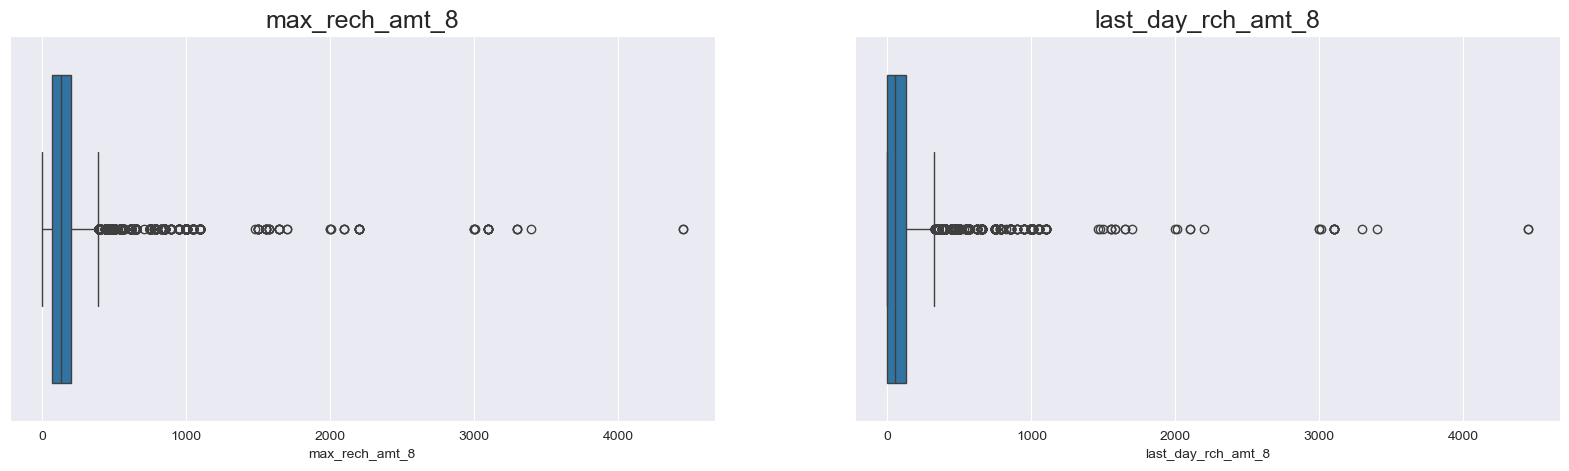

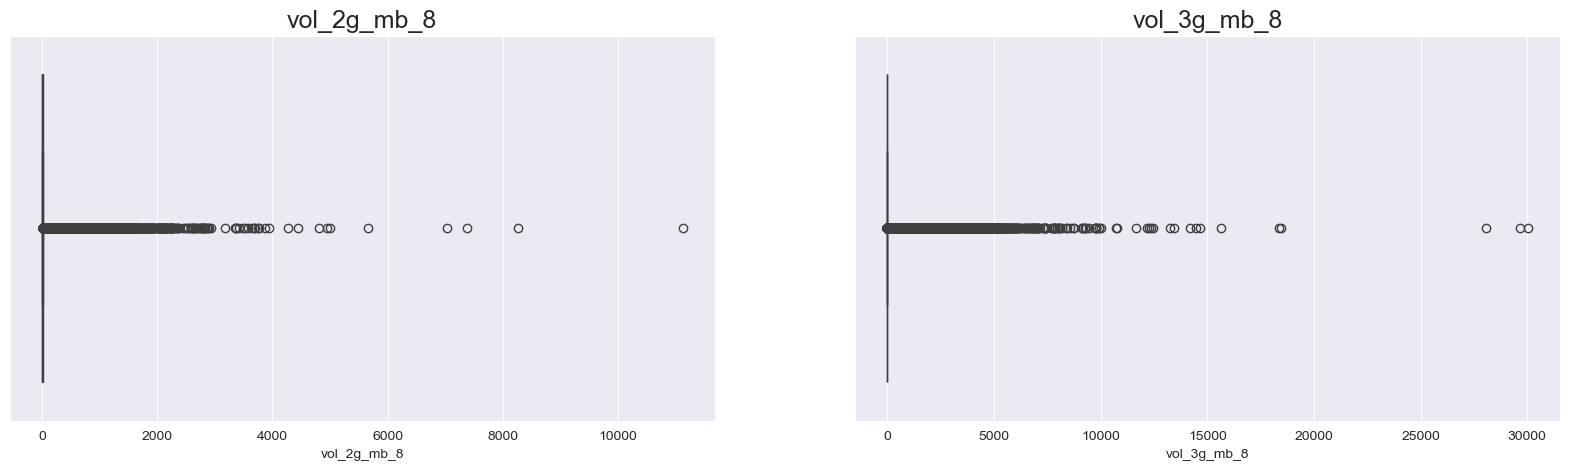

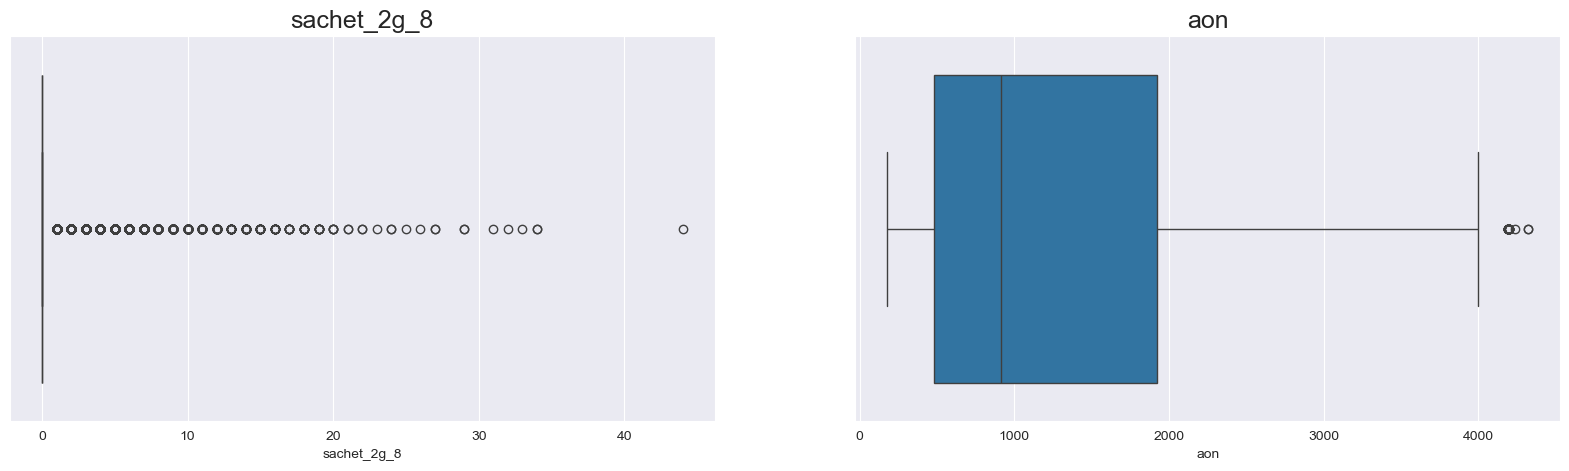

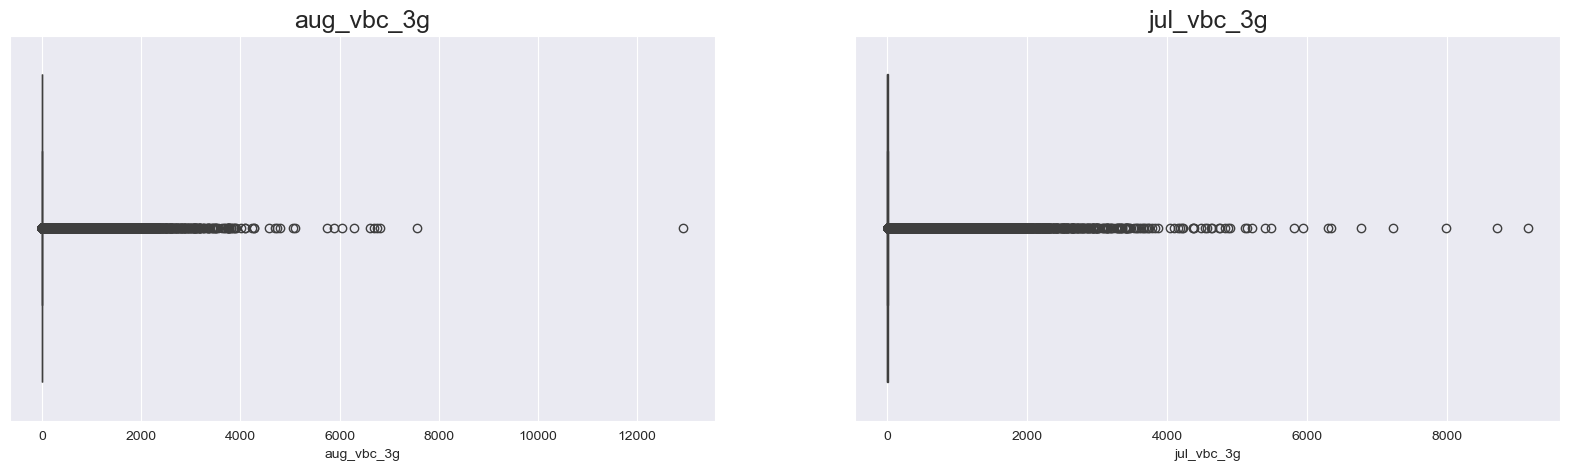

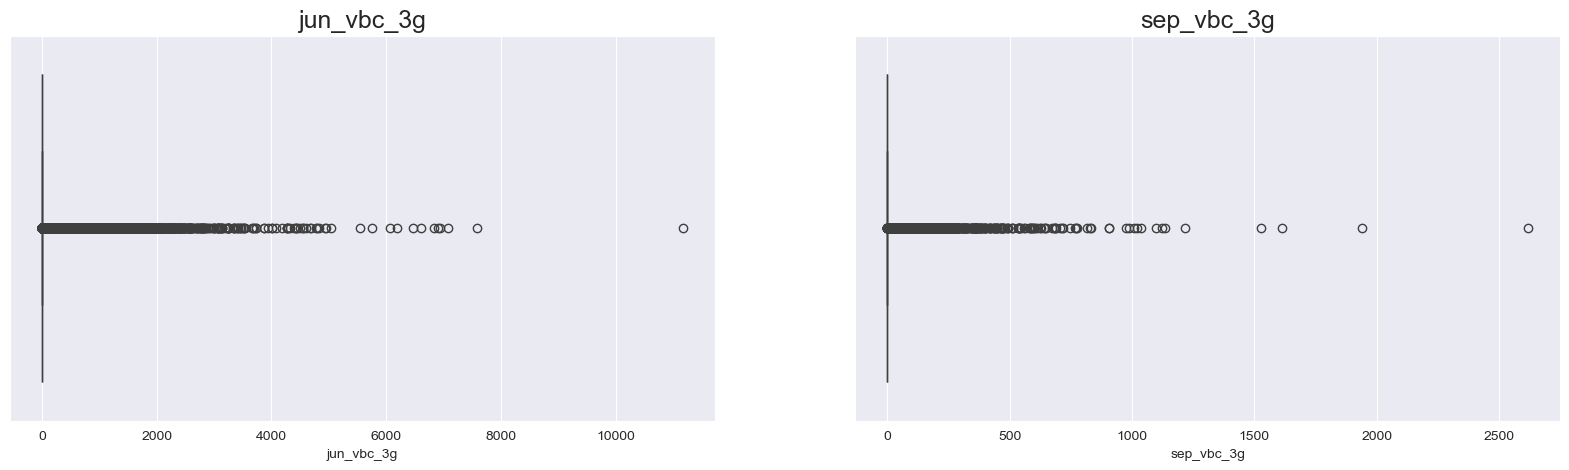

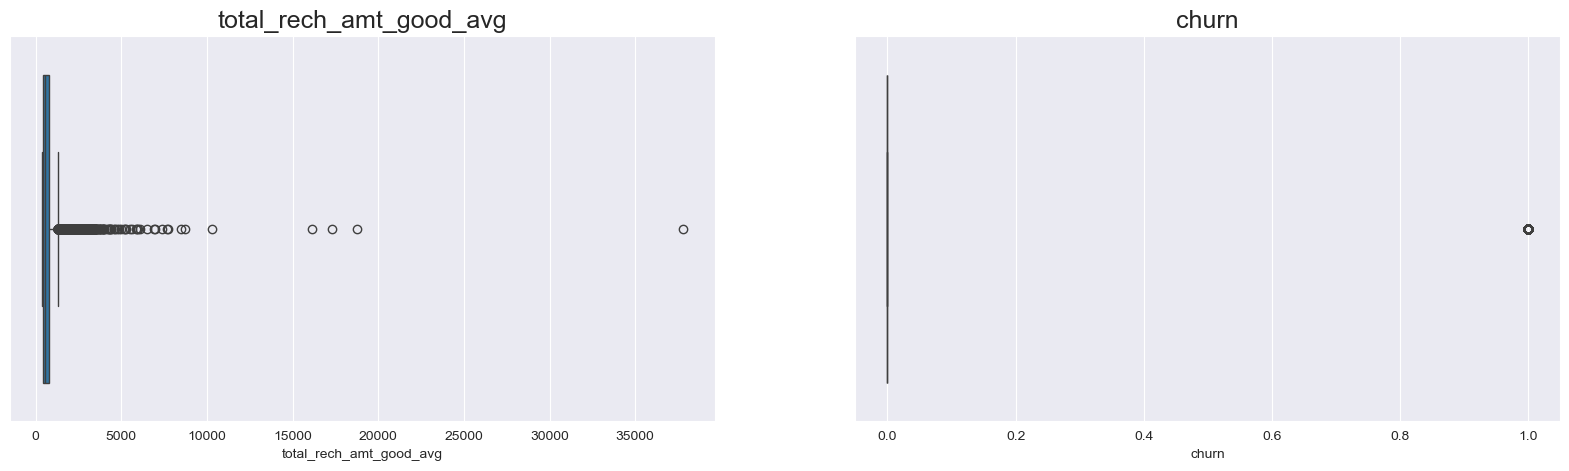

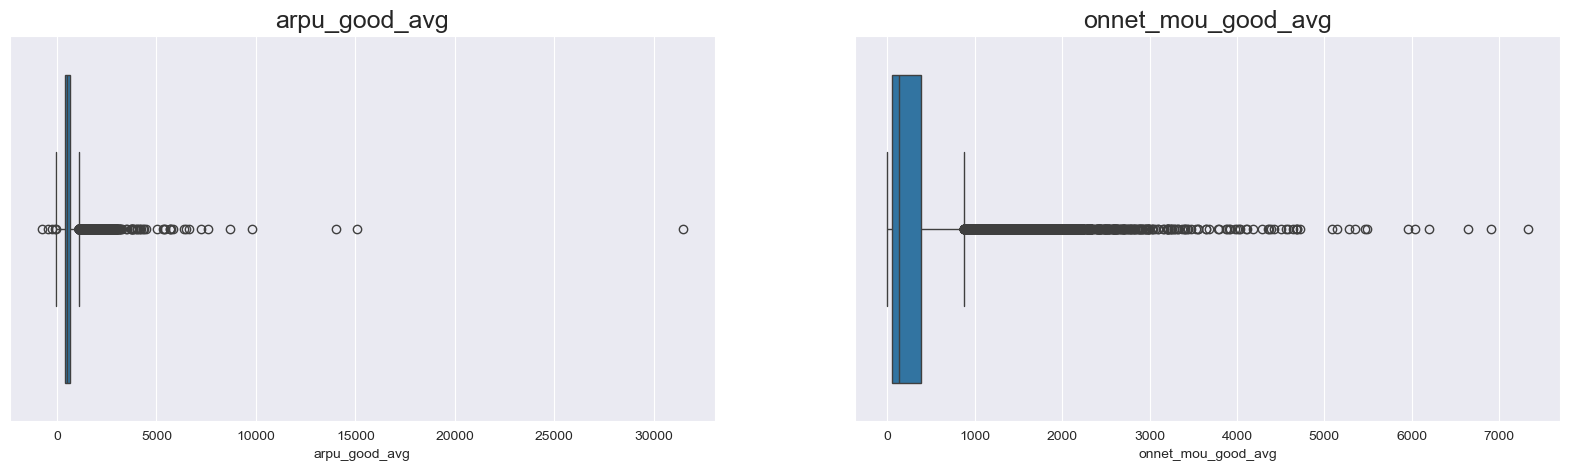

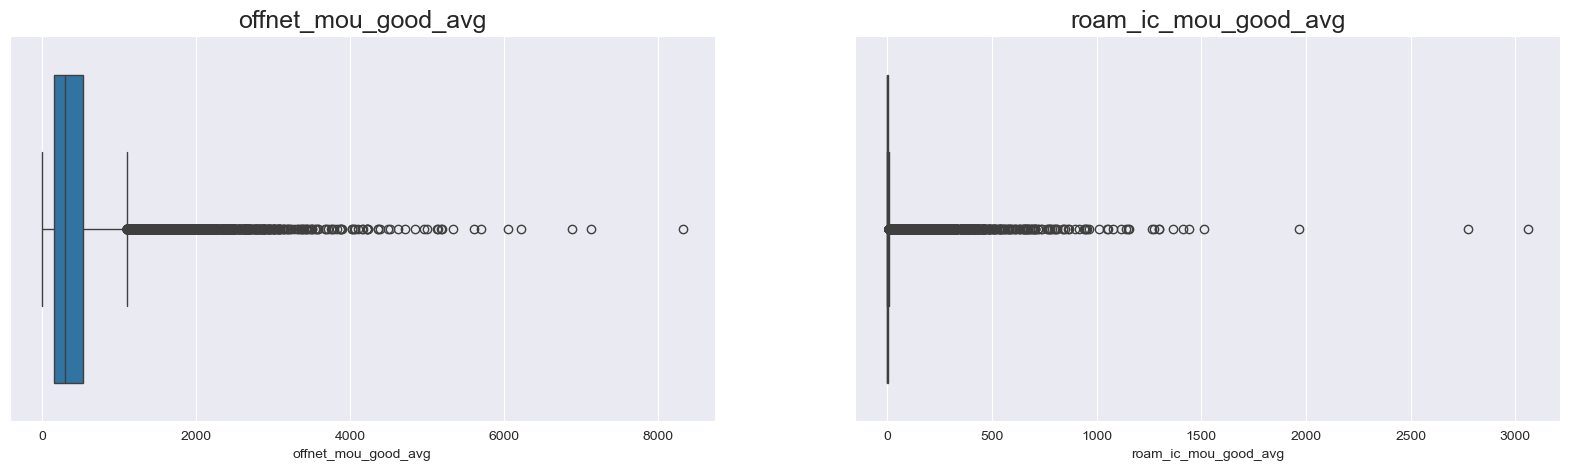

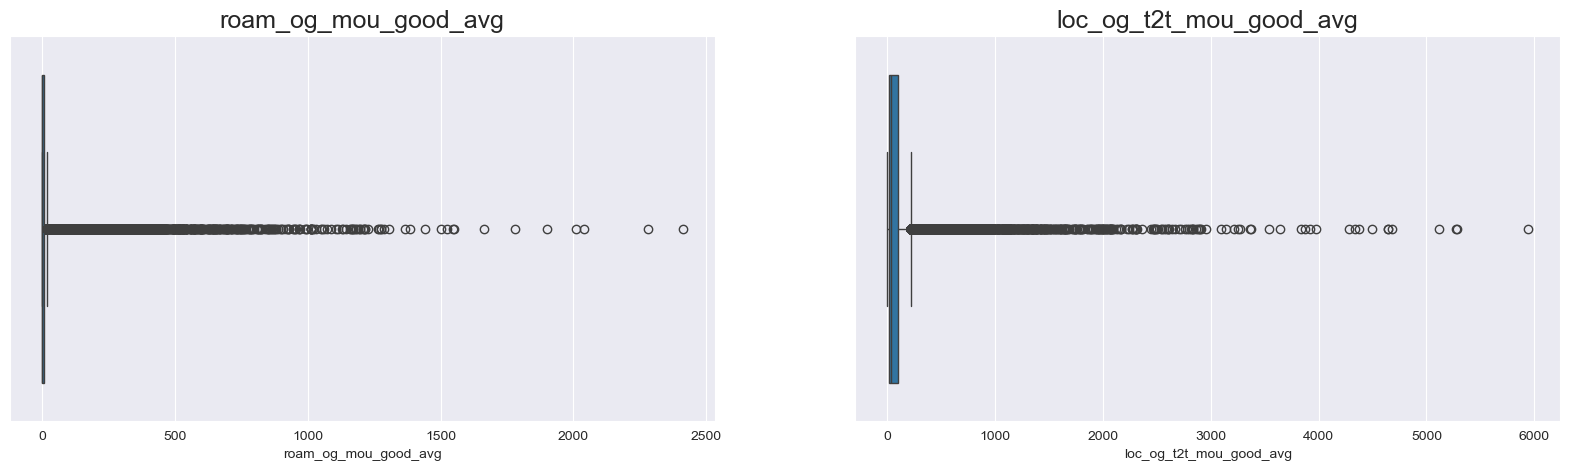

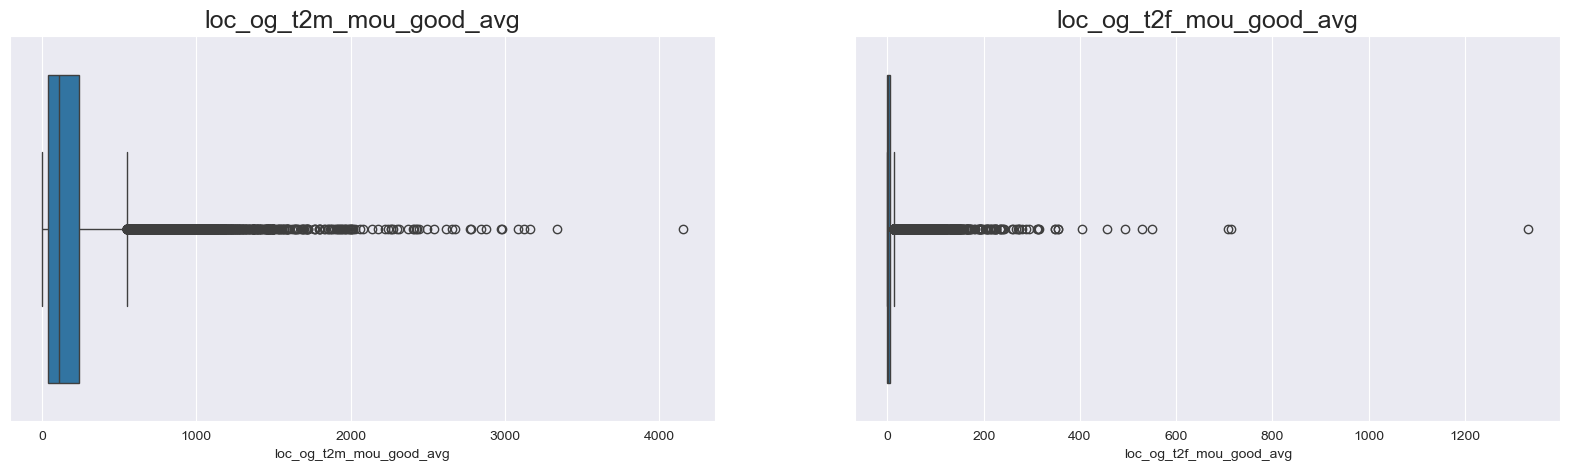

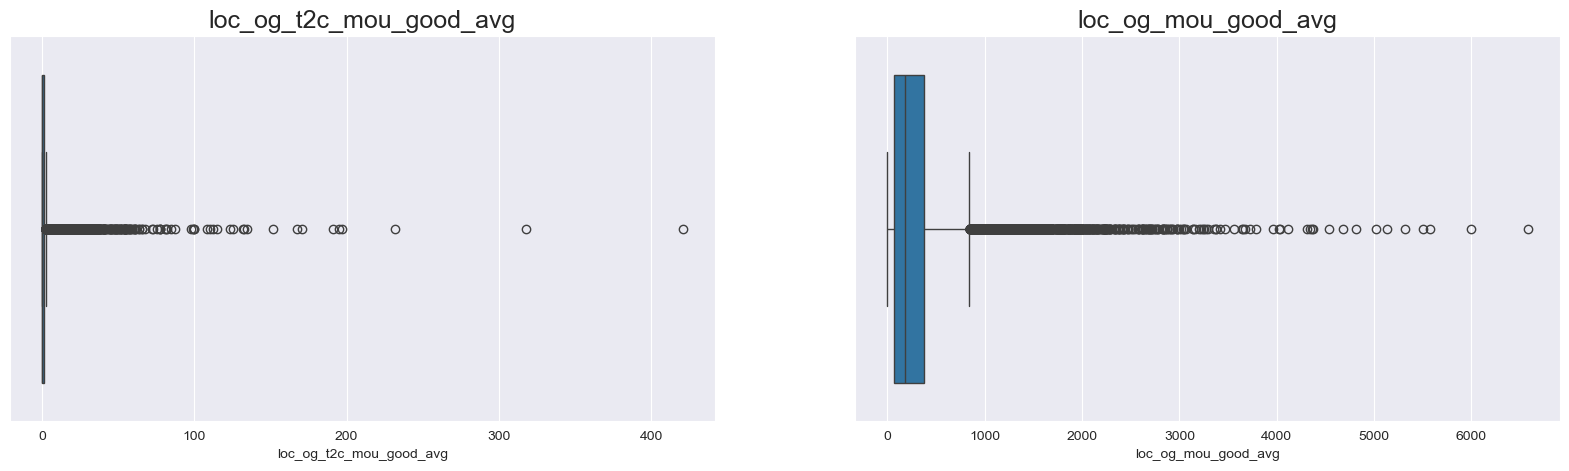

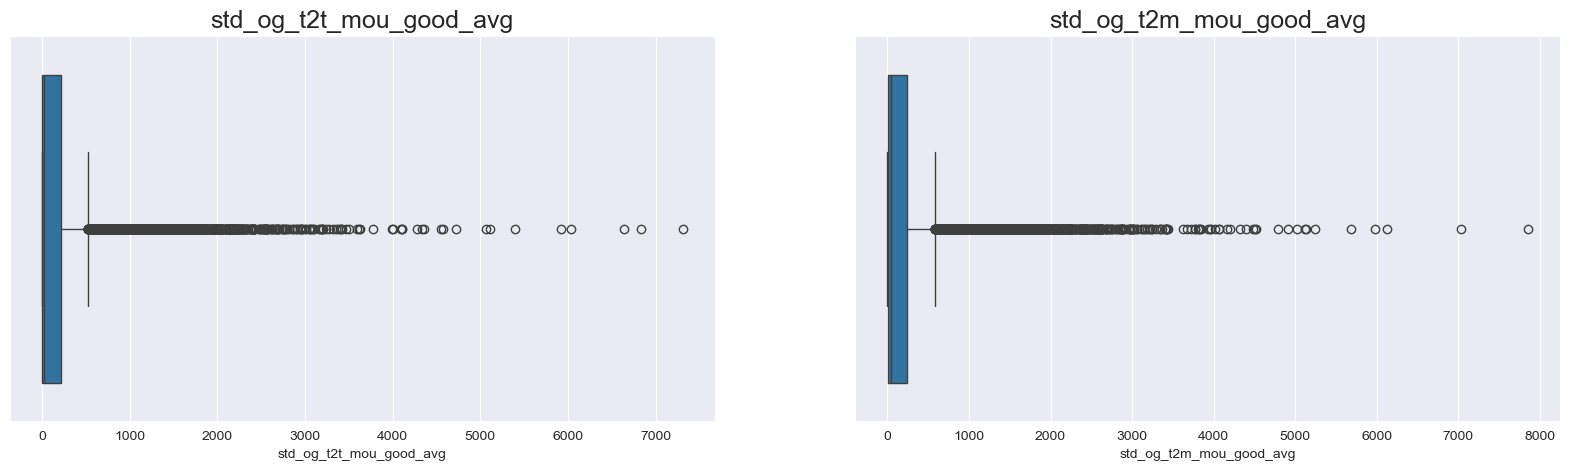

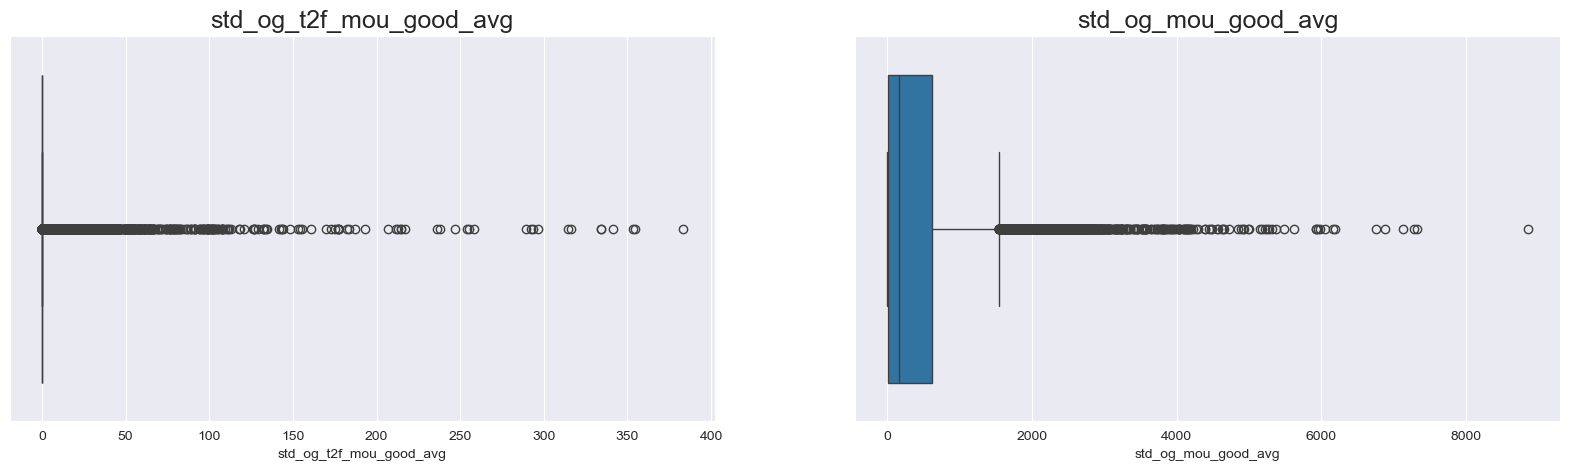

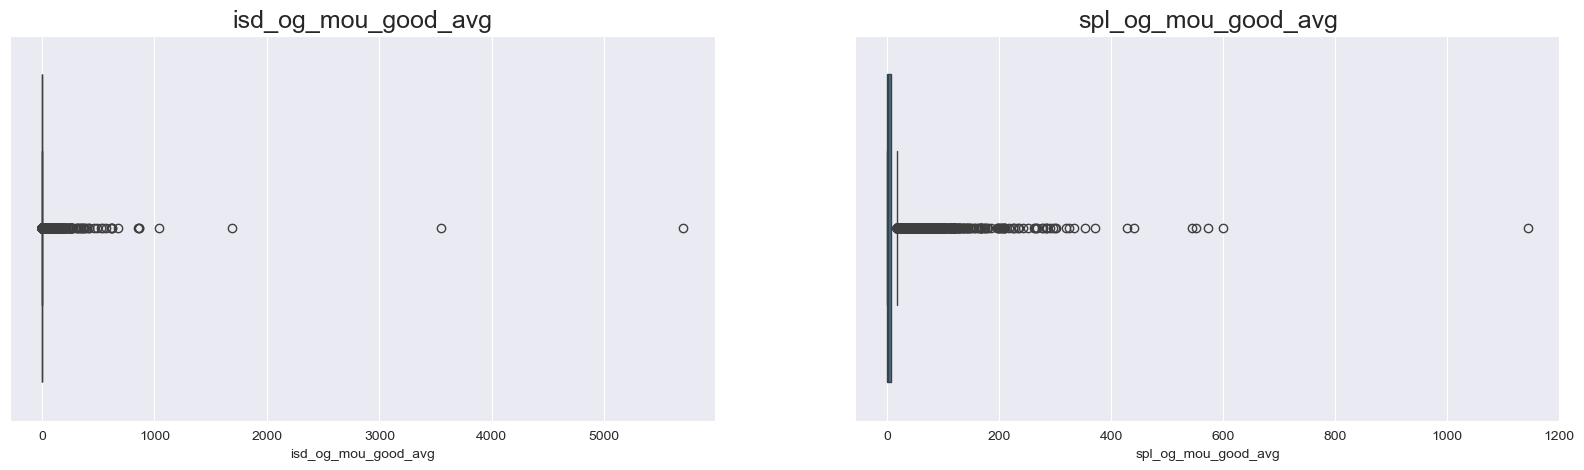

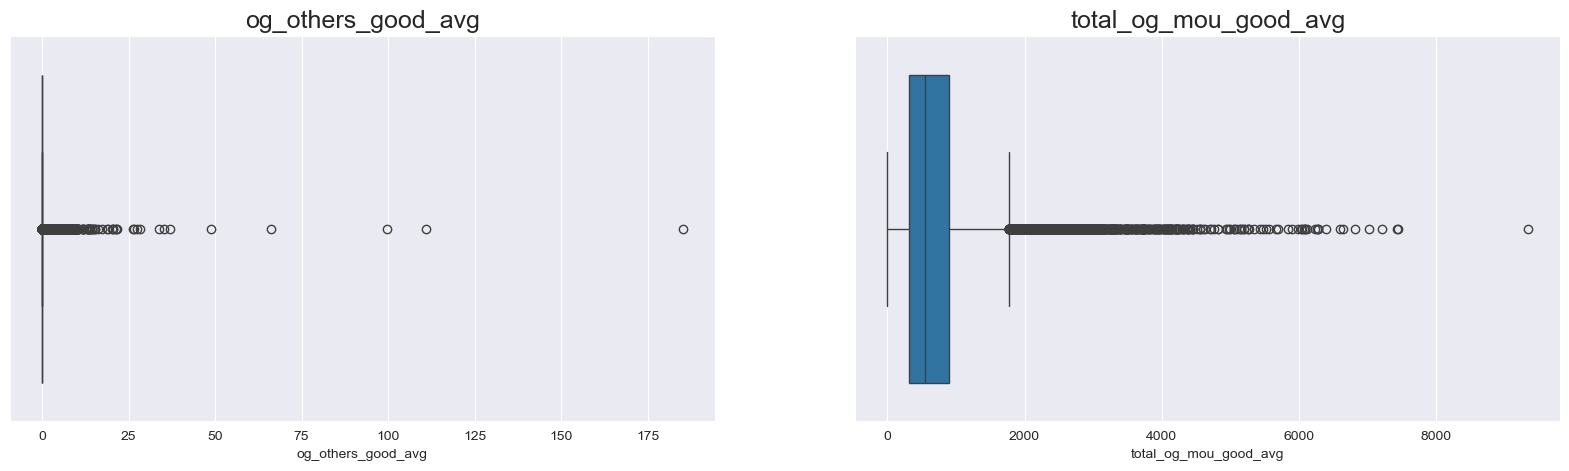

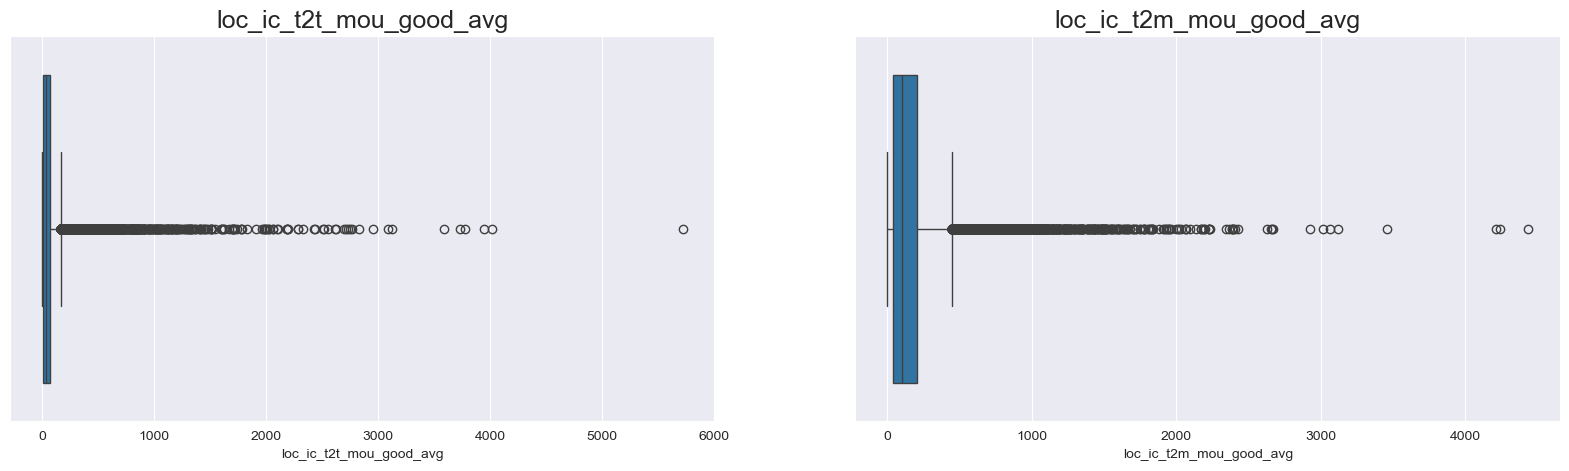

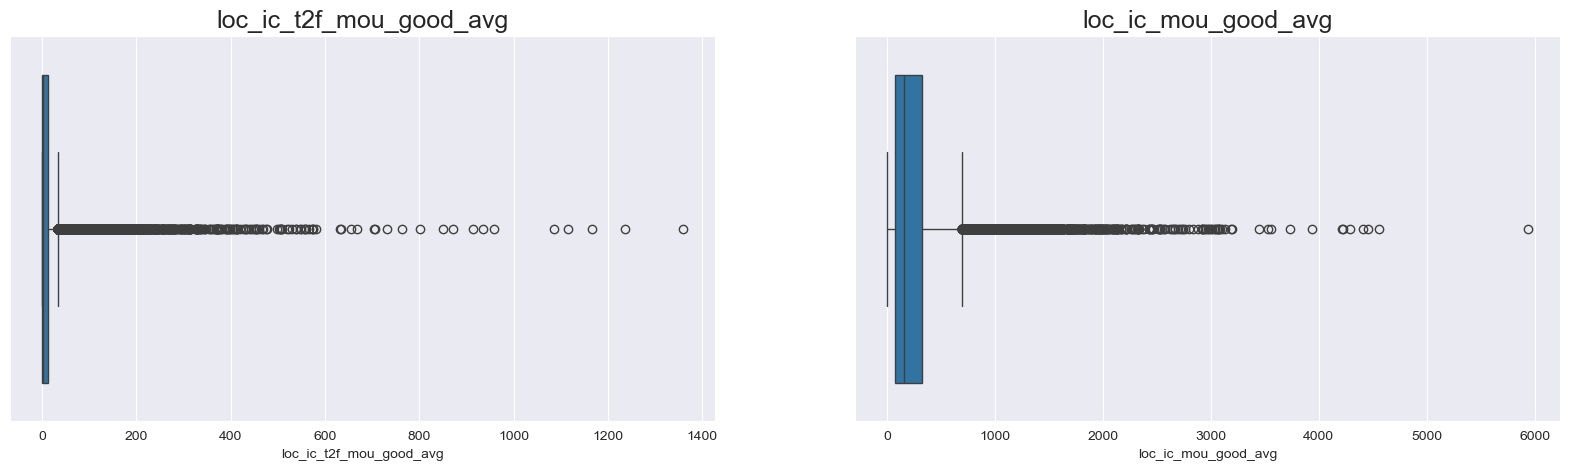

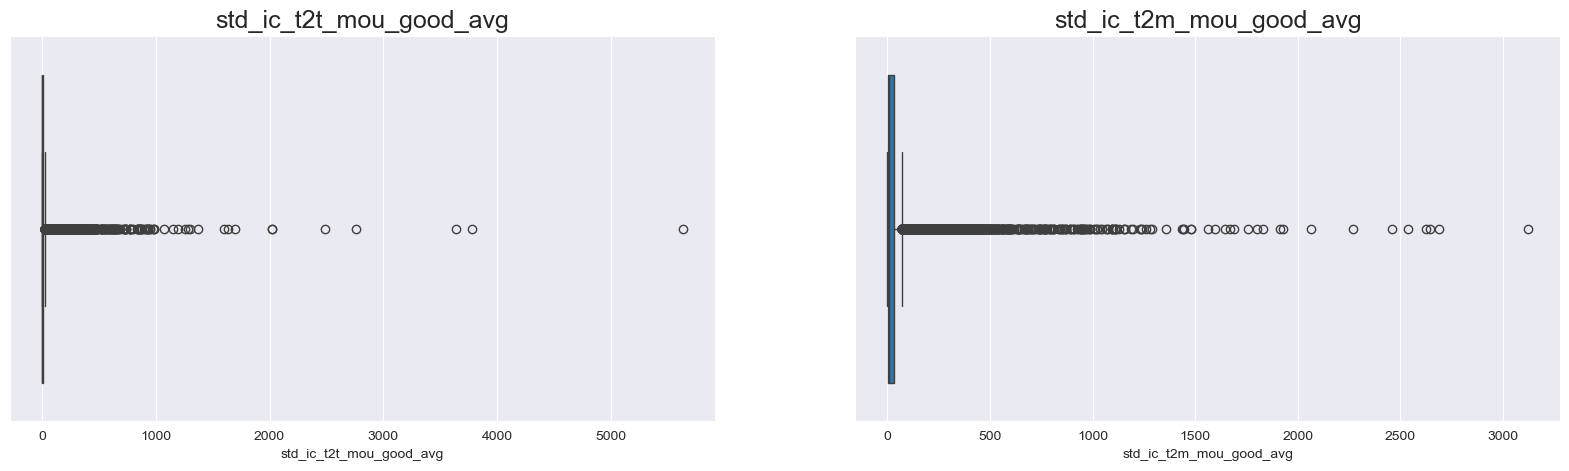

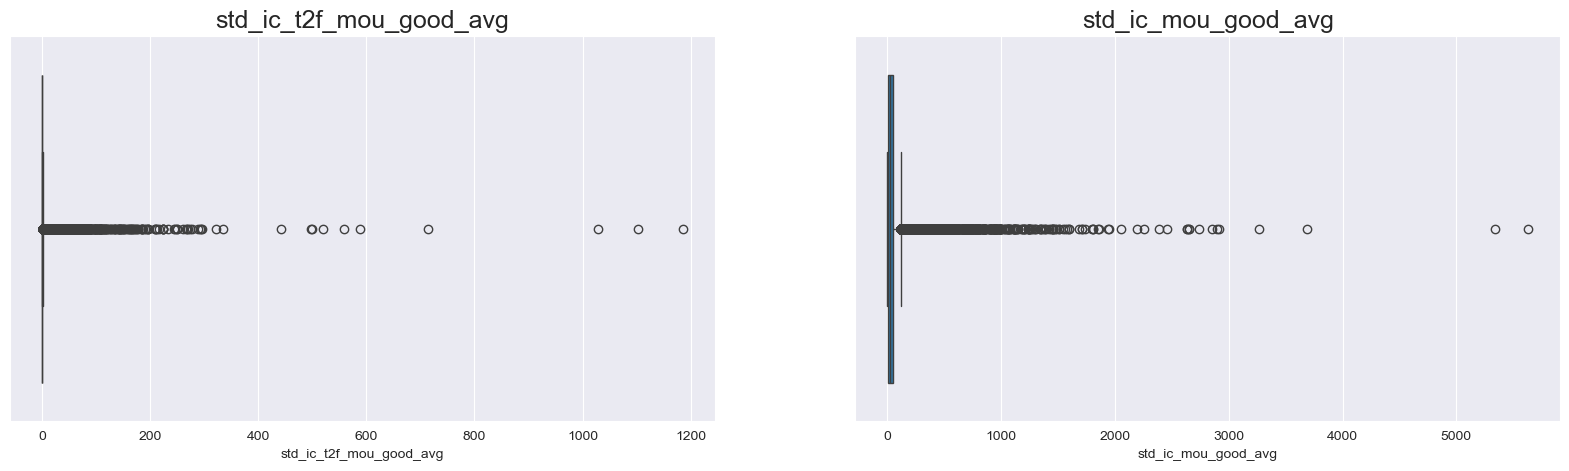

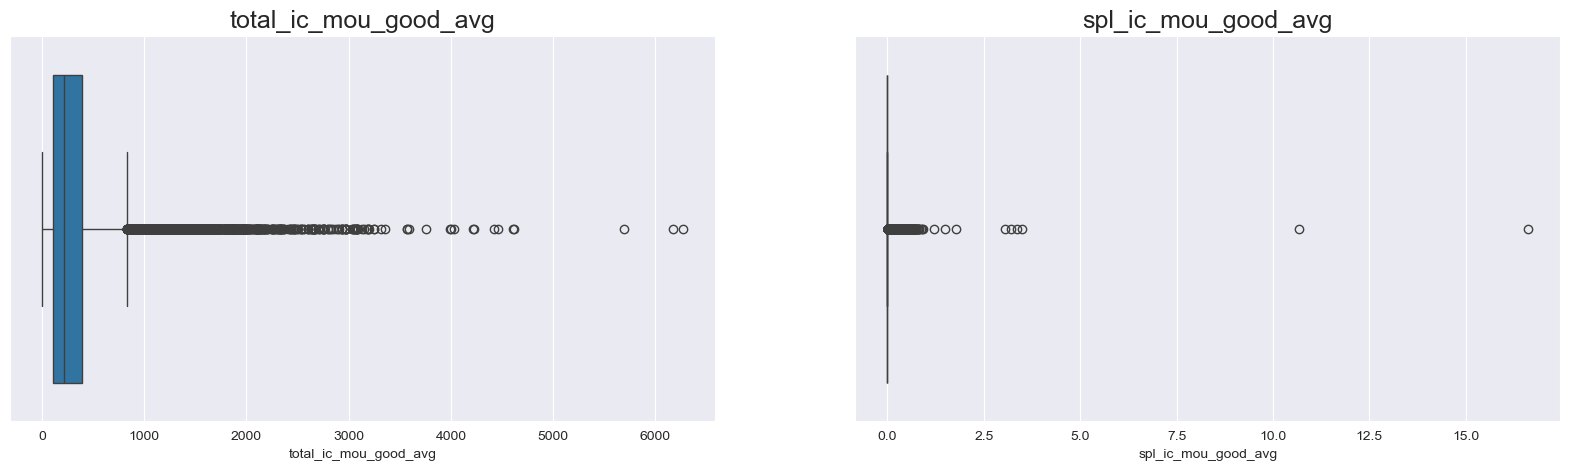

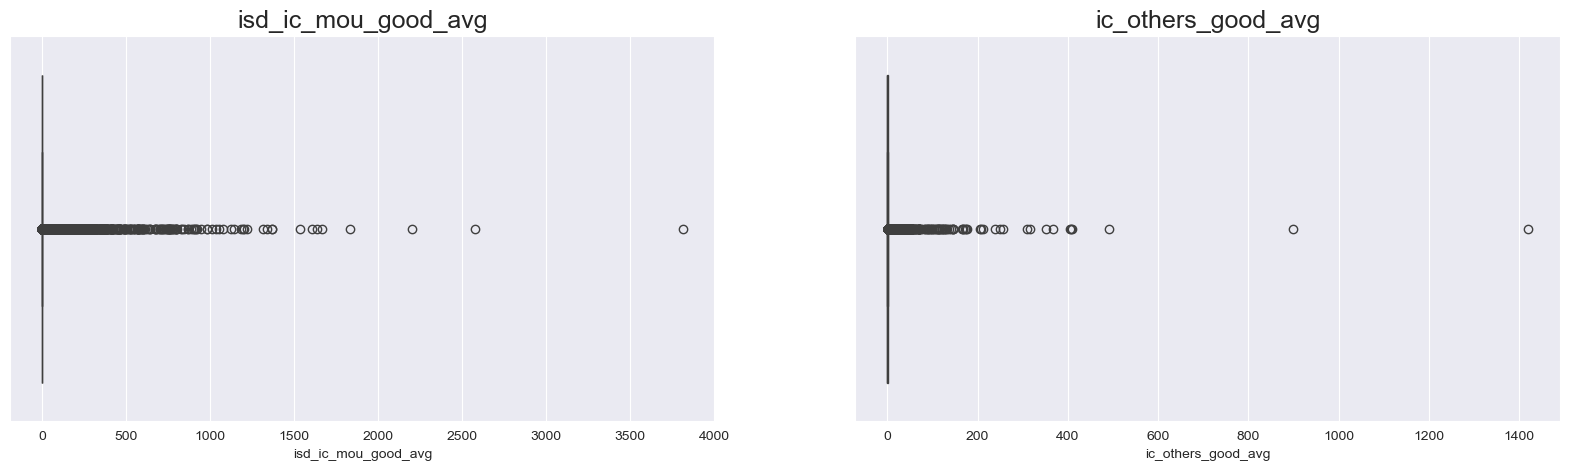

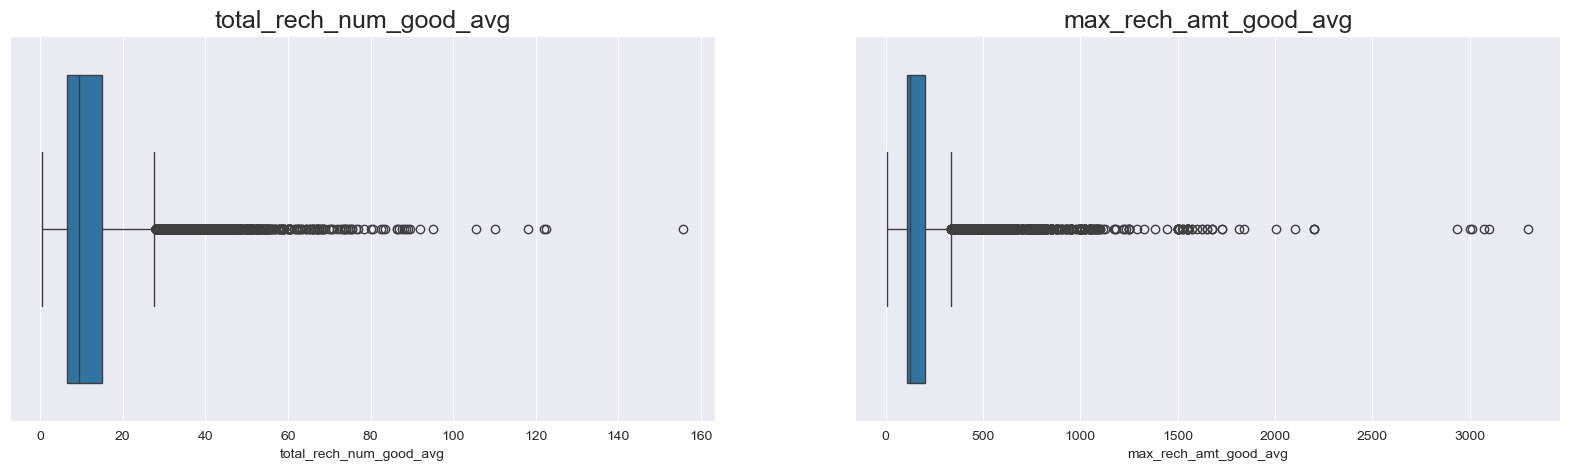

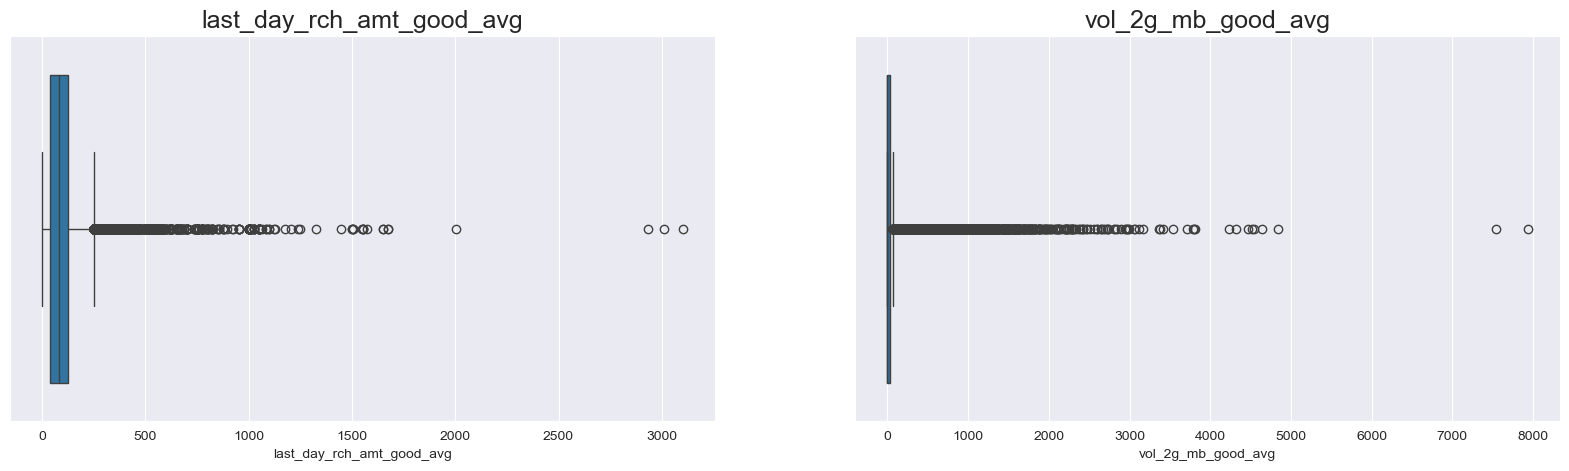

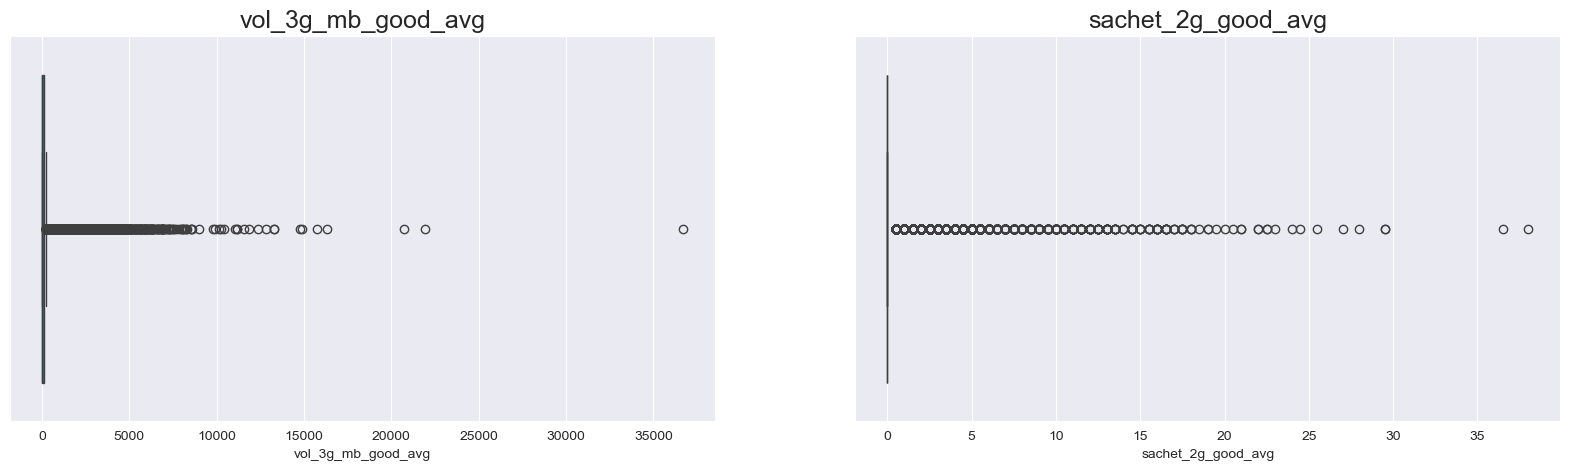

In [74]:
cols = final_df.columns # get all the columns

for i in range(0,len(cols),2): # printing 2 plots in a single row, therefore we have provided the step of 2
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(cols[i], fontsize=18) # column name will be the title of plot/graph
    sns.boxplot(x = cols[i], data = final_df)
    plt.subplot(1,2,2)
    plt.title(cols[i+1], fontsize=18) # column name will be the title of plot/graph
    sns.boxplot(x = cols[i+1], data = final_df)
    plt.show()

It appears that each column contains outliers on the higher end. Instead of removing these rows, we will cap the outlier values at the 95th percentile.

In [76]:
for col in cols:
    if col!="churn": # we want churn column unchanged
        val = final_df[col].quantile(0.95) # Obtain the 95th percentile value for each column.
        final_df[col][final_df[col] >= val] = val # assigning anything above the 95th percentile value to 95th percentile value

Re-examining outliers by visualizing them with a boxplot

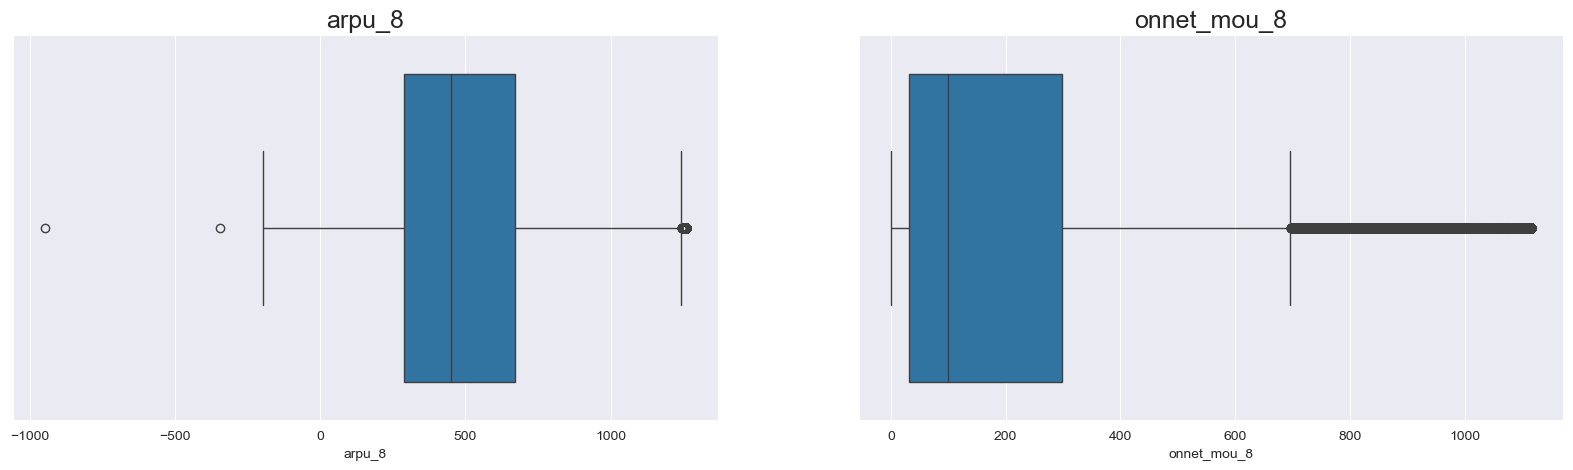

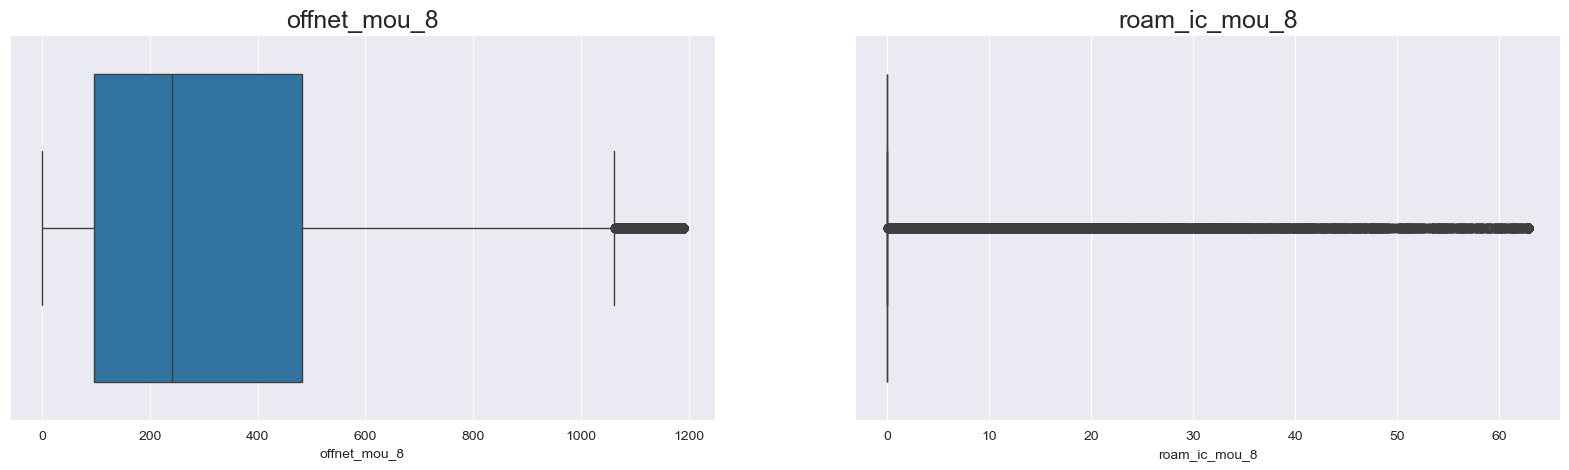

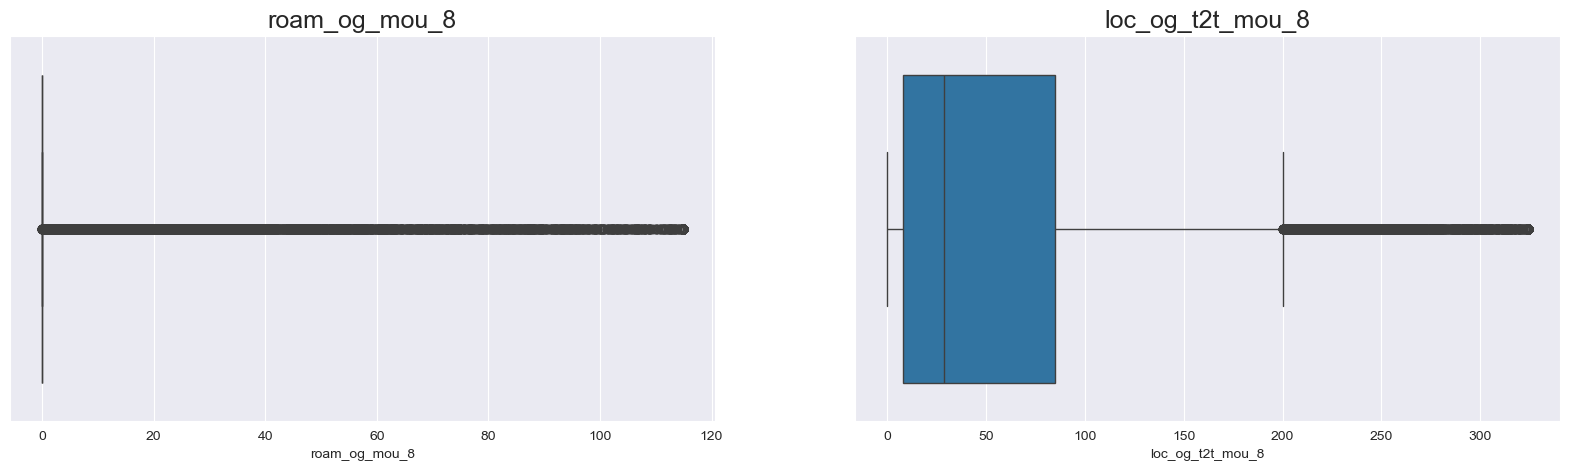

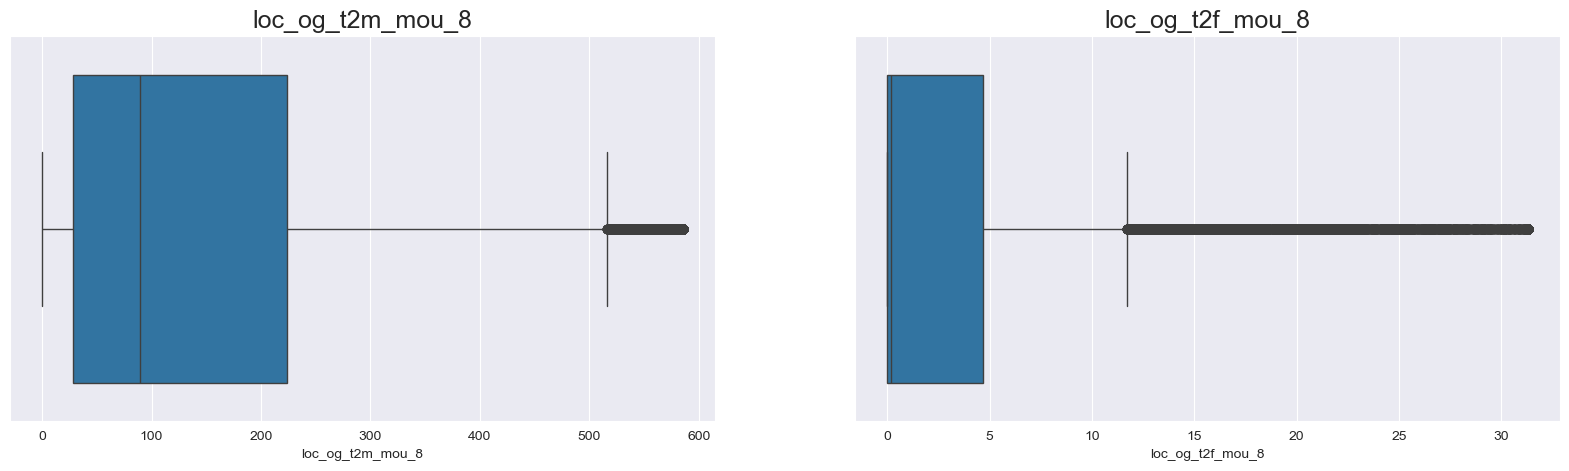

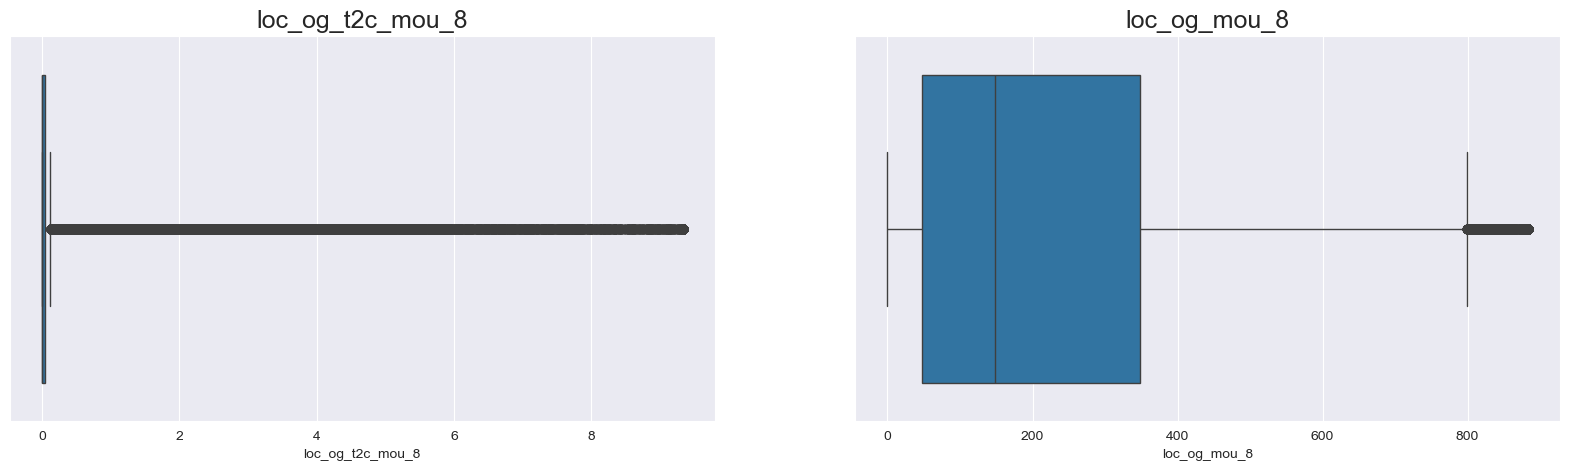

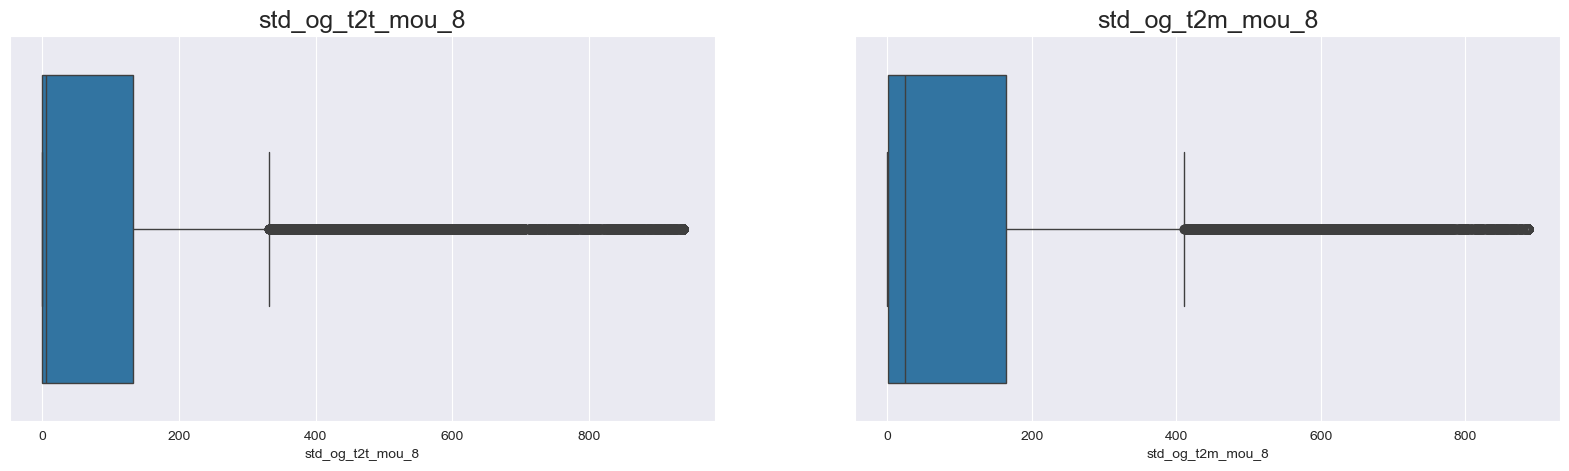

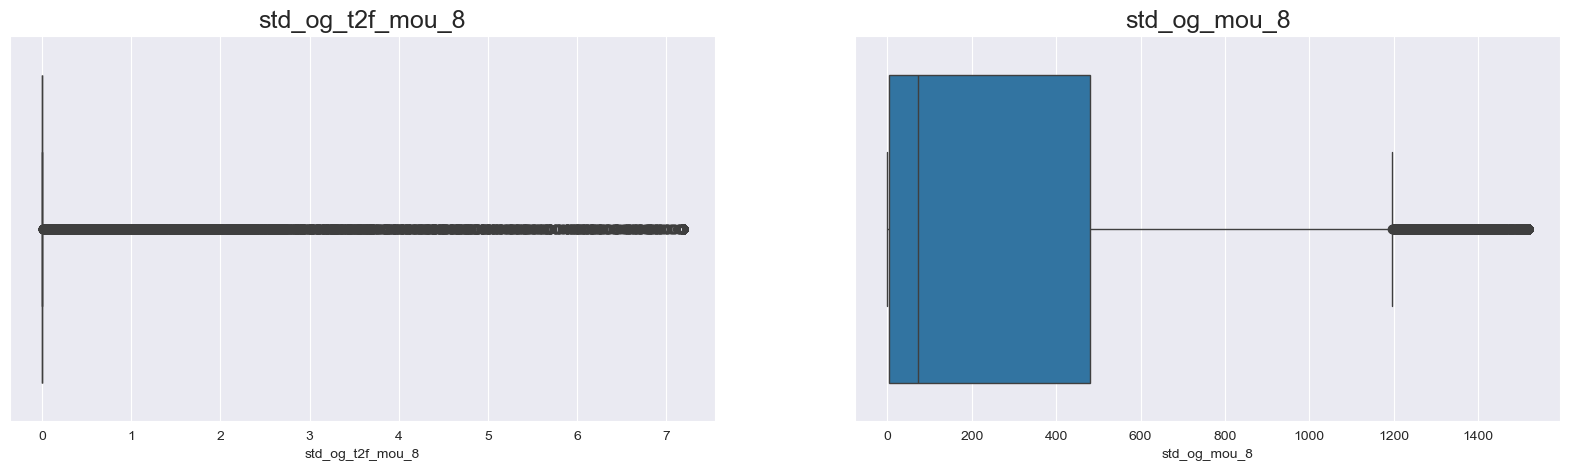

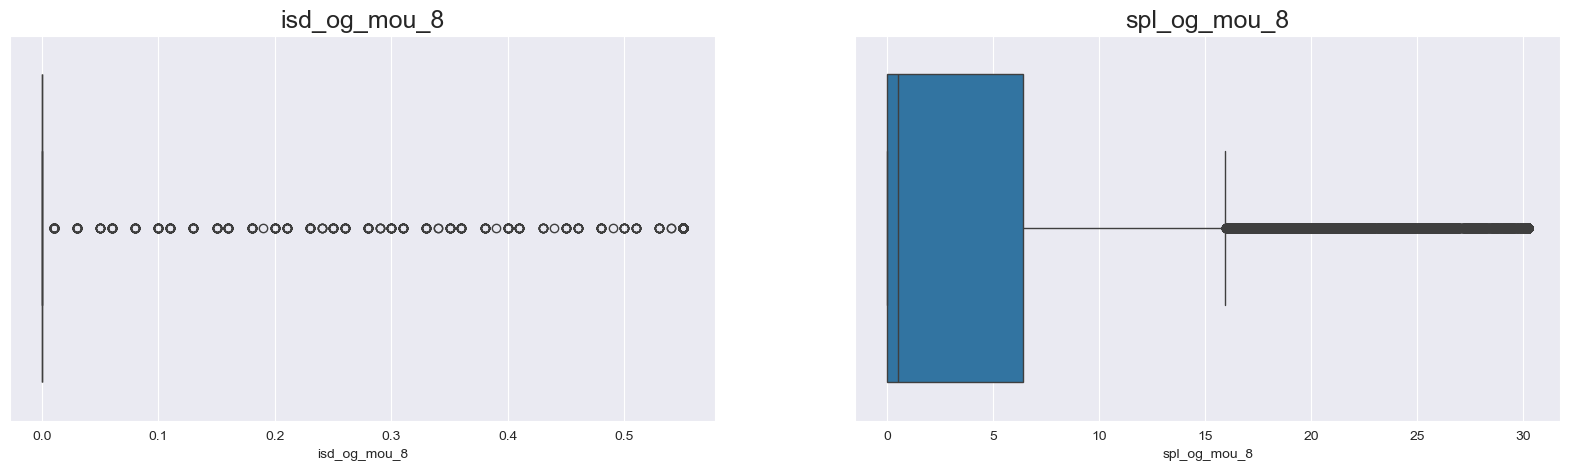

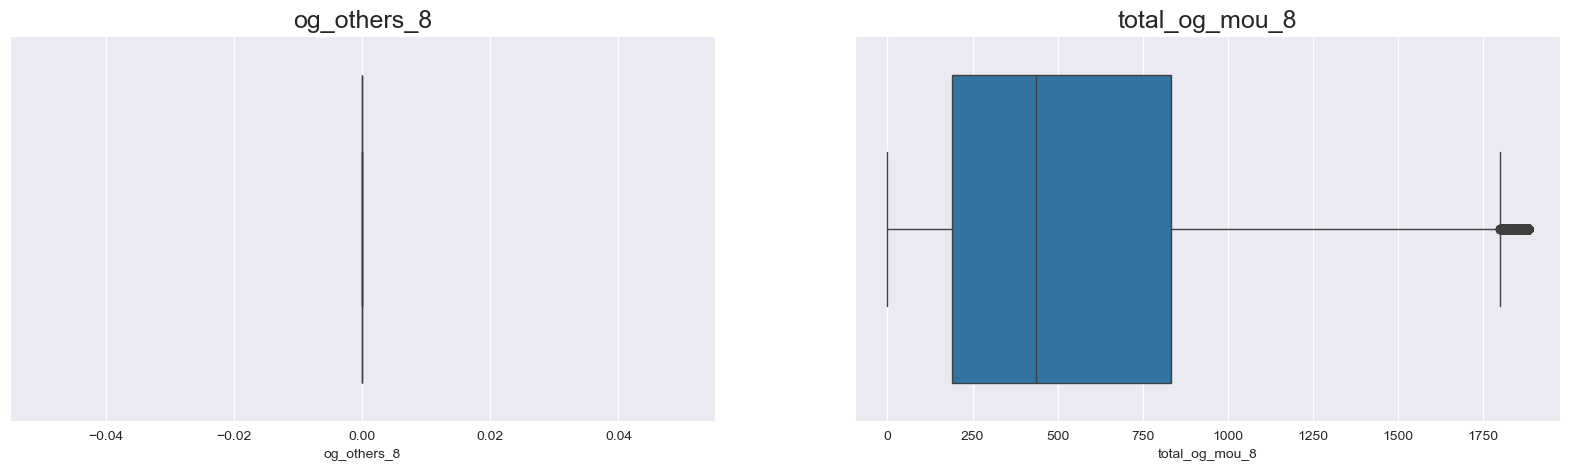

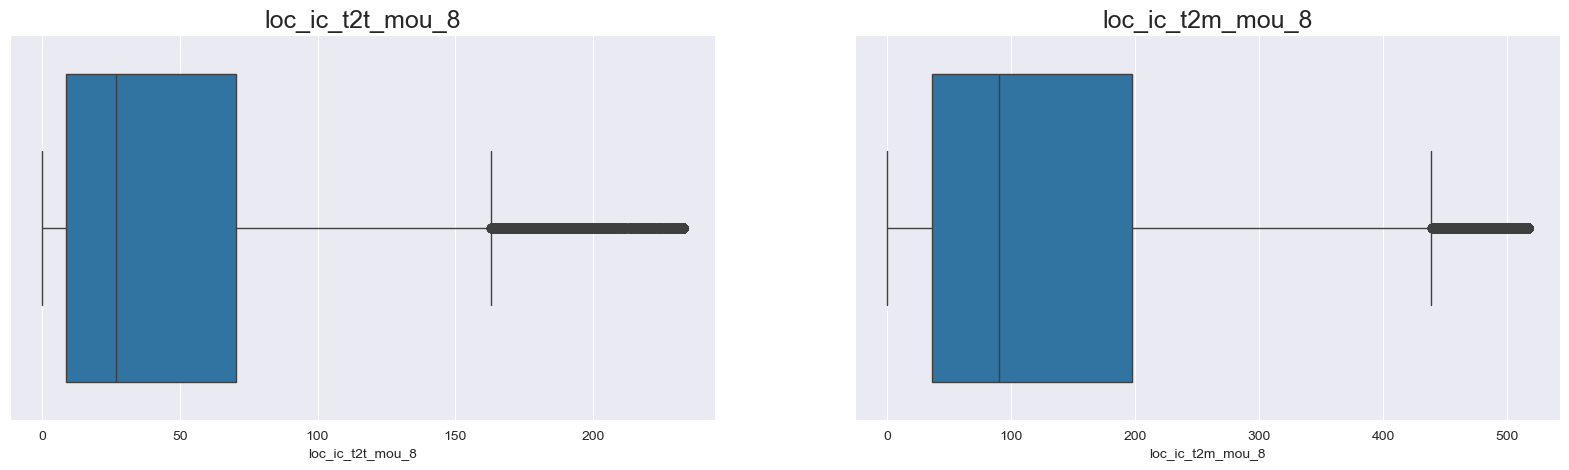

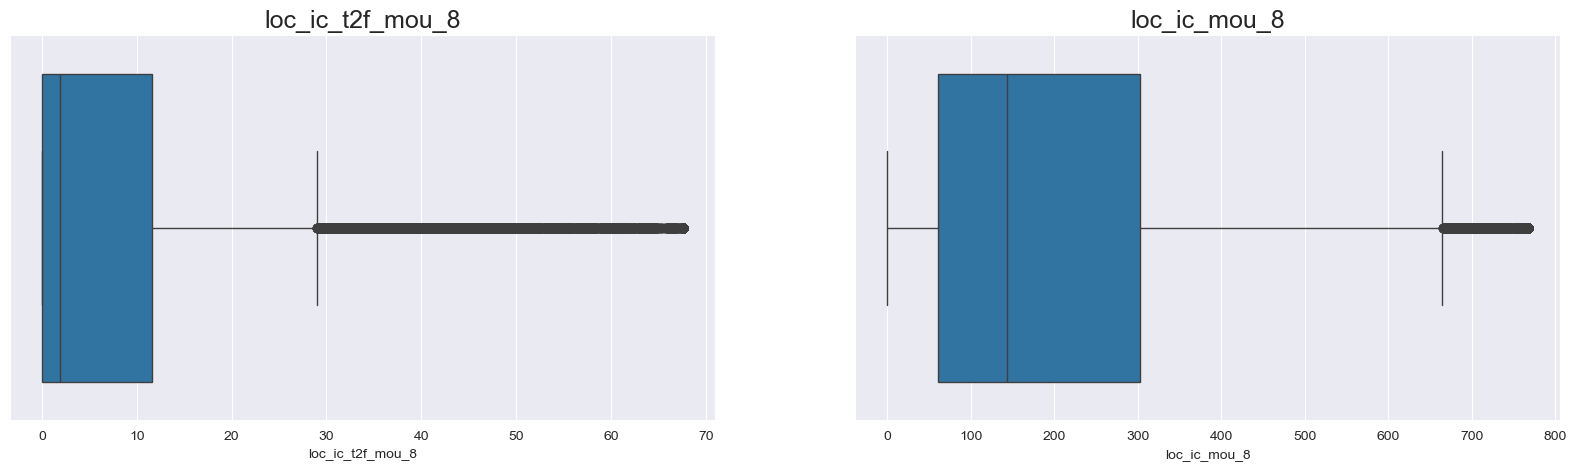

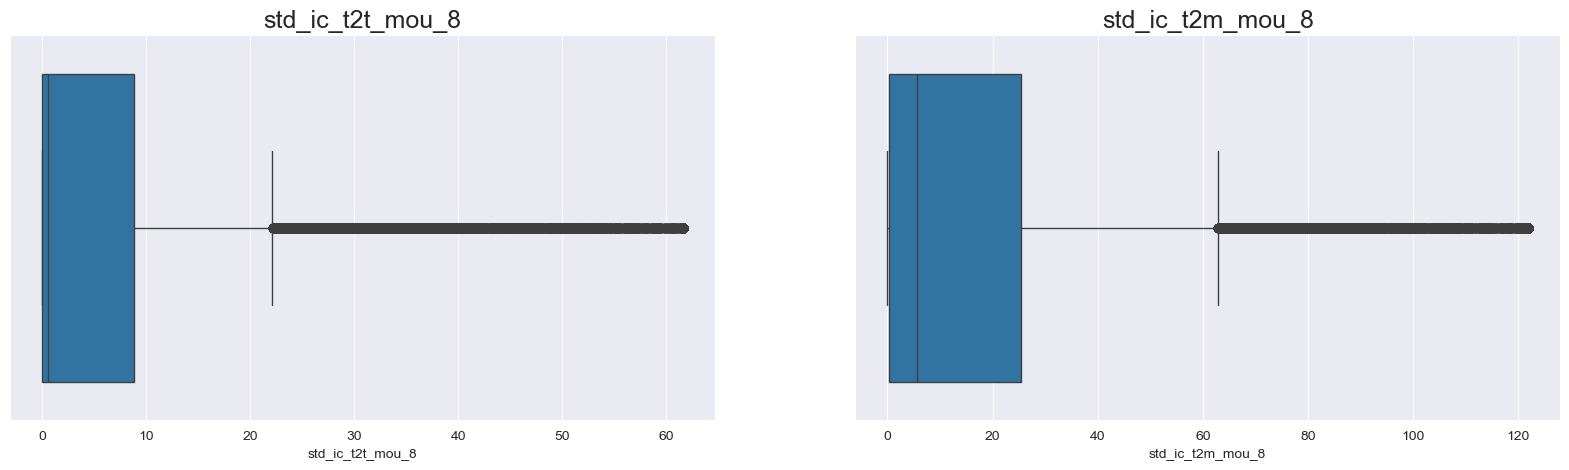

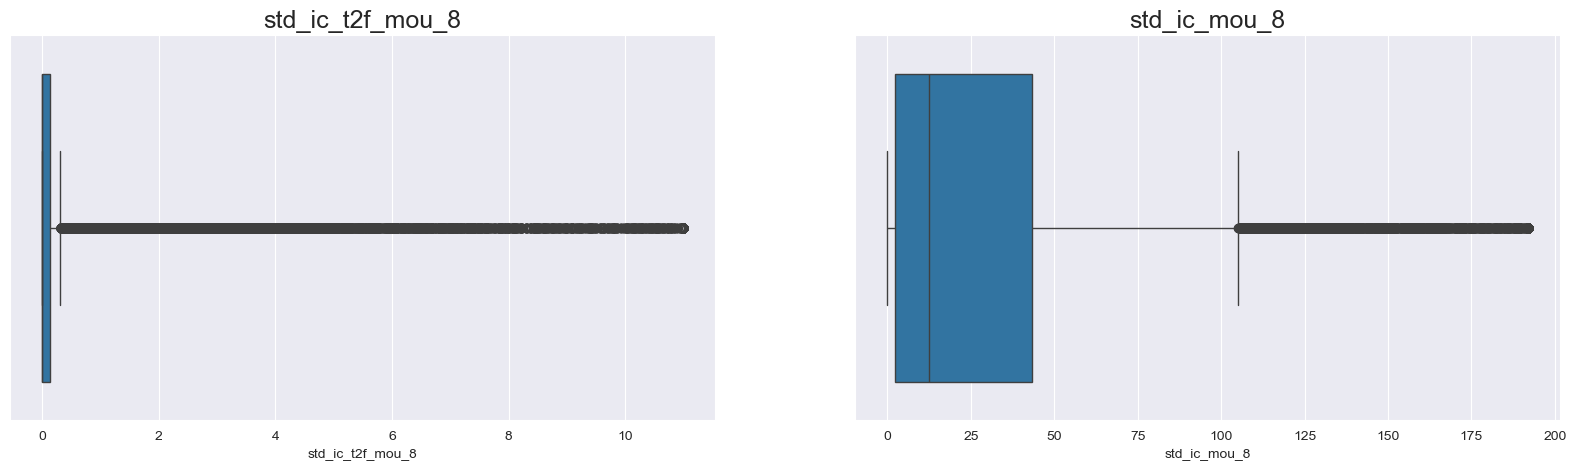

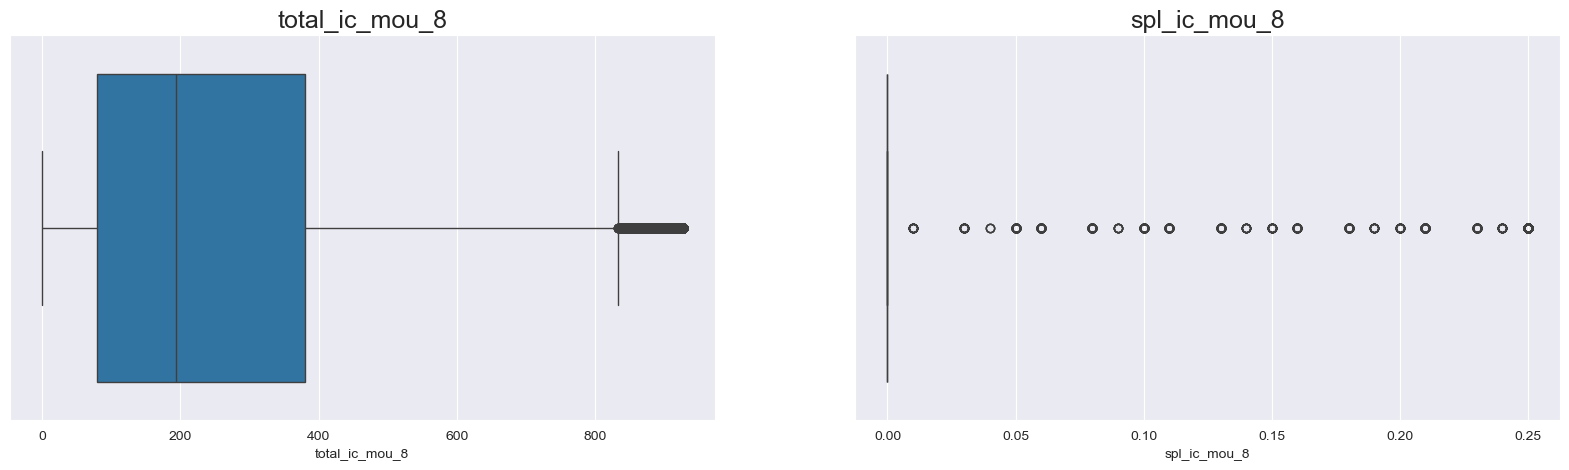

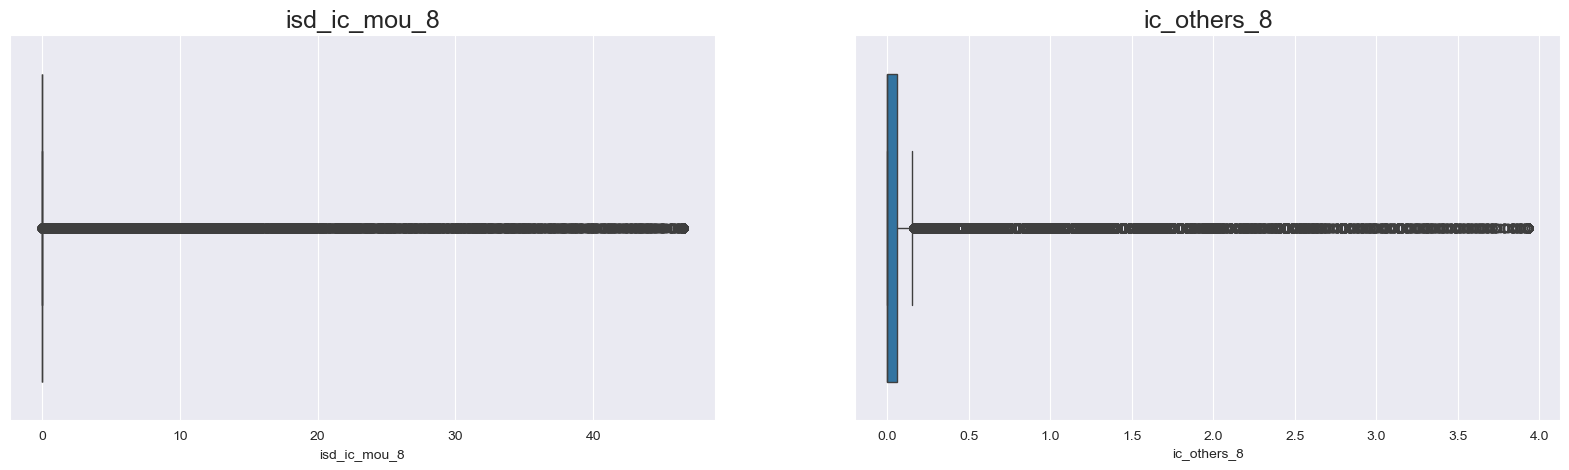

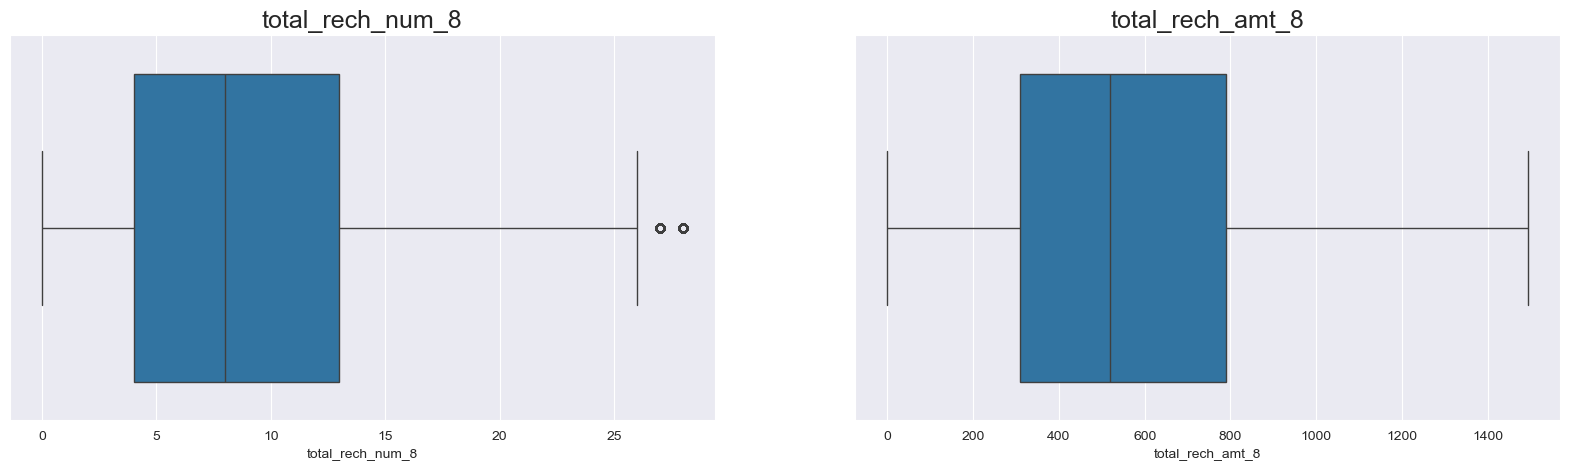

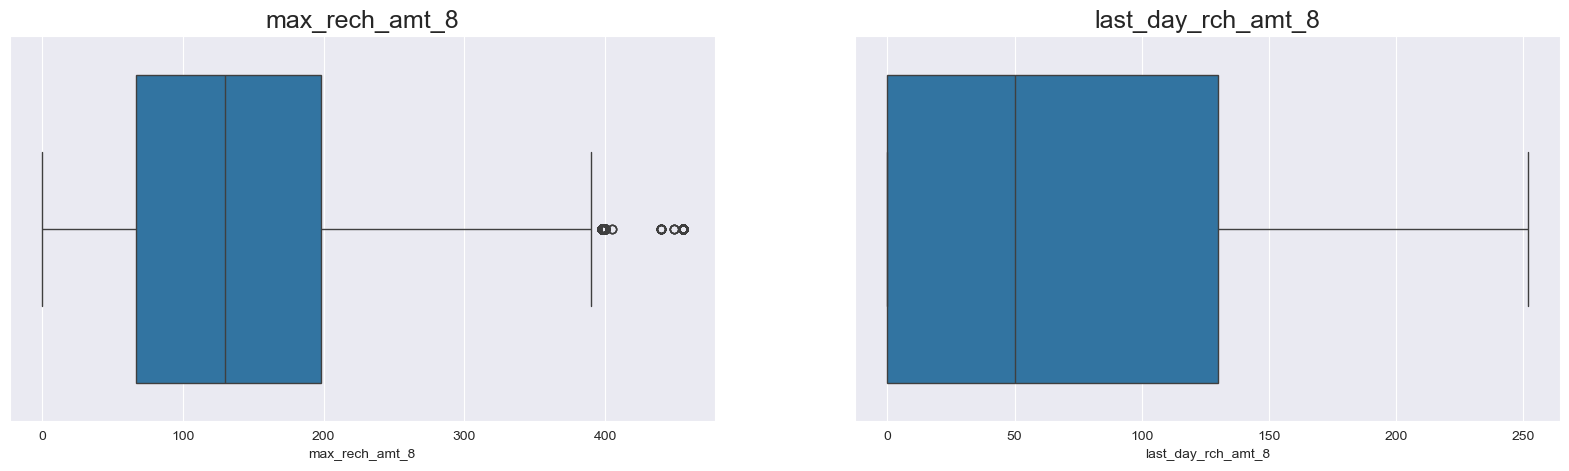

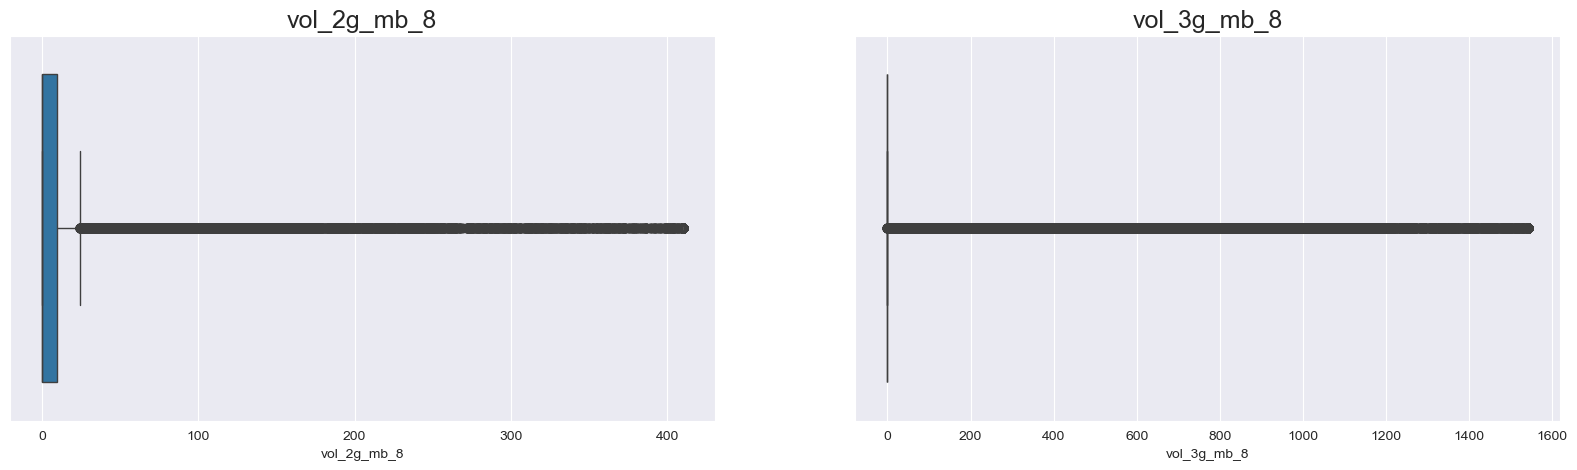

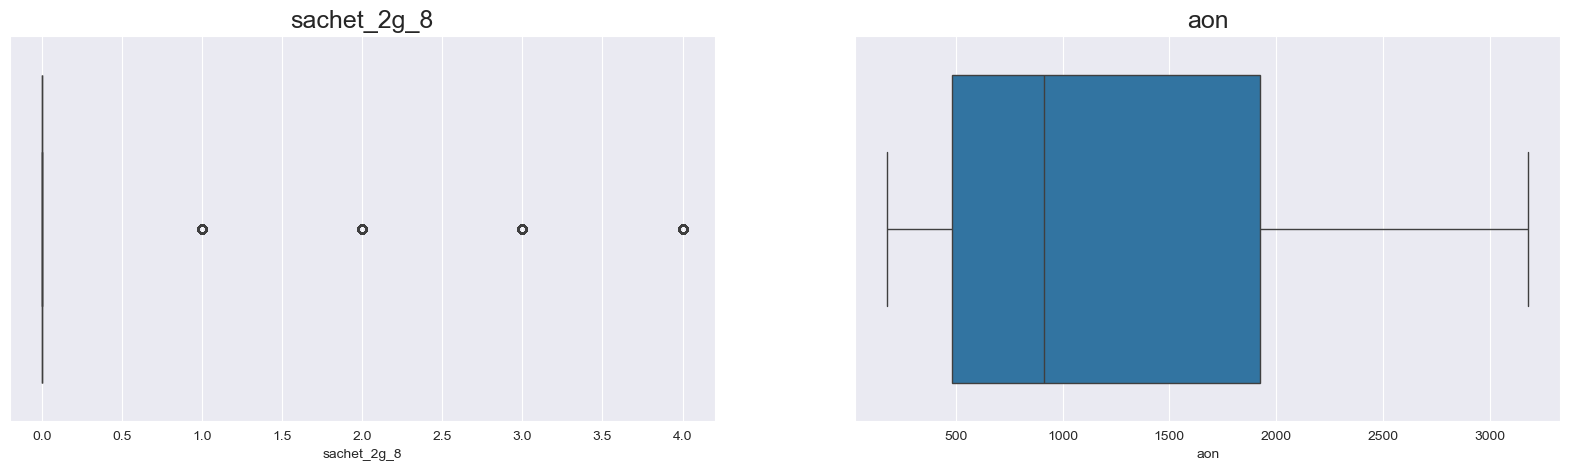

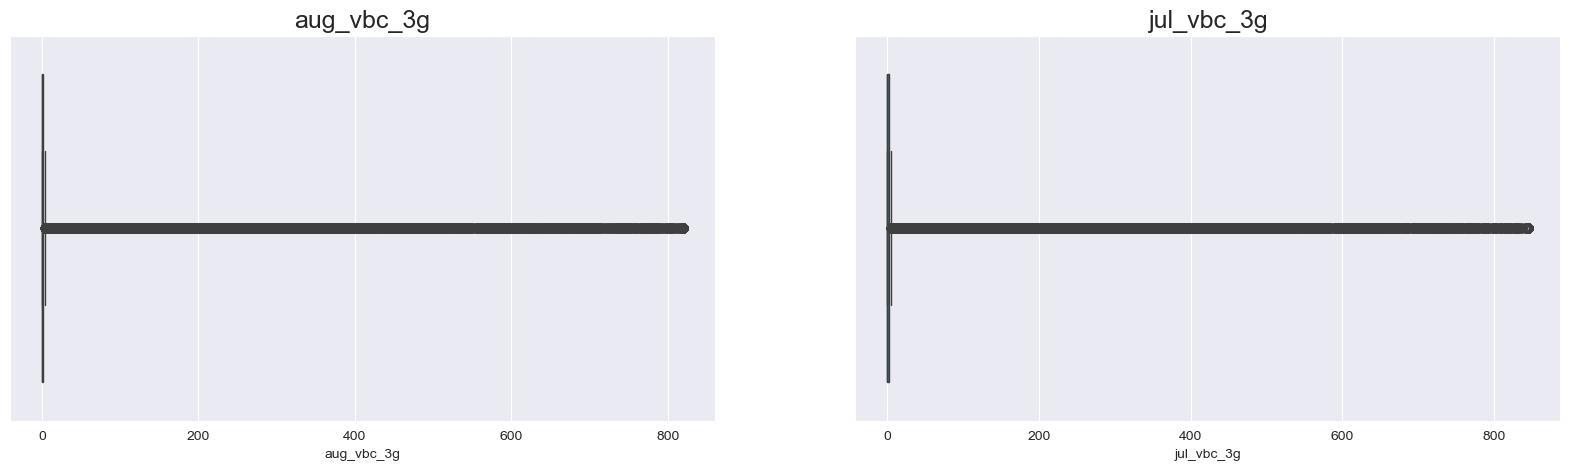

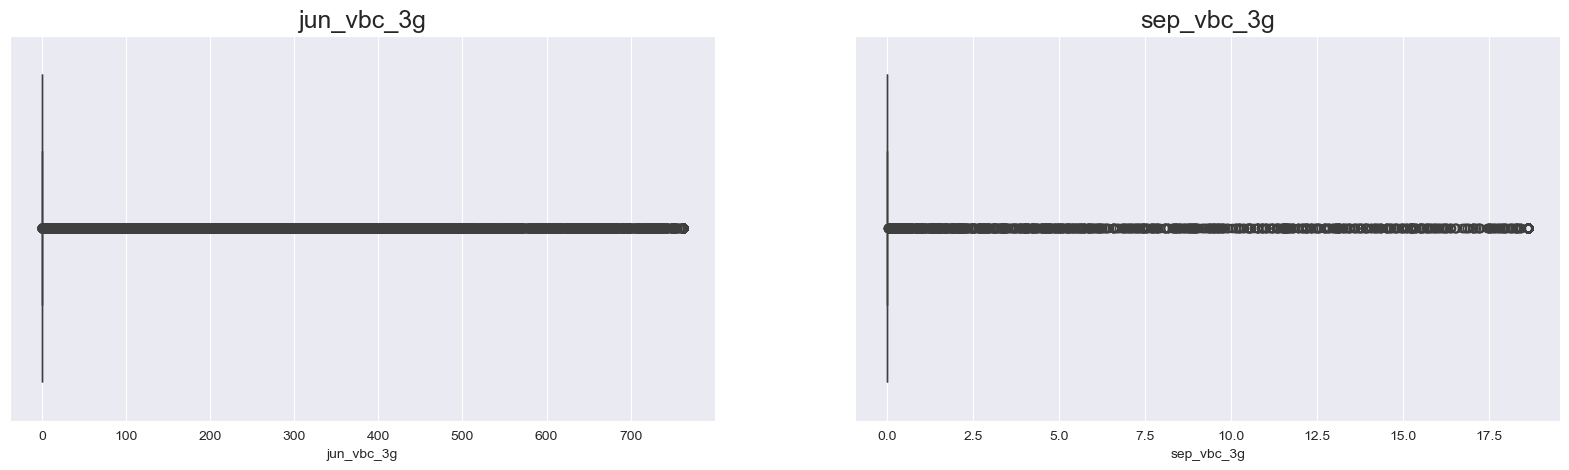

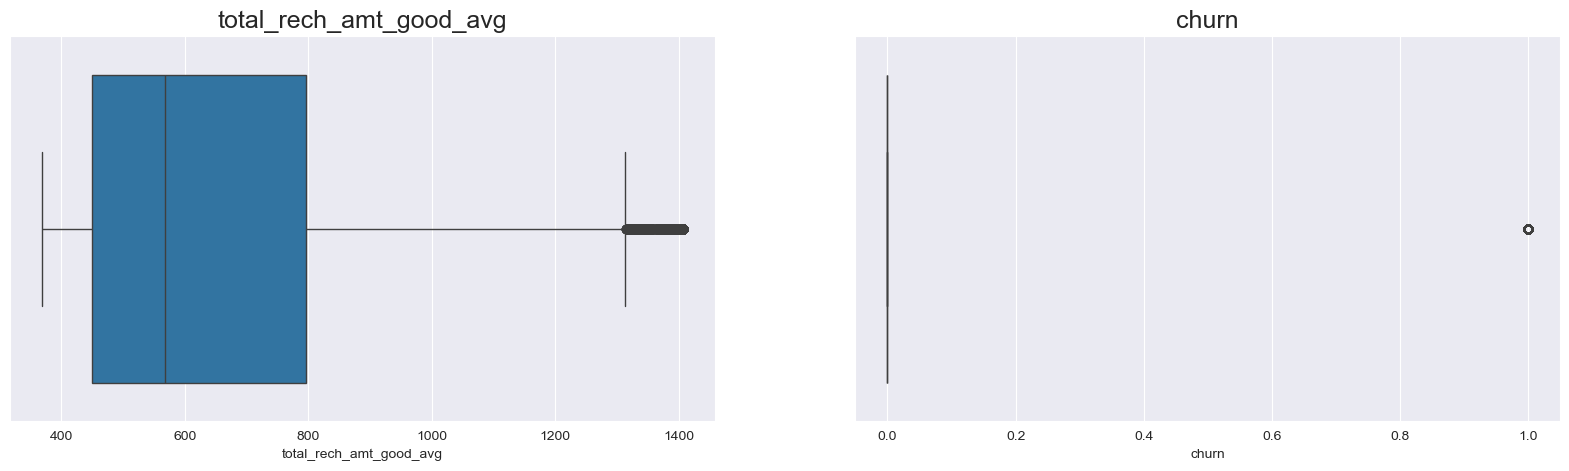

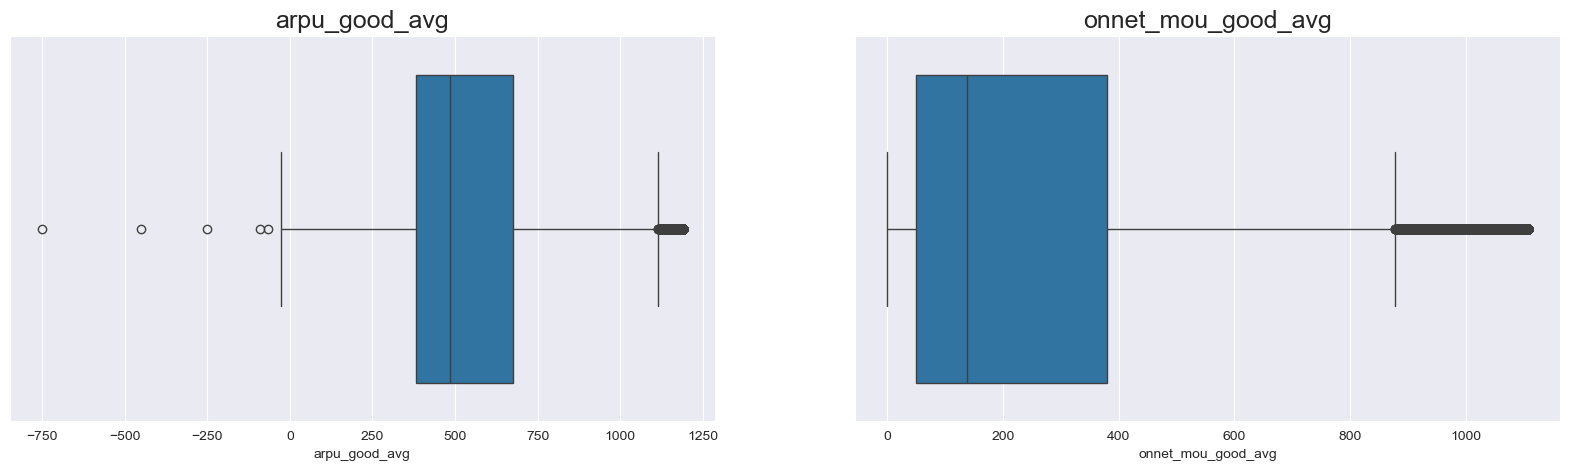

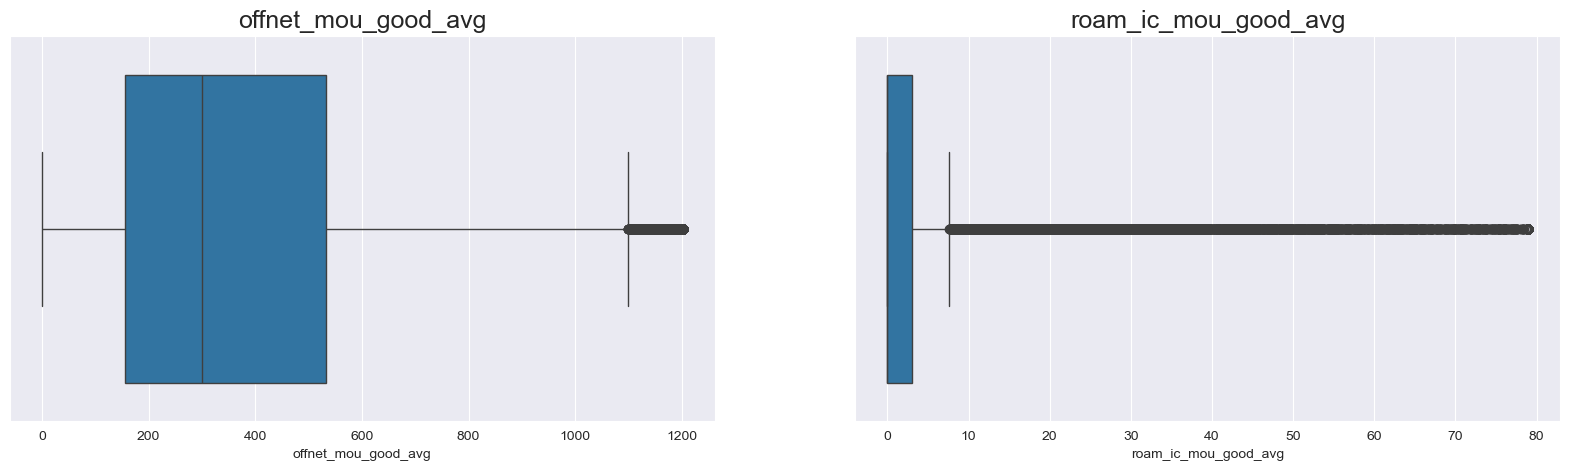

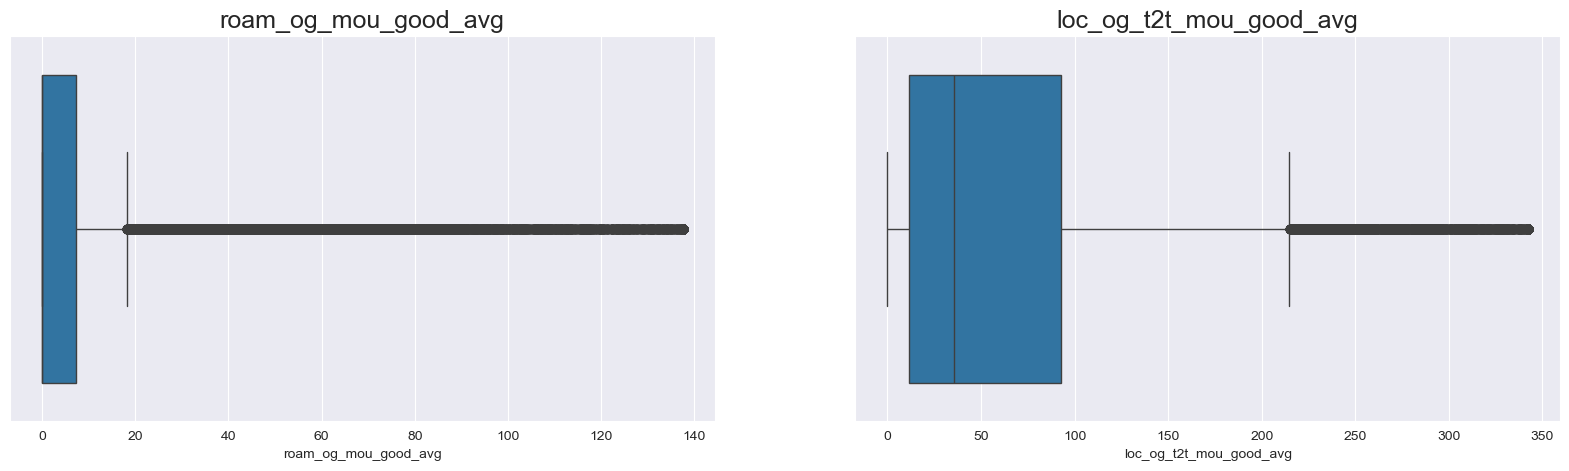

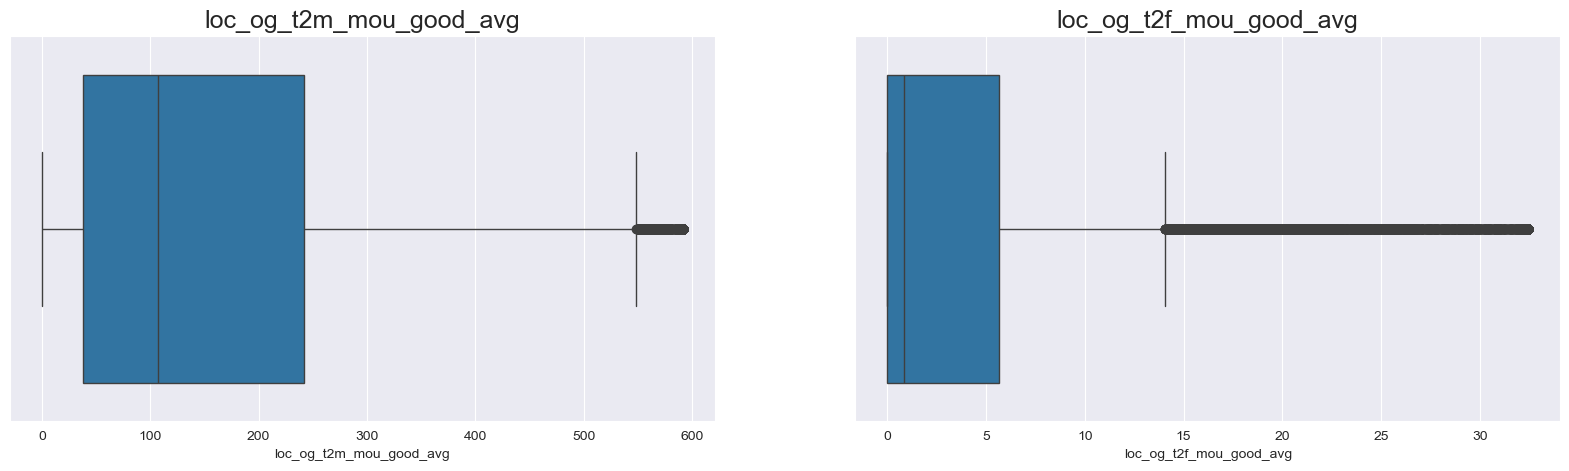

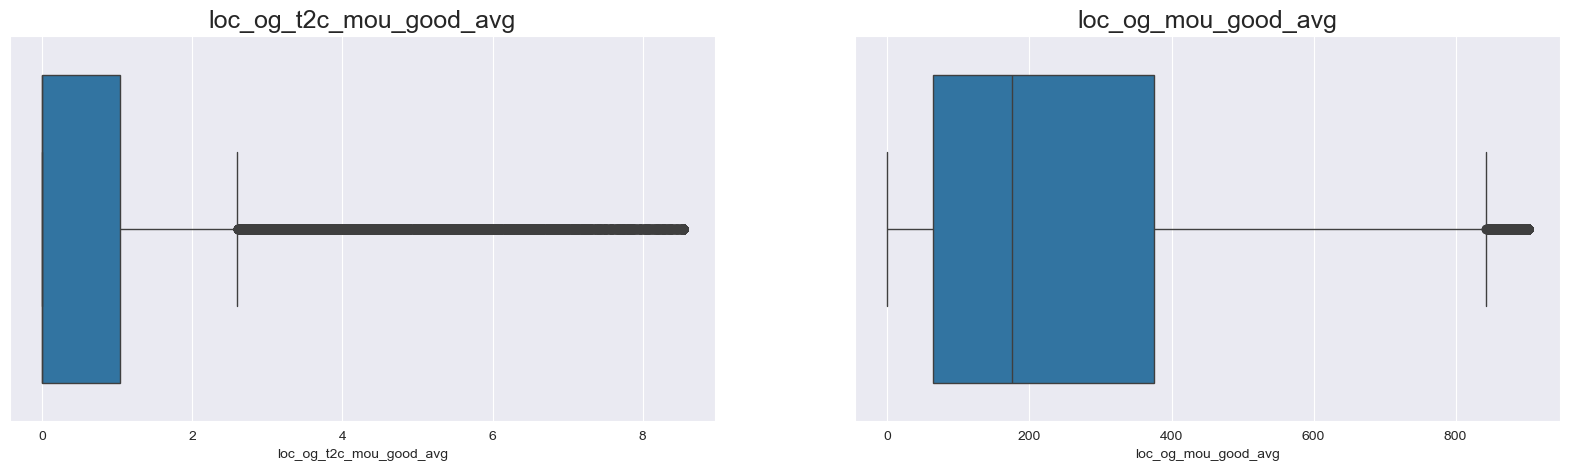

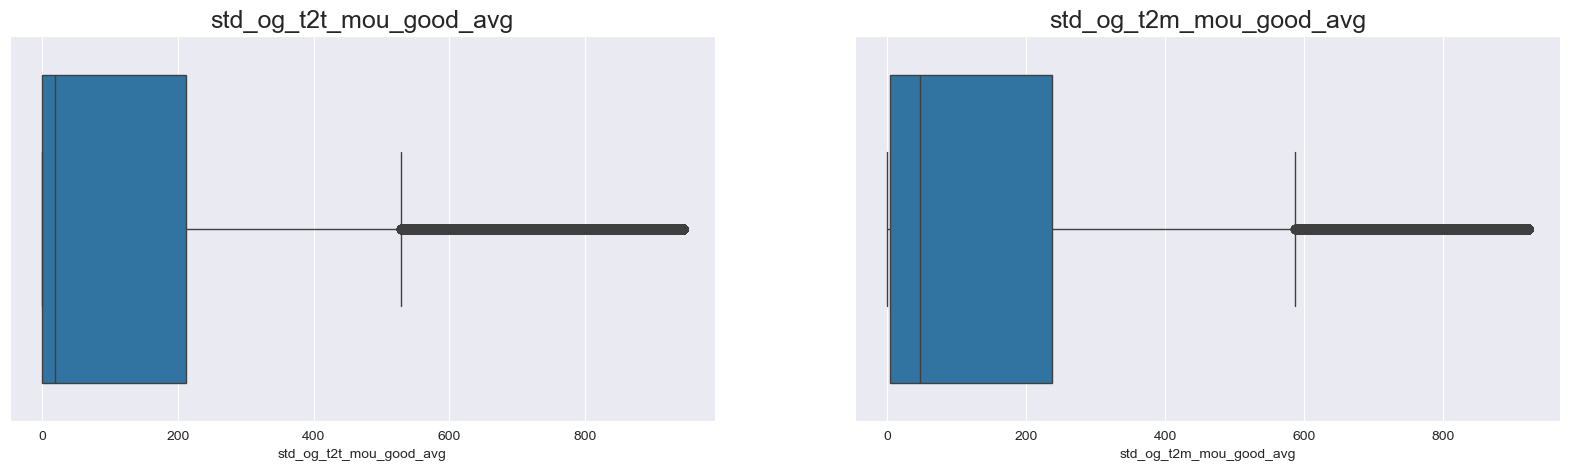

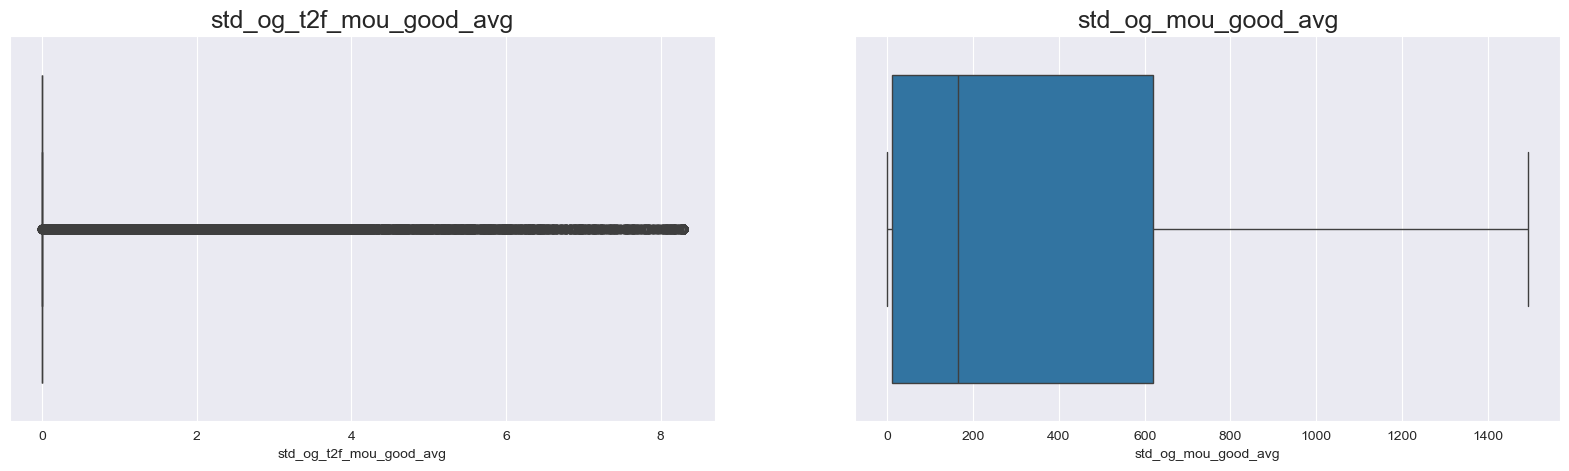

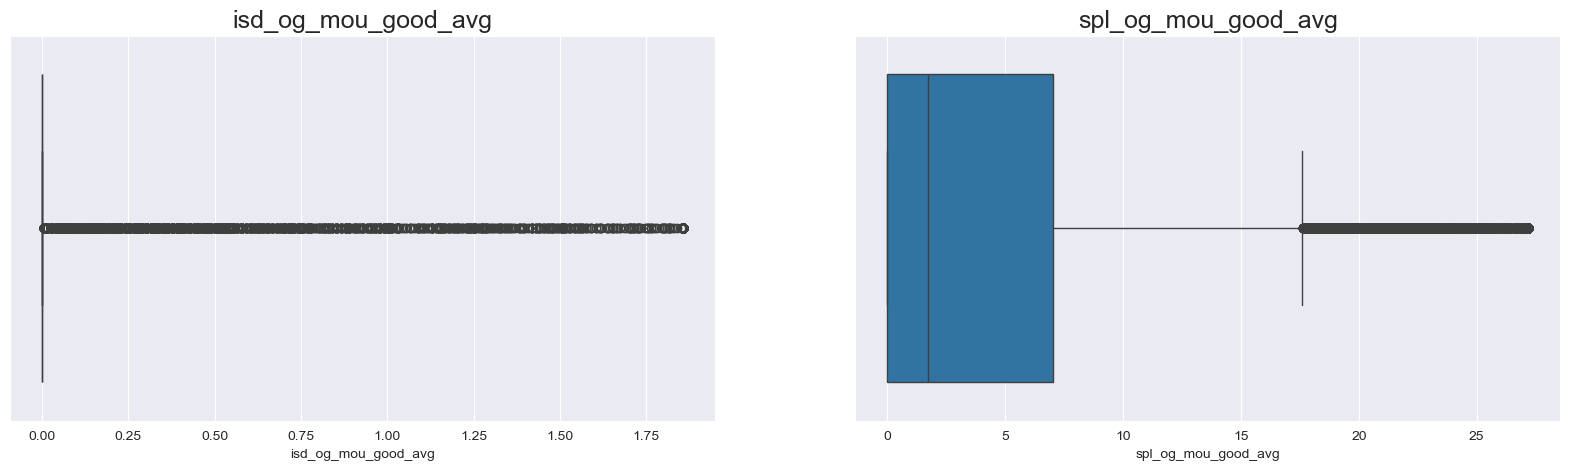

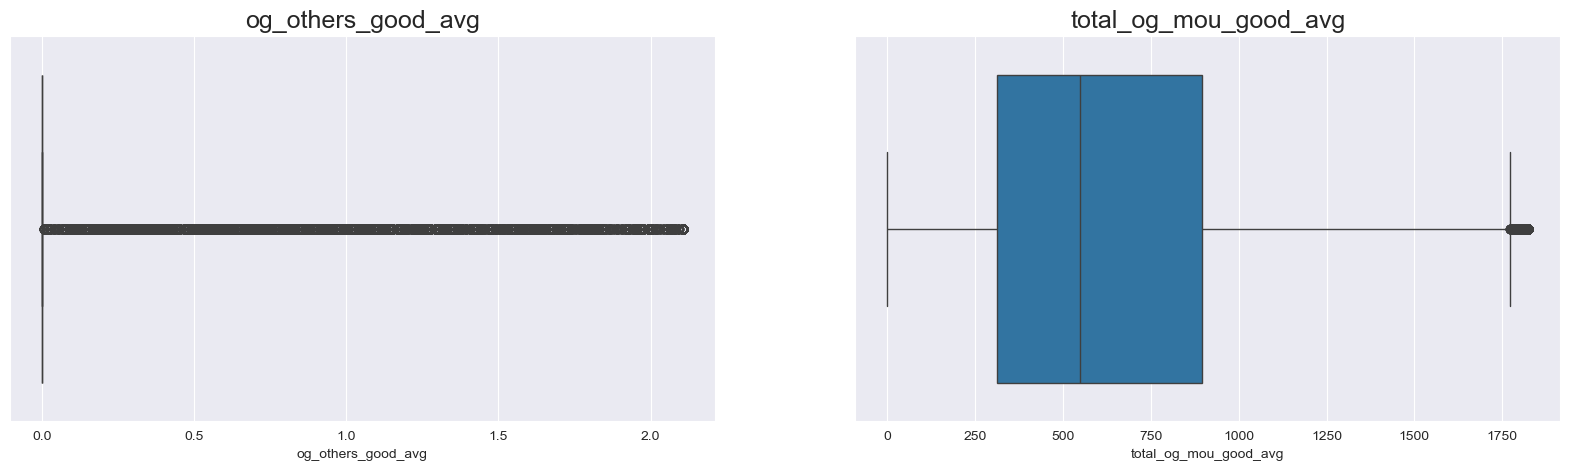

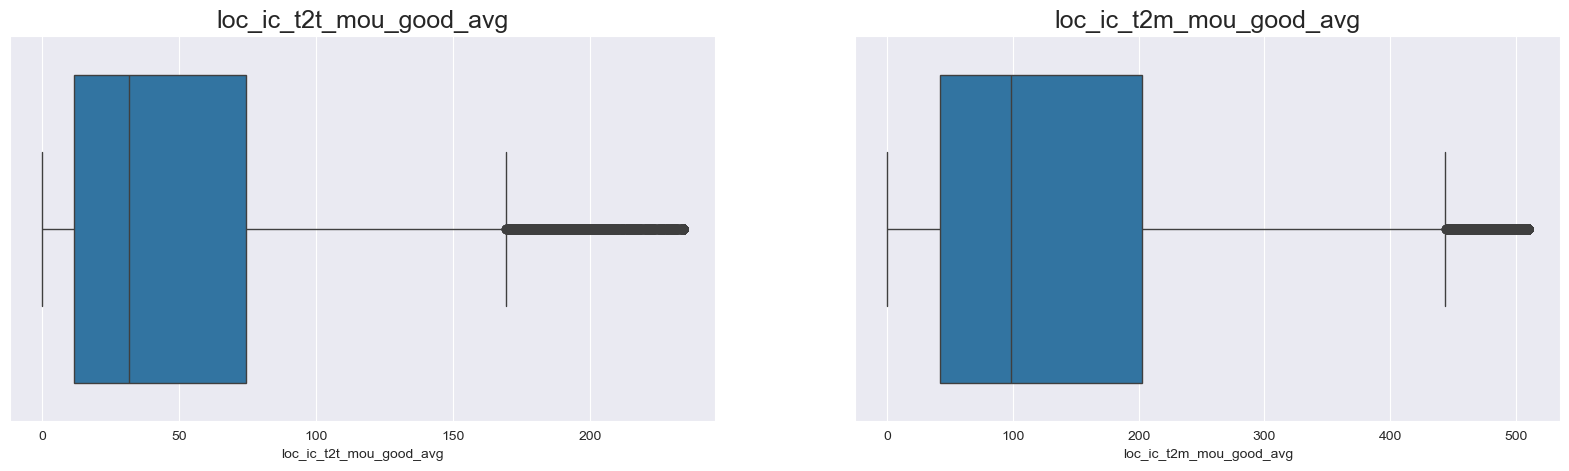

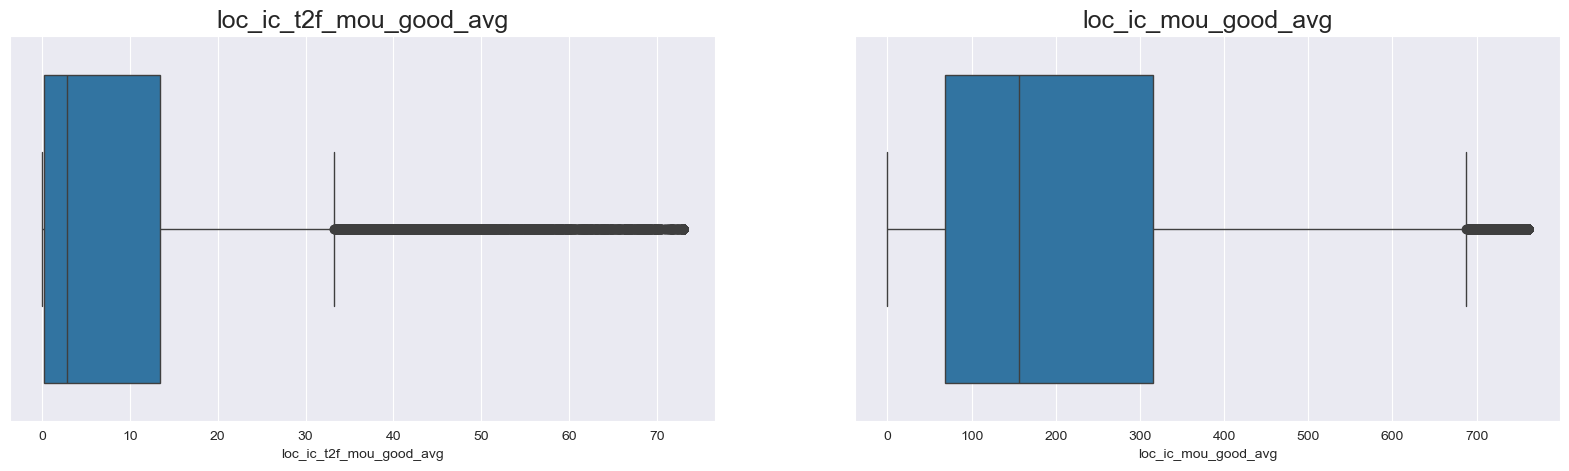

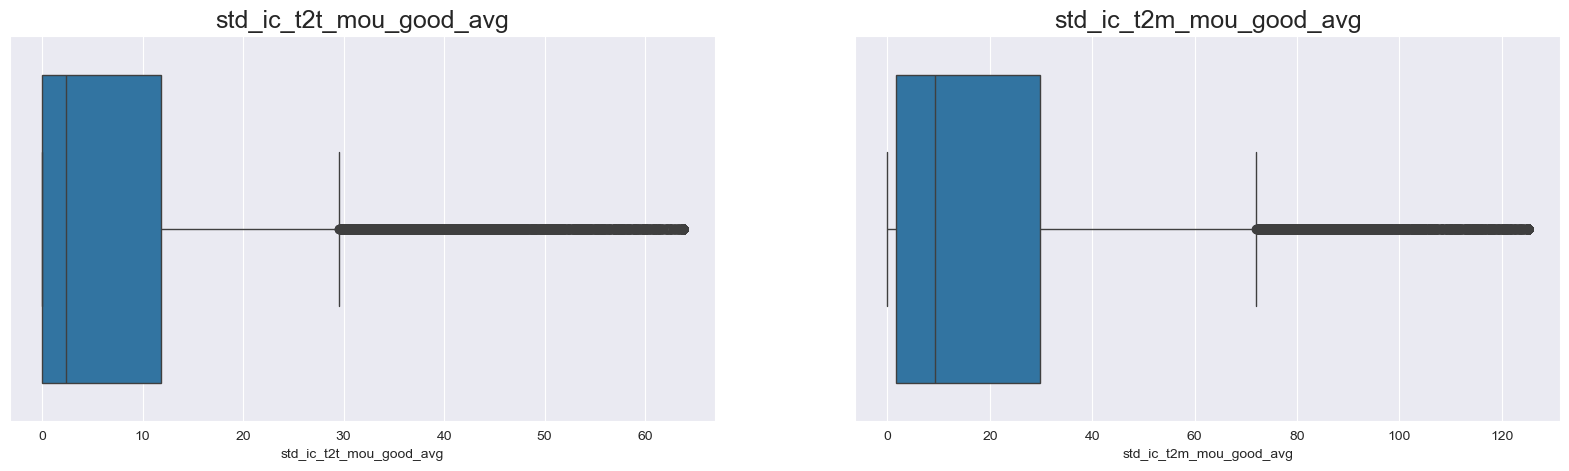

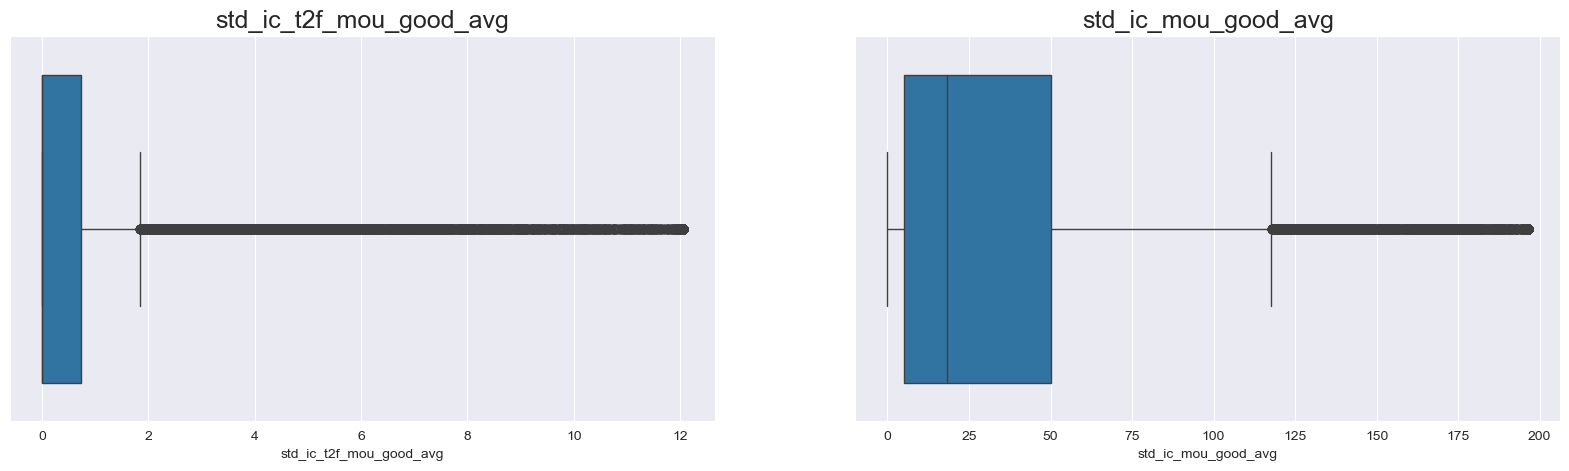

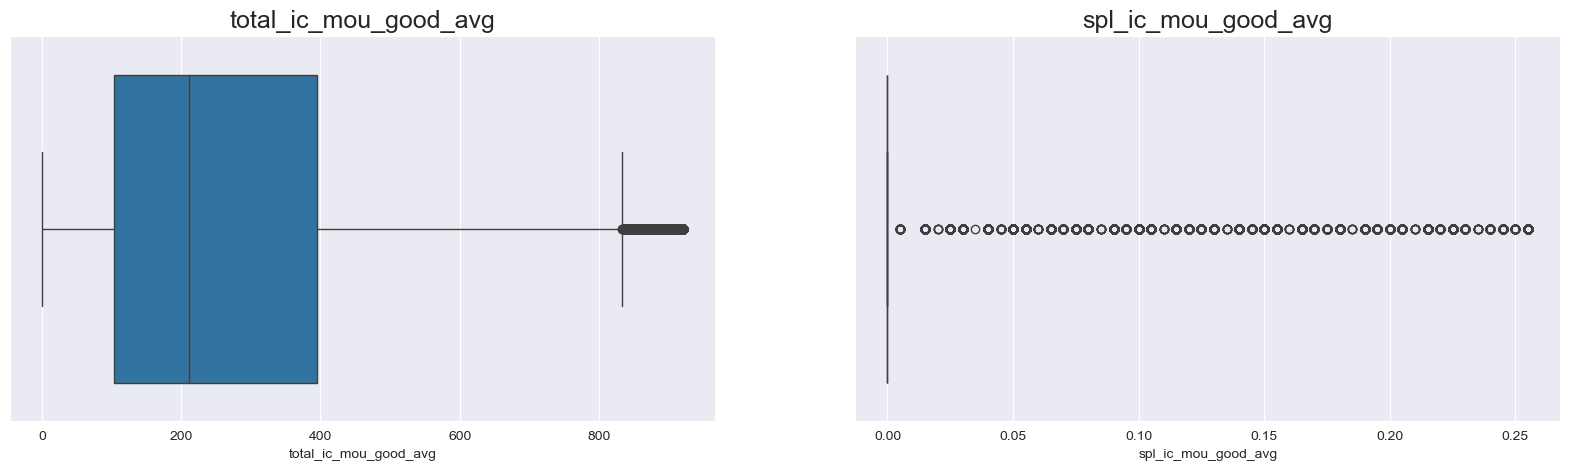

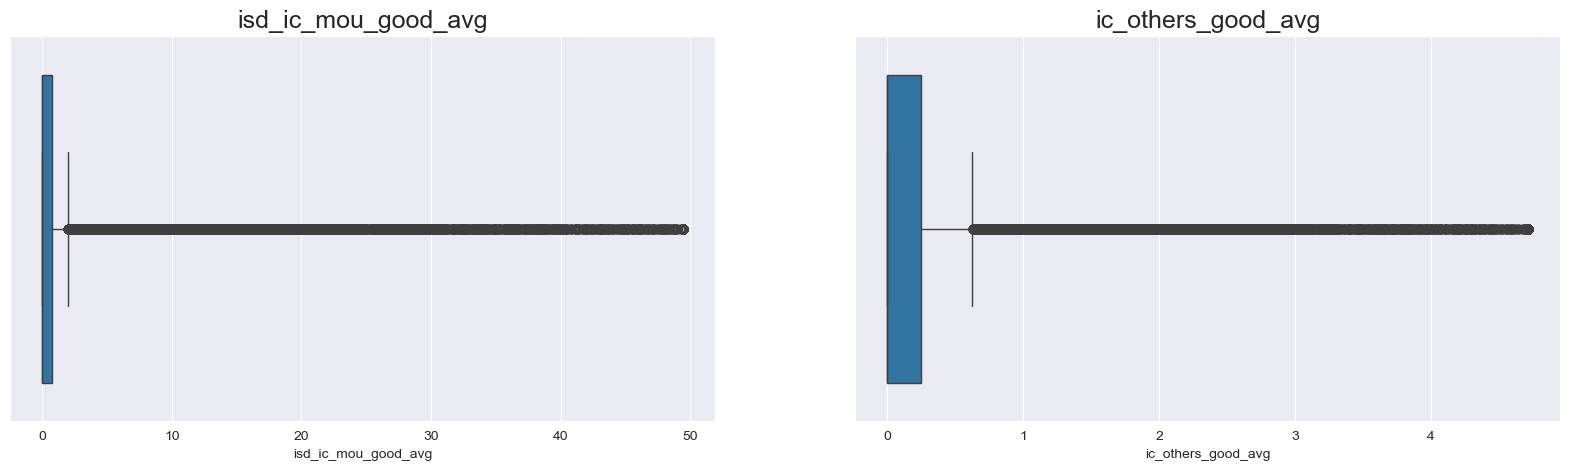

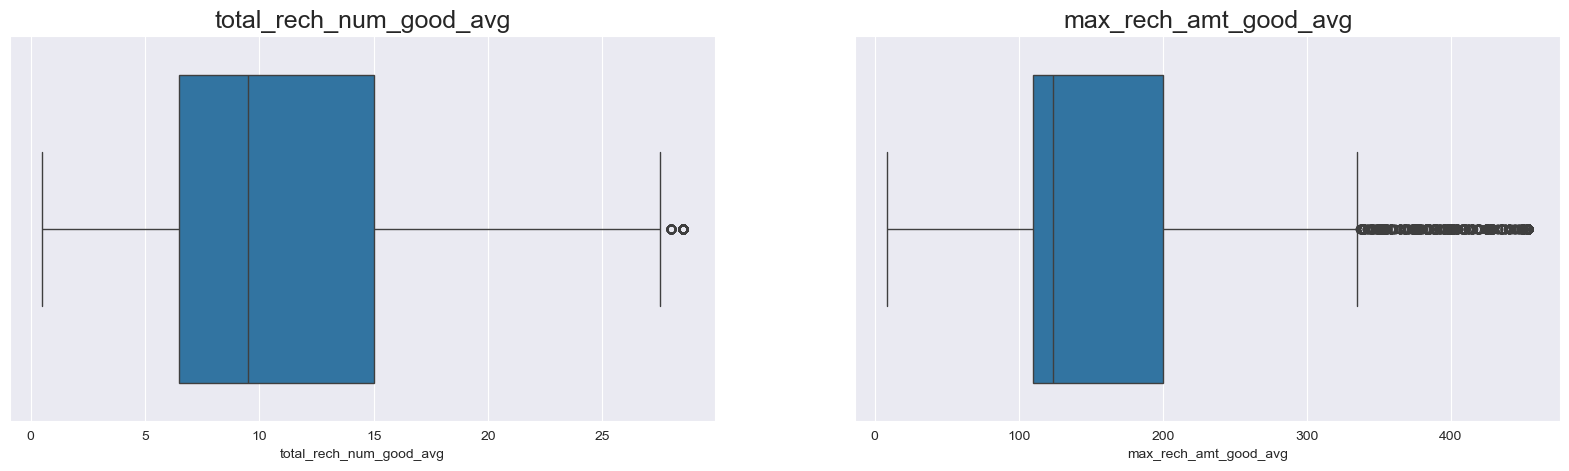

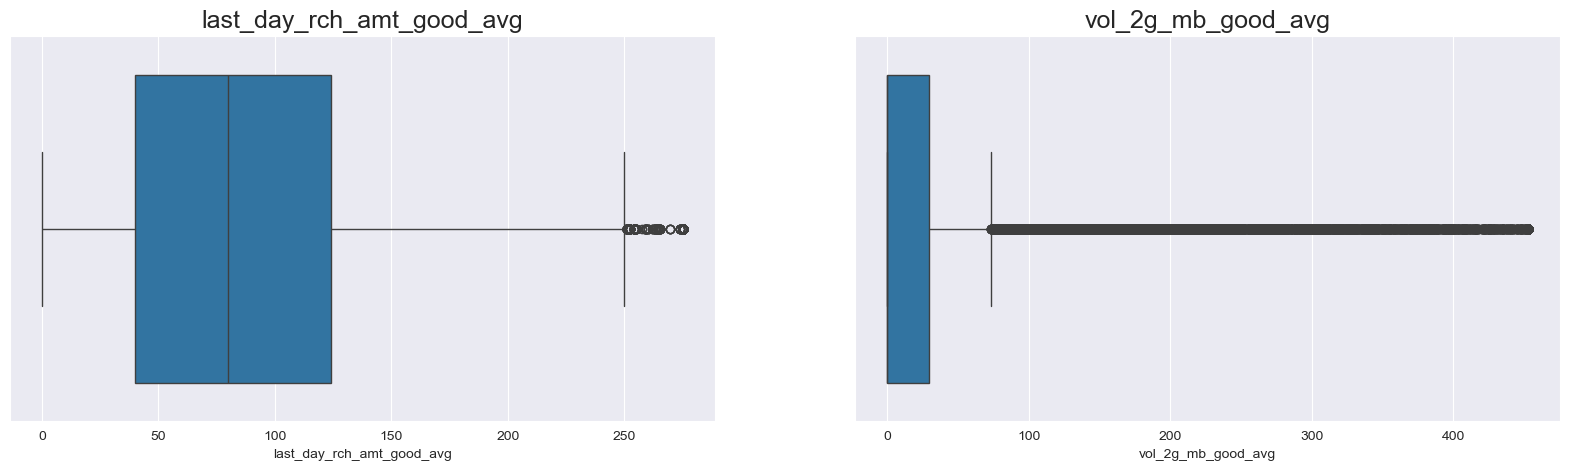

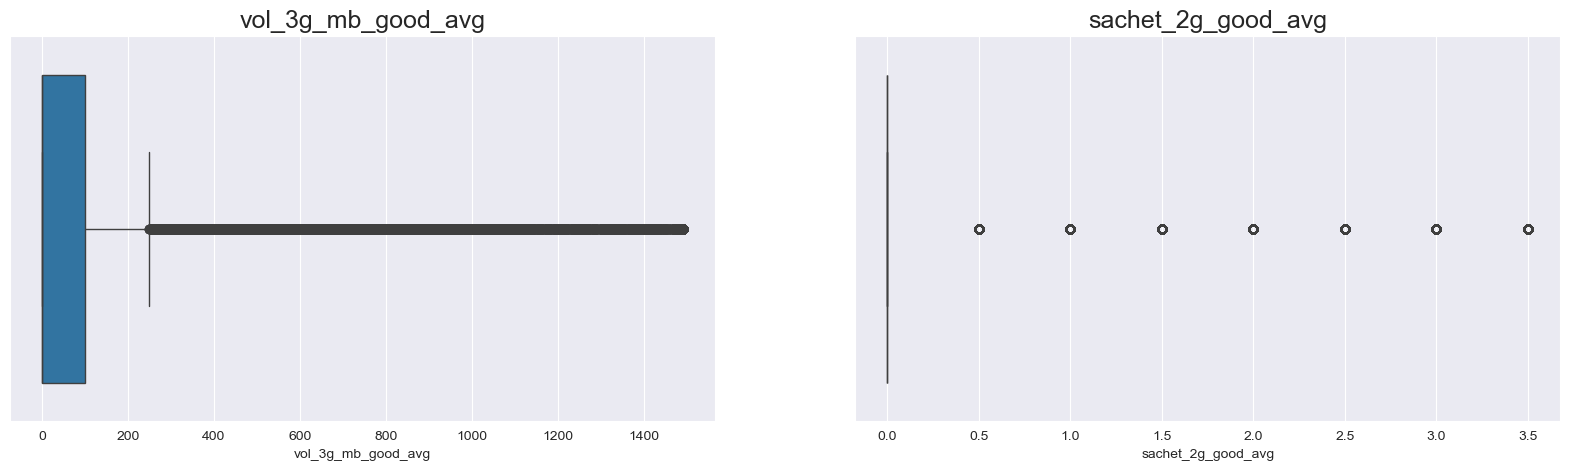

In [78]:
cols = final_df.columns

for i in range(0,len(cols),2):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(cols[i], fontsize=18)
    sns.boxplot(x = cols[i], data = final_df)
    plt.subplot(1,2,2)
    plt.title(cols[i+1], fontsize=18)
    sns.boxplot(x = cols[i+1], data = final_df)
    plt.show()

After capping the outlier values, the boxplots appear much better, but some features still exhibit significant skewness. These features are enlisted below:

- roam_ic_mou_8  
- roam_og_mou_8  
- std_og_t2f_mou_8  
- isd_og_mou_8  
- og_others_8  
- spl_ic_mou_8  
- isd_ic_mou_8  
- vol_2g_mb_8  
- vol_3g_mb_8  
- sachet_2g_8  
- aug_vbc_3g  
- jul_vbc_3g  
- jun_vbc_3g  
- sep_vbc_3g  
- std_og_t2f_mou_good_avg  
- isd_og_mou_good_avg  
- og_others_good_avg  
- sachet_2g_good_avg  

To analyze these features in more detail, the `describe()` function will be used to examine key statistics such as the 90th, 95th, and 99th percentiles.

In [80]:
final_df[["roam_ic_mou_8","roam_og_mou_8","std_og_t2f_mou_8","isd_og_mou_8","og_others_8","spl_ic_mou_8","isd_ic_mou_8","vol_2g_mb_8","vol_3g_mb_8","sachet_2g_8","aug_vbc_3g","jul_vbc_3g","jun_vbc_3g","sep_vbc_3g","std_og_t2f_mou_good_avg","isd_og_mou_good_avg","og_others_good_avg","sachet_2g_good_avg"]].describe(percentiles= (0.25,0.5,0.75,0.9,0.95,0.99))

roam_ic_mou_8  roam_og_mou_8  std_og_t2f_mou_8  isd_og_mou_8  \
count   30011.000000   30011.000000      30011.000000  30011.000000   
mean        5.609037      10.441145          0.589714      0.032134   
std        15.663927      28.864959          1.761386      0.125024   
min         0.000000       0.000000          0.000000      0.000000   
25%         0.000000       0.000000          0.000000      0.000000   
50%         0.000000       0.000000          0.000000      0.000000   
75%         0.000000       0.000000          0.000000      0.000000   
90%        18.680000      37.110000          1.730000      0.000000   
95%        62.787500     114.755000          7.180000      0.550000   
99%        62.795000     114.800000          7.180000      0.550000   
max        62.795000     114.800000          7.180000      0.550000   

       og_others_8  spl_ic_mou_8  isd_ic_mou_8   vol_2g_mb_8   vol_3g_mb_8  \
count      30011.0  30011.000000  30011.000000  30011.000000  30011.000000   
mean           0.0      0.017193      4.293848     41.853878    194.490784   
std            0.0      0.061020     11.718931    104.535891    431.831004   
min            0.0      0.000000      0.000000      0.000000      0.000000   
25%            0.0      0.000000      0.000000      0.000000      0.000000   
50%            0.0      0.000000      0.000000      0.000000      0.000000   
75%            0.0      0.000000      0.000000      9.620000      0.000000   
90%            0.0      0.000000     15.330000    153.540000    914.600000   
95%            0.0      0.250000     46.482500    409.852500   1542.287500   
99%            0.0      0.250000     46.485000    409.905000   1542.315000   
max            0.0      0.250000     46.485000    409.905000   1542.315000   

        sachet_2g_8    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g    sep_vbc_3g  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean       0.457699     96.509621     99.526191     86.220515      1.165709   
std        1.076622    222.971066    230.743641    205.853202      4.315661   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.600000      1.990000      0.000000      0.000000   
90%        2.000000    438.970000    454.830000    394.500000      0.000000   
95%        4.000000    818.520000    845.277500    761.635000     18.632500   
99%        4.000000    818.750000    845.315000    761.740000     18.635000   
max        4.000000    818.750000    845.315000    761.740000     18.635000   

       std_og_t2f_mou_good_avg  isd_og_mou_good_avg  og_others_good_avg  \
count             30011.000000          30011.00000        30011.000000   
mean                  0.799569              0.12987            0.258183   
std                   2.087002              0.43484            0.578917   
min                   0.000000              0.00000            0.000000   
25%                   0.000000              0.00000            0.000000   
50%                   0.000000              0.00000            0.000000   
75%                   0.000000              0.00000            0.000000   
90%                   2.945000              0.19000            1.145000   
95%                   8.275000              1.85500            2.105000   
99%                   8.280000              1.85500            2.105000   
max                   8.280000              1.85500            2.105000   

       sachet_2g_good_avg  
count        30011.000000  
mean             0.401703  
std              0.916854  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
90%              1.500000  
95%              3.500000  
99%              3.500000  
max              3.500000

From the result we derived above as statistical analysis, the columns provided below are highly skewed (at least 75 percentile values are same as minimum) and there is not much difference in their other values:

After capping the outlier values, the boxplots look cleaner; however, a few features still show significant skewness. These features are:

1. roam_ic_mou_8  
2. roam_og_mou_8  
3. std_og_t2f_mou_8  
4. isd_og_mou_8  
5. og_others_8  
6. spl_ic_mou_8  
7. isd_ic_mou_8  
8. vol_3g_mb_8  
9. sachet_2g_8  
10. aug_vbc_3g  
11. jul_vbc_3g  
12. jun_vbc_3g  
13. sep_vbc_3g  
14. std_og_t2f_mou_good_avg  
15. isd_og_mou_good_avg  
16. og_others_good_avg  
17. sachet_2g_good_avg  

So we will be dropping these highly skewed features/columns

In [83]:
final_df.drop(["roam_ic_mou_8","roam_og_mou_8","std_og_t2f_mou_8","isd_og_mou_8","og_others_8","spl_ic_mou_8","isd_ic_mou_8","vol_3g_mb_8","sachet_2g_8","aug_vbc_3g","jul_vbc_3g","jun_vbc_3g","sep_vbc_3g","std_og_t2f_mou_good_avg","isd_og_mou_good_avg","og_others_good_avg","sachet_2g_good_avg"], axis = 1, inplace = True)
final_df.shape

(30011, 63)

Below enlisted two features have outliers on the lower side as well. Looking at those in detail to take required action:

1. arpu_8
2. arpu_good_avg

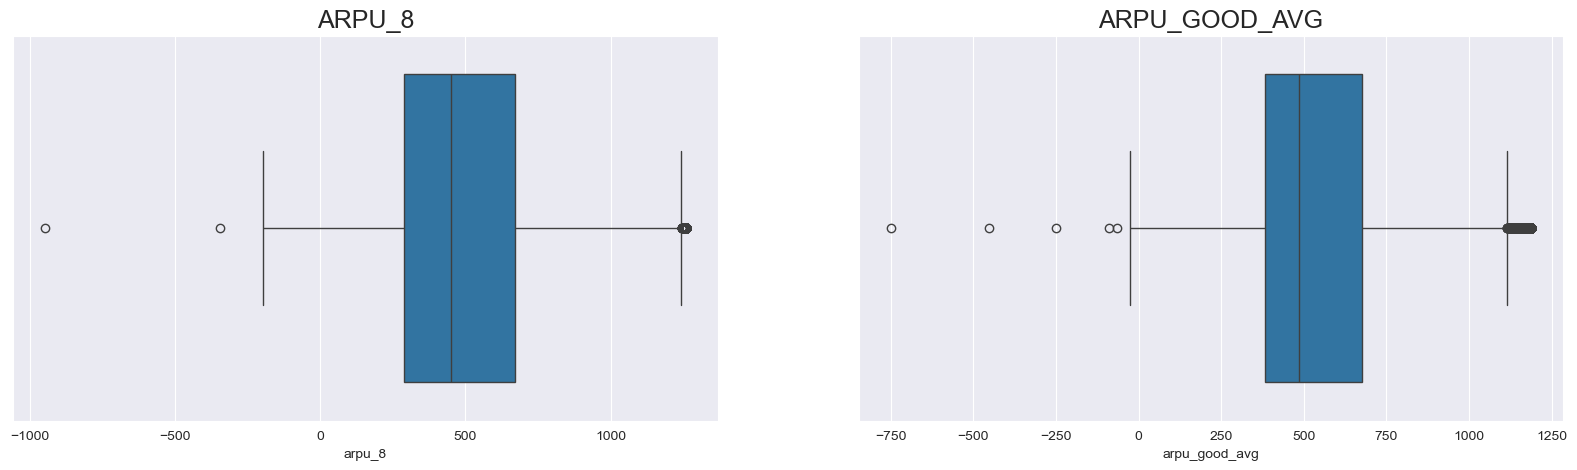

arpu_8  arpu_good_avg
count  30011.000000   30011.000000
mean     506.491979     562.892027
std      318.245594     243.477280
min     -945.808000    -749.783000
0.1%      -5.000000      72.150000
1%         0.000000     253.246200
5%        22.206000     313.706750
10%      134.170000     333.576000
20%      252.300000     364.696000
25%      289.609500     381.272250
50%      452.091000     485.602500
75%      671.150000     674.492000
max     1258.555500    1187.986000

In [85]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("ARPU_8", fontsize=18)
sns.boxplot(x = "arpu_8", data = final_df)

plt.subplot(1,2,2)
plt.title("ARPU_GOOD_AVG", fontsize=18)
sns.boxplot(x = "arpu_good_avg", data = final_df)

plt.show()

final_df[["arpu_8","arpu_good_avg"]].describe(percentiles= (0.001, 0.01, 0.05, 0.1, 0.2, 0.25,0.5,0.75))

After examining the boxplots and the descriptive statistics of the two columns, it is most effective to cap the lower values at the 0.1st percentile for both columns.

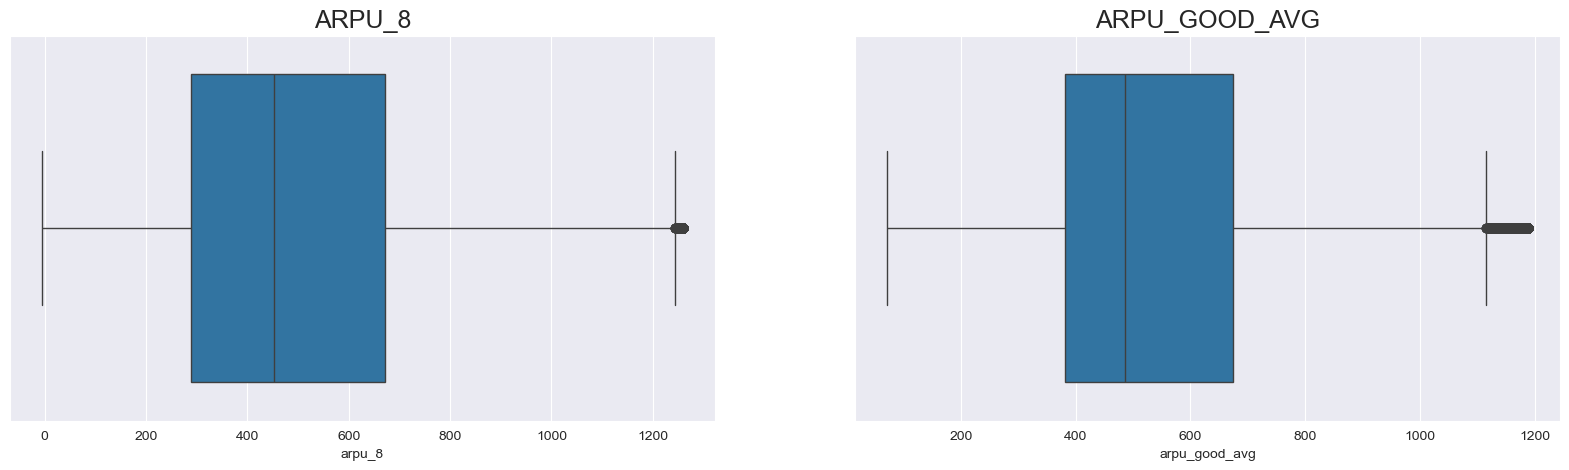

arpu_8  arpu_good_avg
count  30011.000000   30011.000000
mean     506.547152     562.988154
std      318.102234     243.204363
min       -5.000000      72.150000
0.1%      -5.000000      72.275235
1%         0.000000     253.246200
5%        22.206000     313.706750
10%      134.170000     333.576000
20%      252.300000     364.696000
25%      289.609500     381.272250
50%      452.091000     485.602500
75%      671.150000     674.492000
max     1258.555500    1187.986000

In [87]:
arpu_8_val = final_df["arpu_8"].quantile(0.001)
final_df["arpu_8"][final_df["arpu_8"] <= arpu_8_val] = arpu_8_val


arpu_good_avg_val = final_df["arpu_good_avg"].quantile(0.001)
final_df["arpu_good_avg"][final_df["arpu_good_avg"] <= arpu_good_avg_val] = arpu_good_avg_val



plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("ARPU_8", fontsize=18)
sns.boxplot(x = "arpu_8", data = final_df)

plt.subplot(1,2,2)
plt.title("ARPU_GOOD_AVG", fontsize=18)
sns.boxplot(x = "arpu_good_avg", data = final_df)

plt.show()

final_df[["arpu_8","arpu_good_avg"]].describe(percentiles= (0.001, 0.01, 0.05, 0.1, 0.2, 0.25,0.5,0.75))

**Perform Bivariate Analysis**

Analyzing each feature separately for customers who churned and those who did not churn.

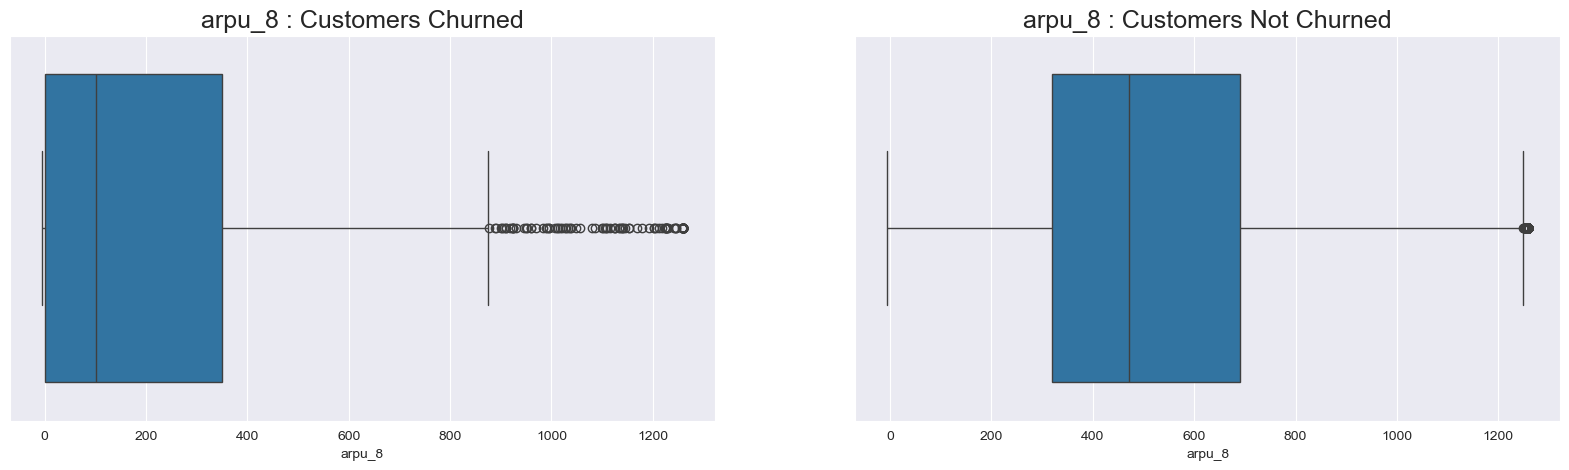

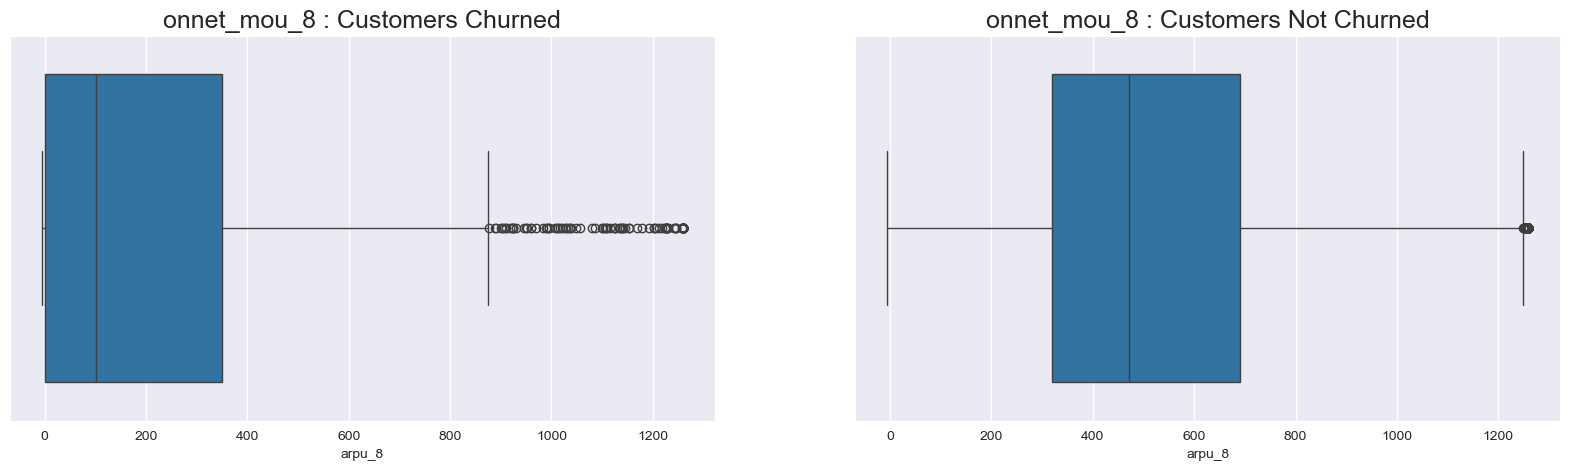

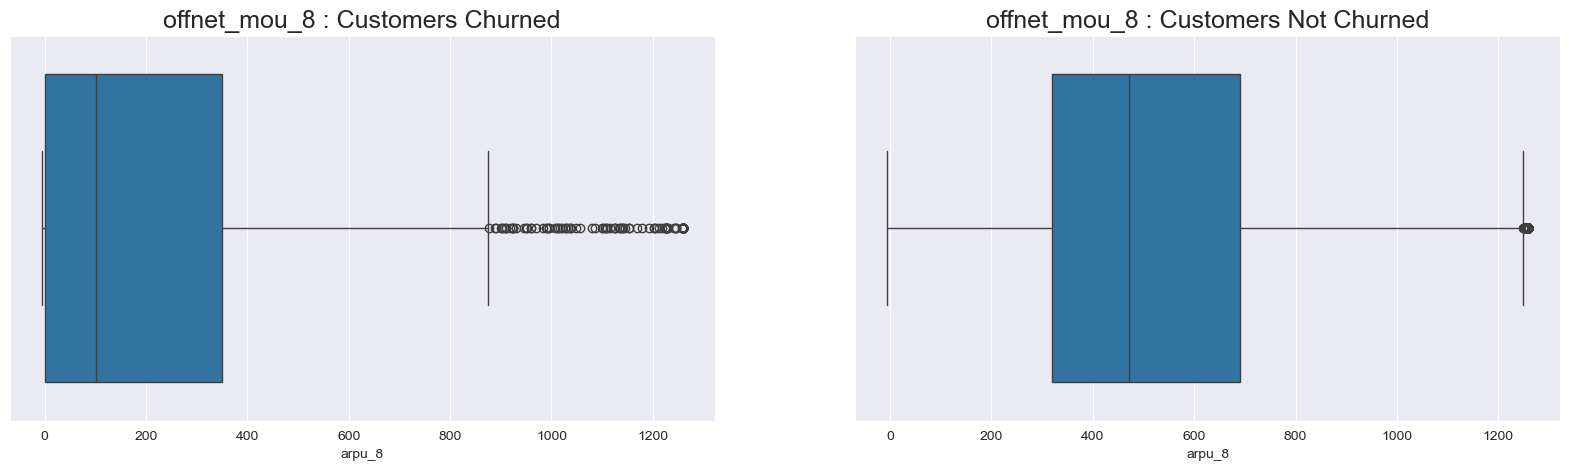

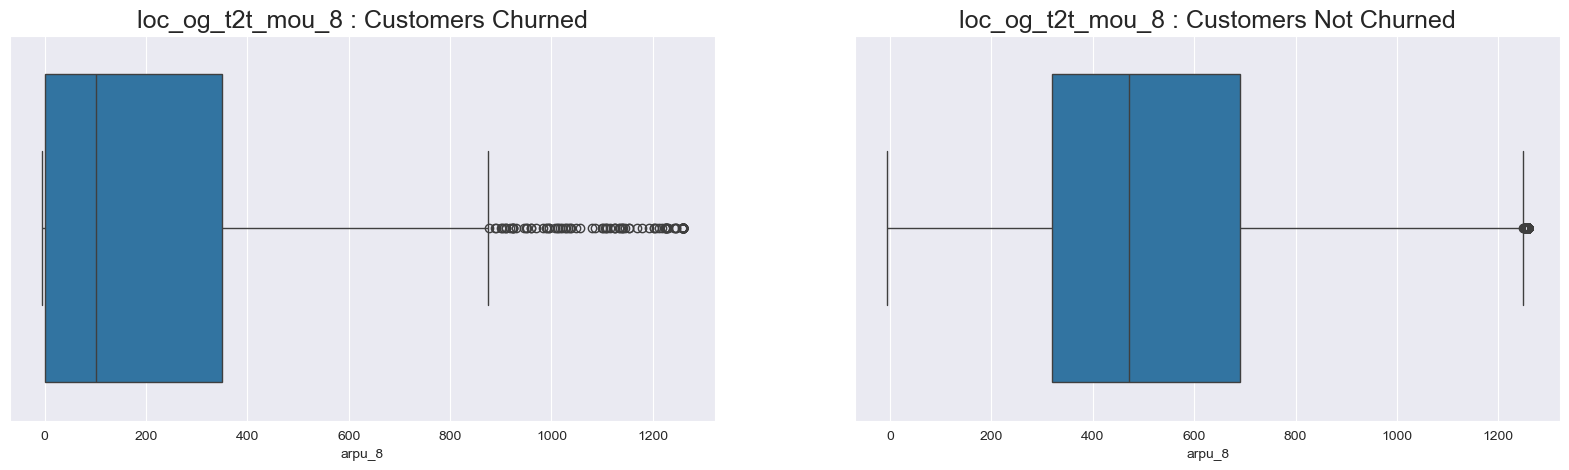

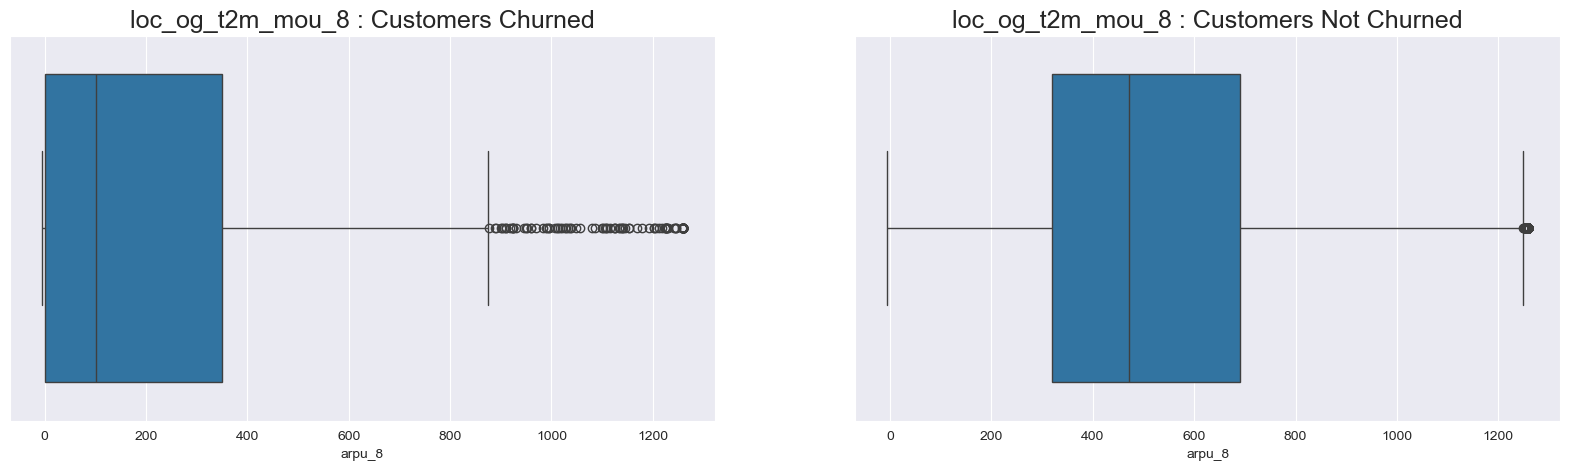

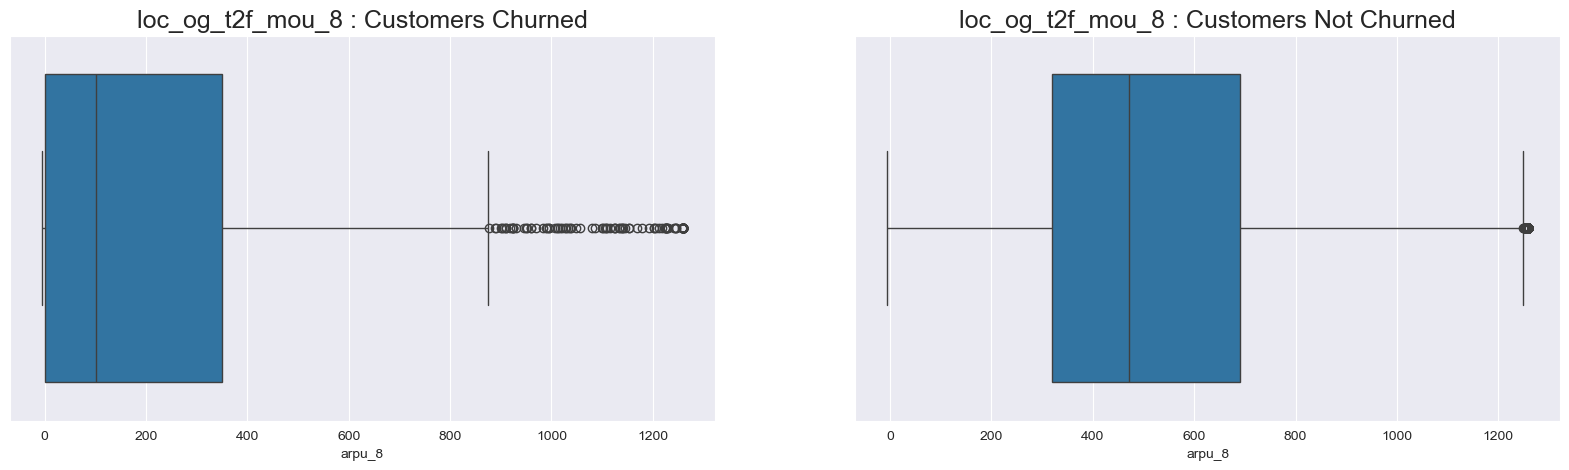

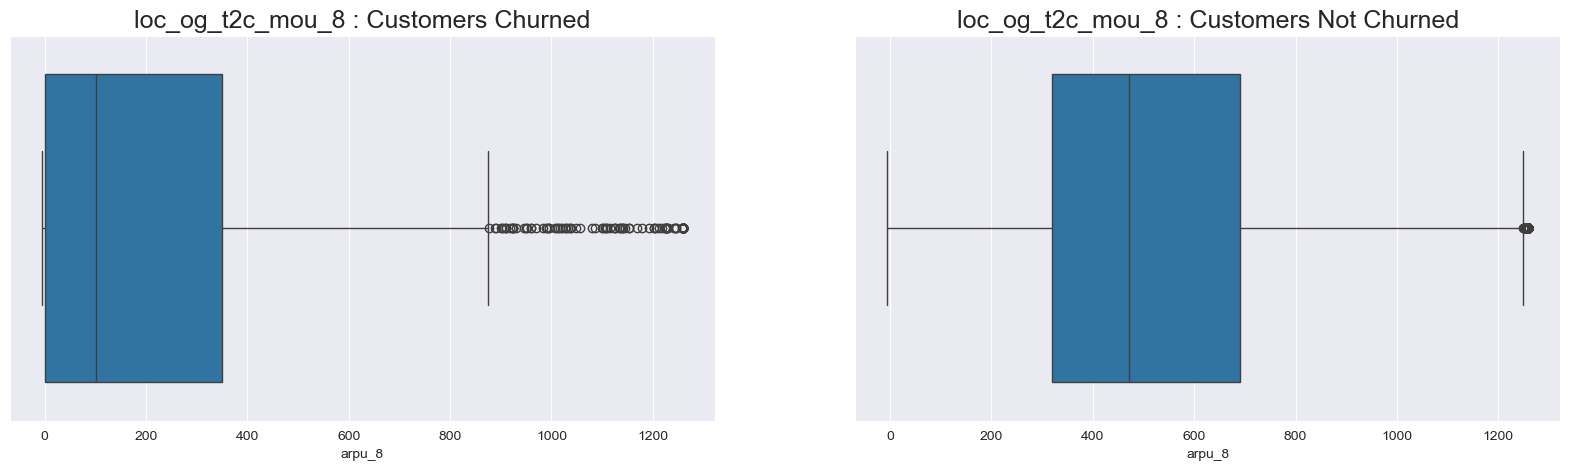

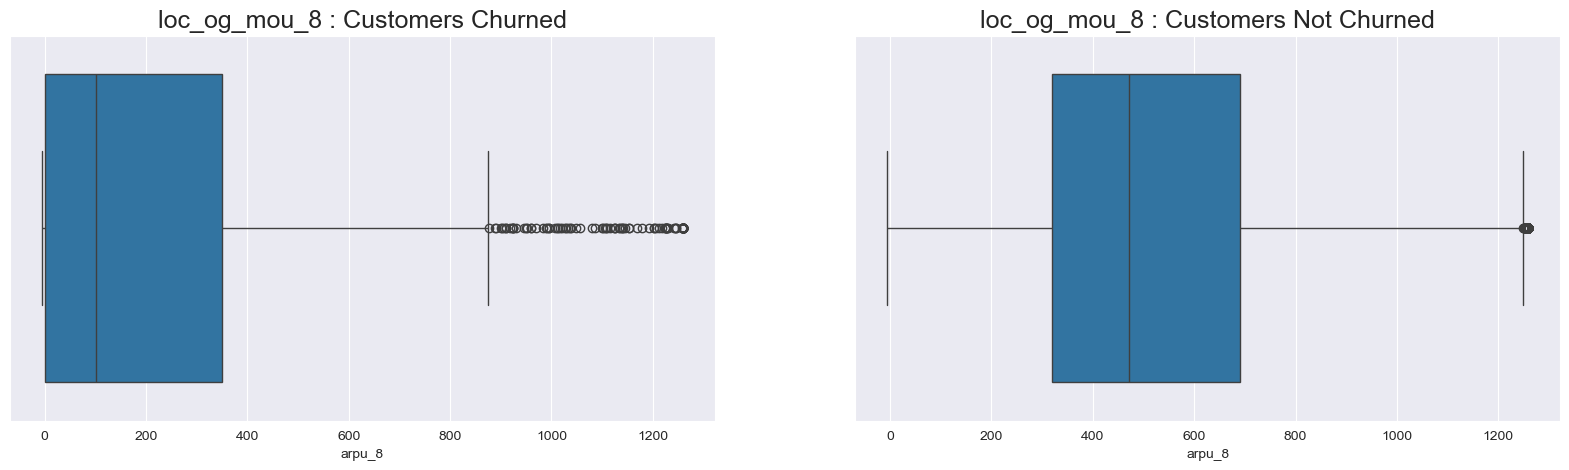

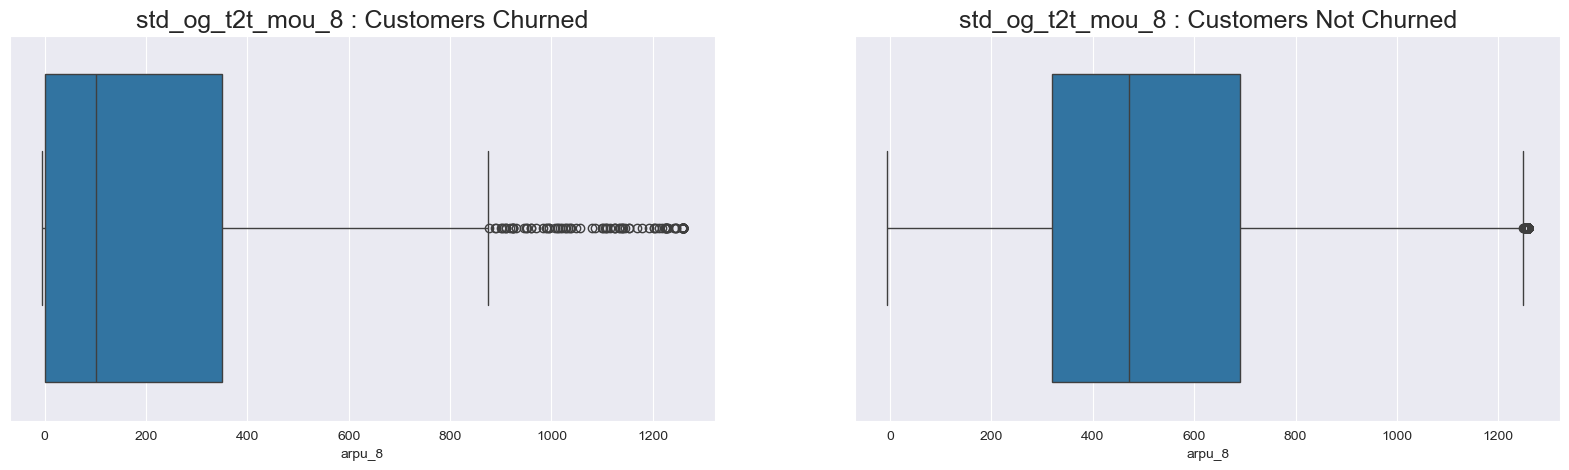

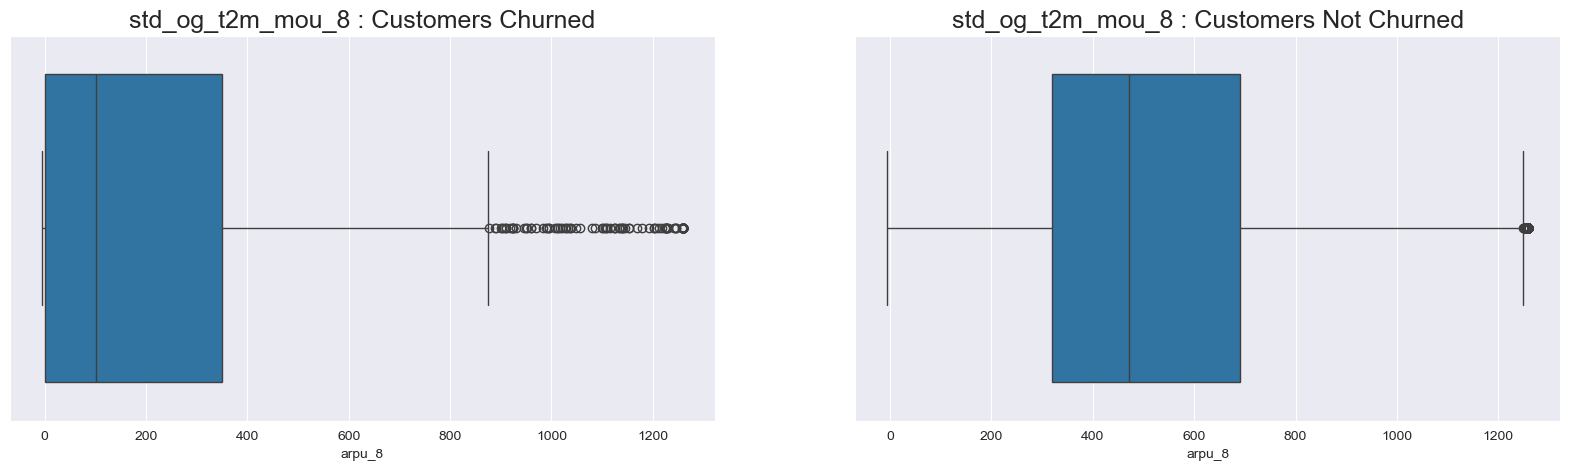

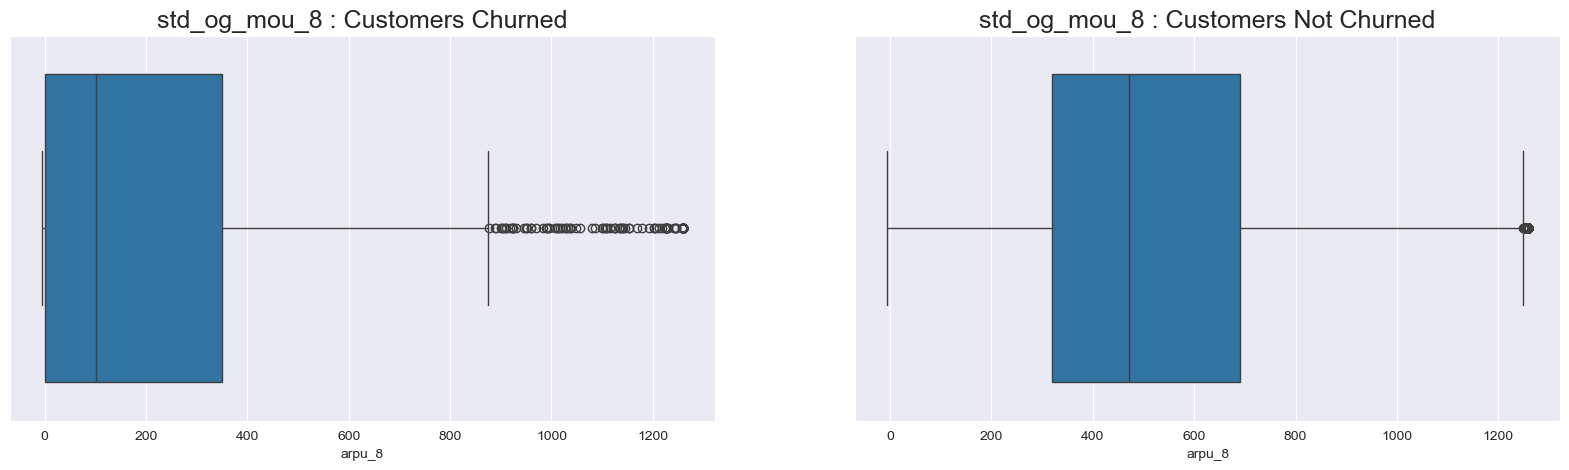

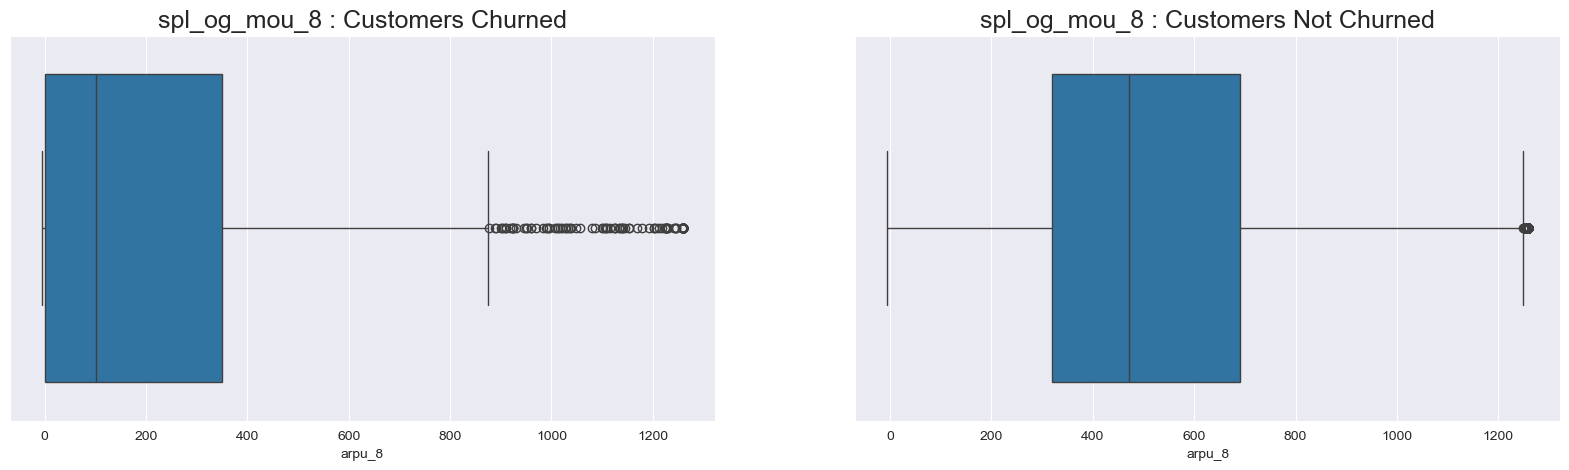

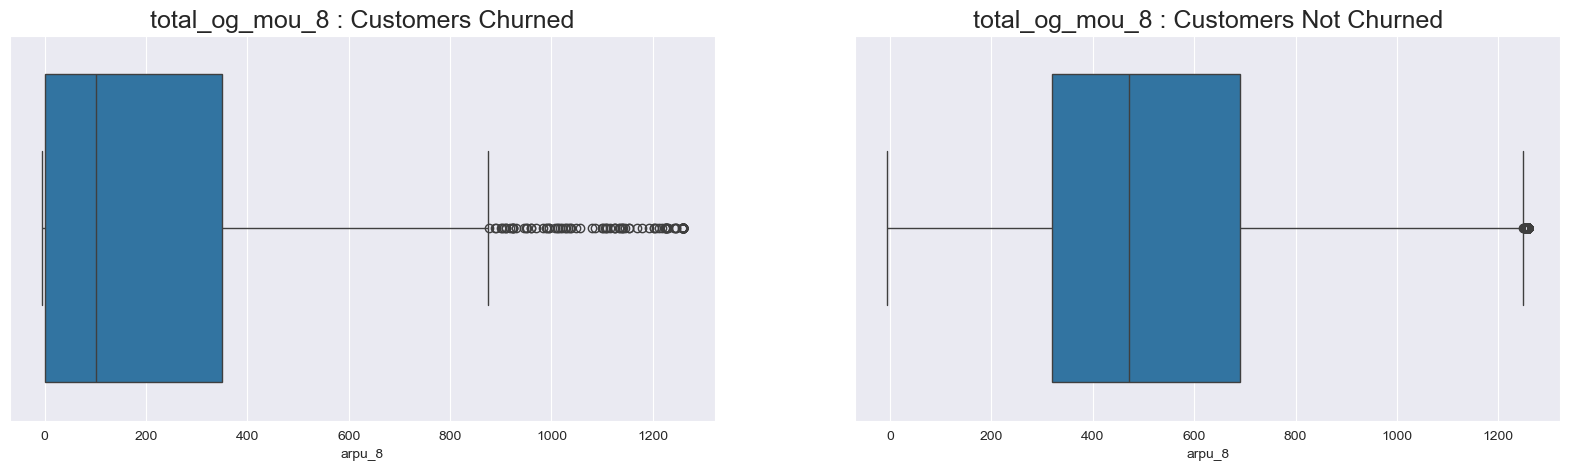

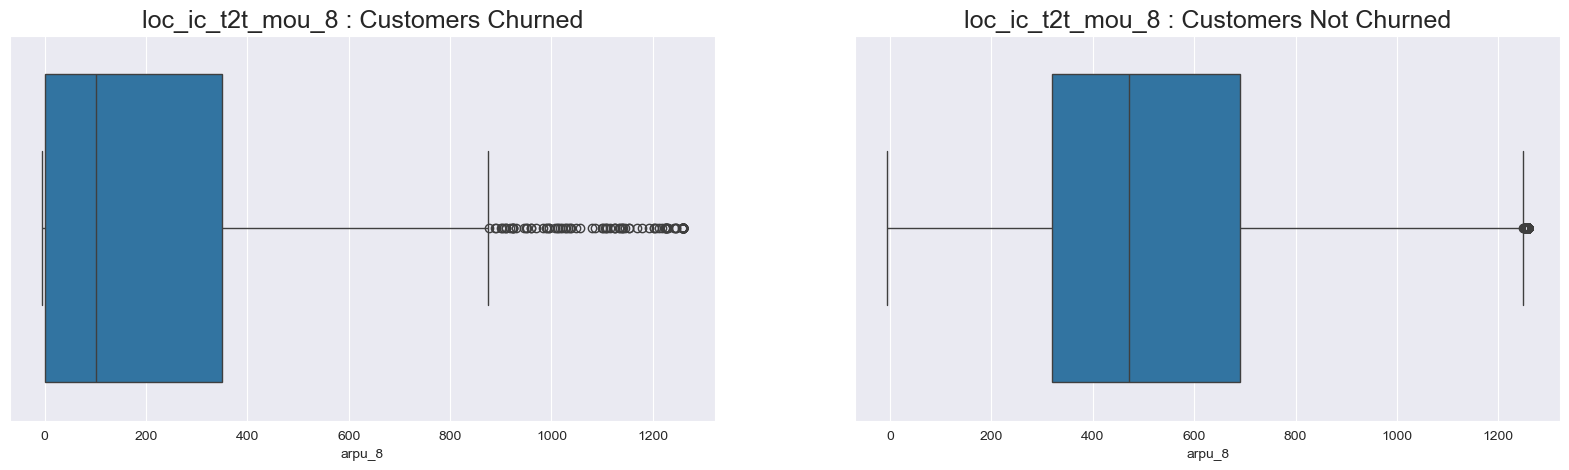

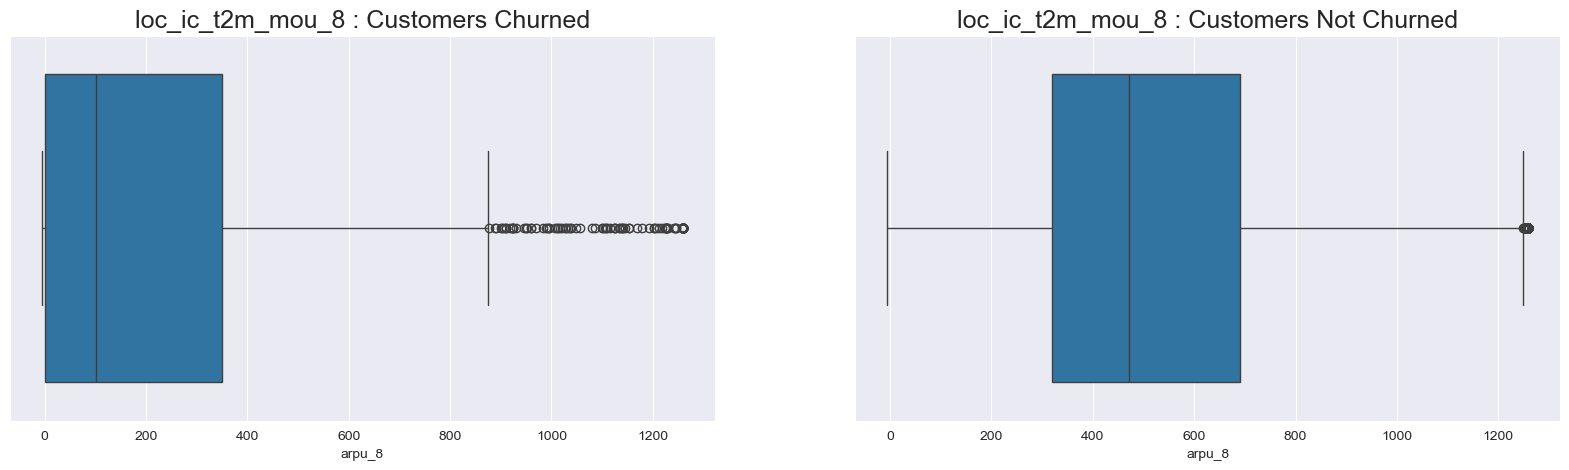

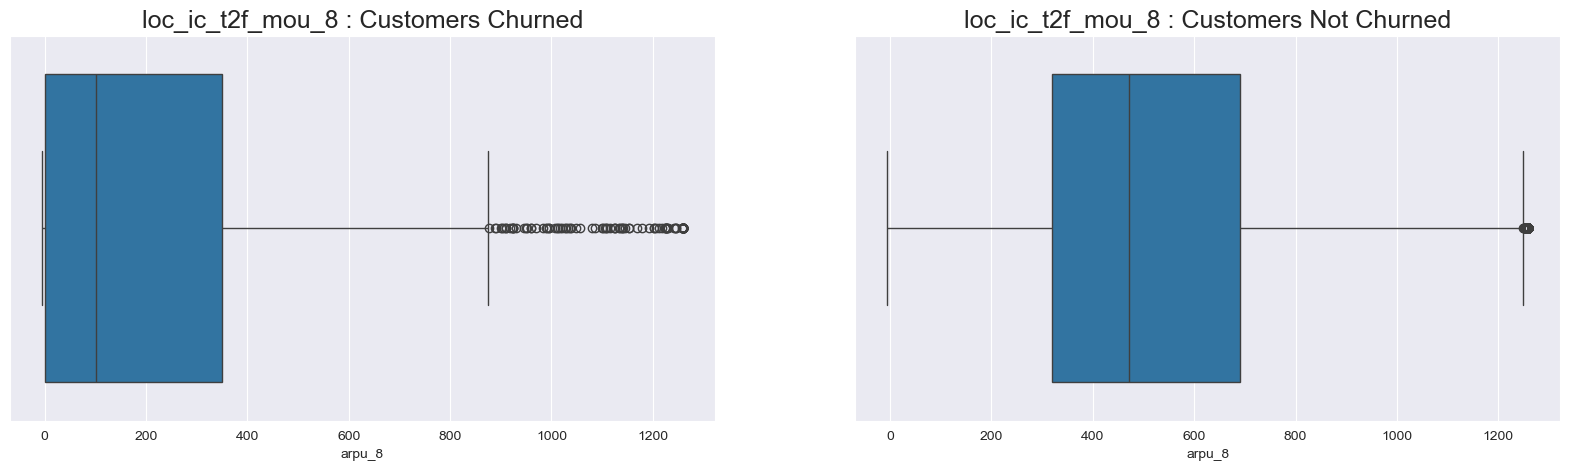

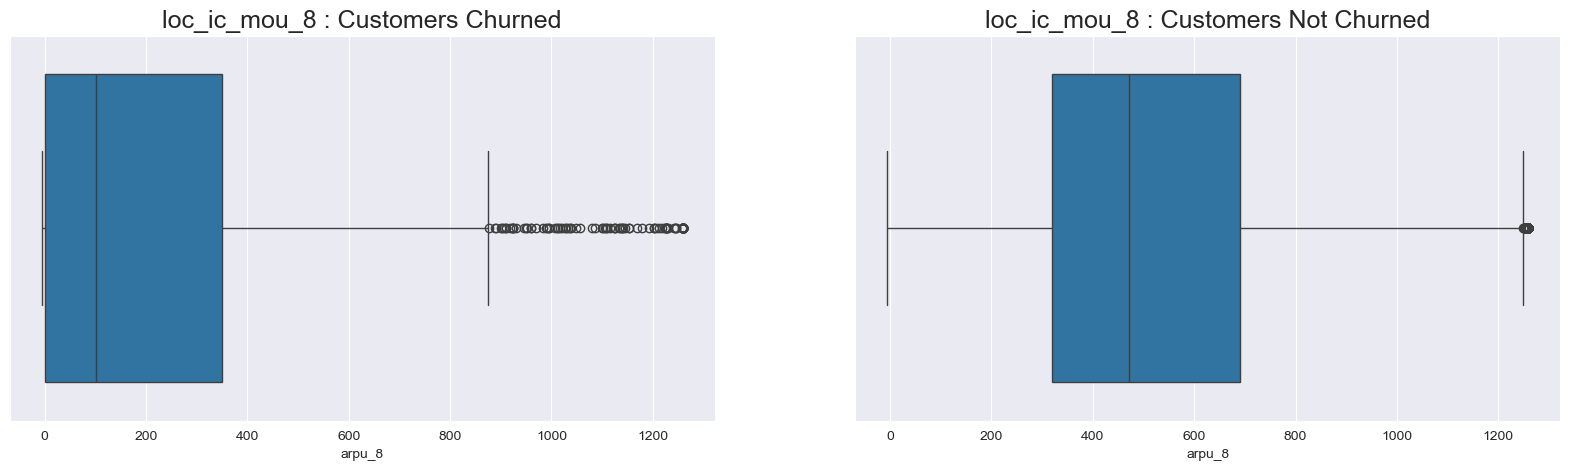

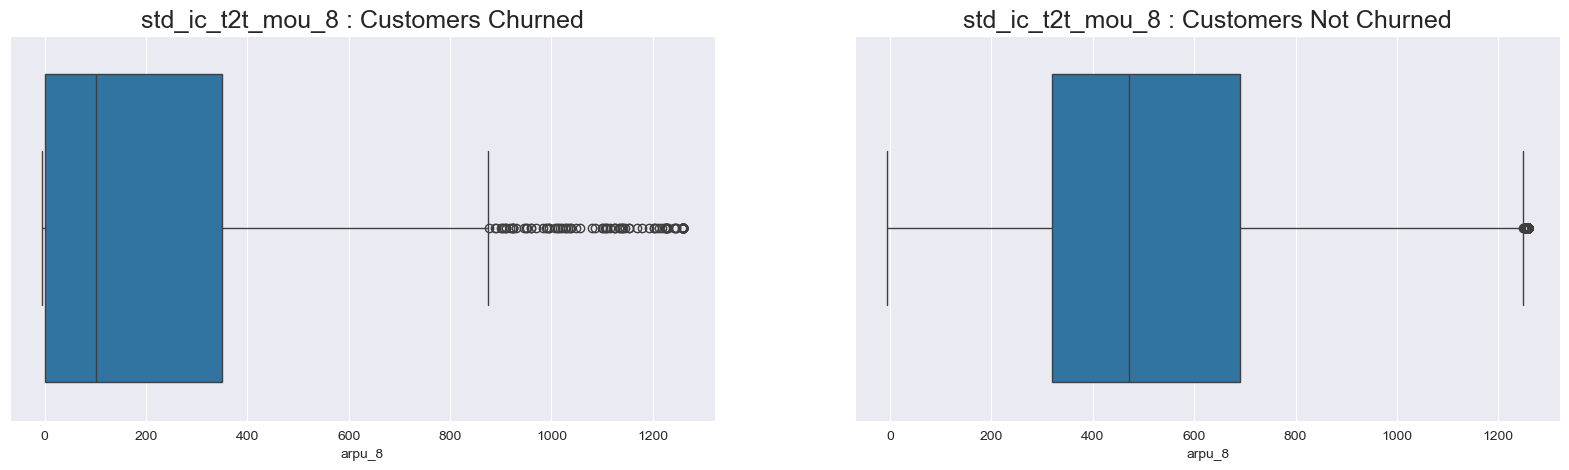

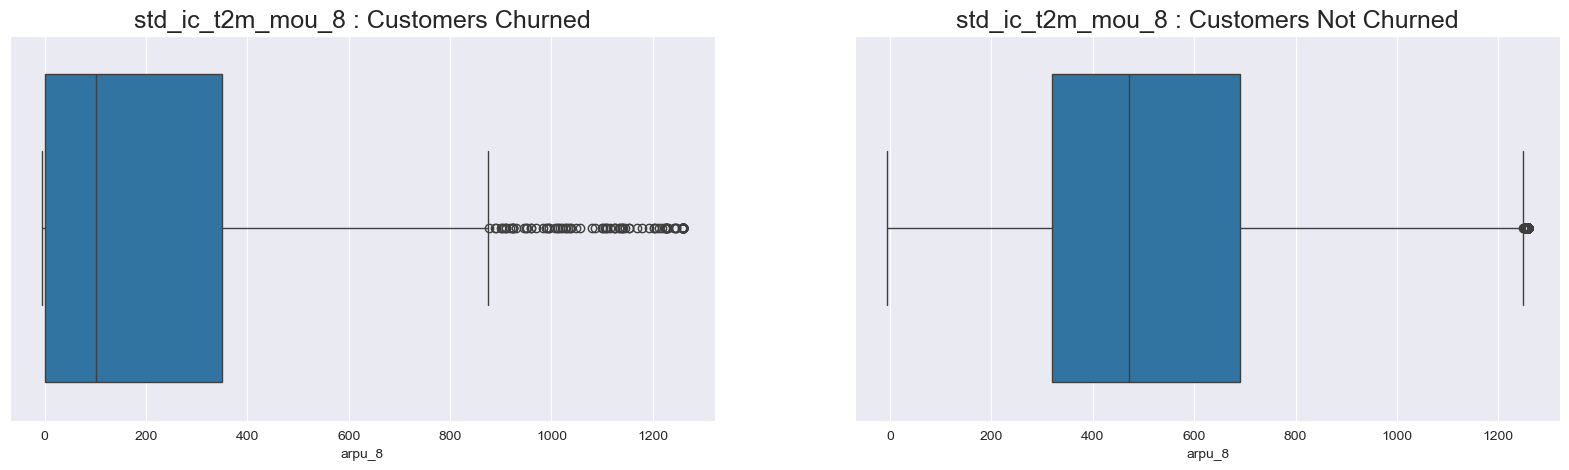

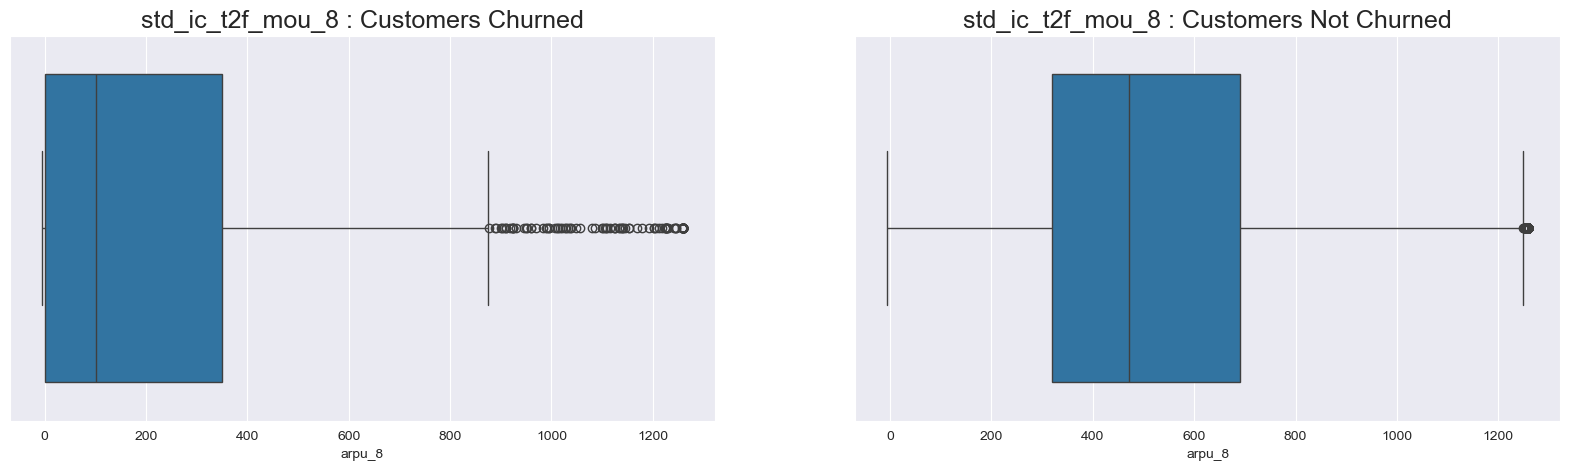

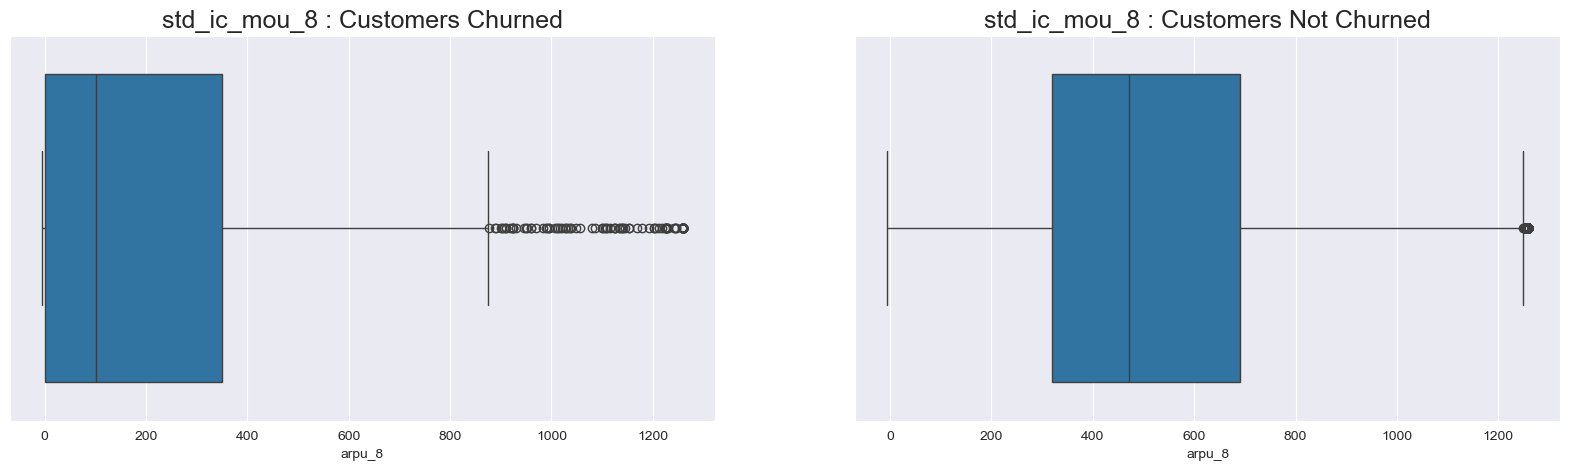

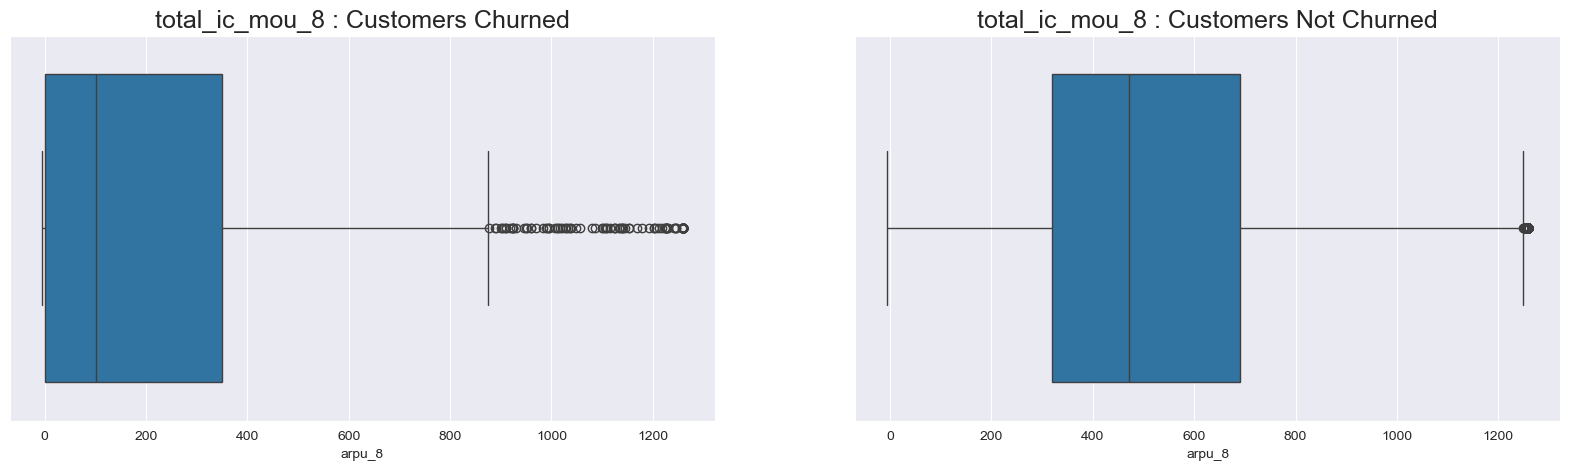

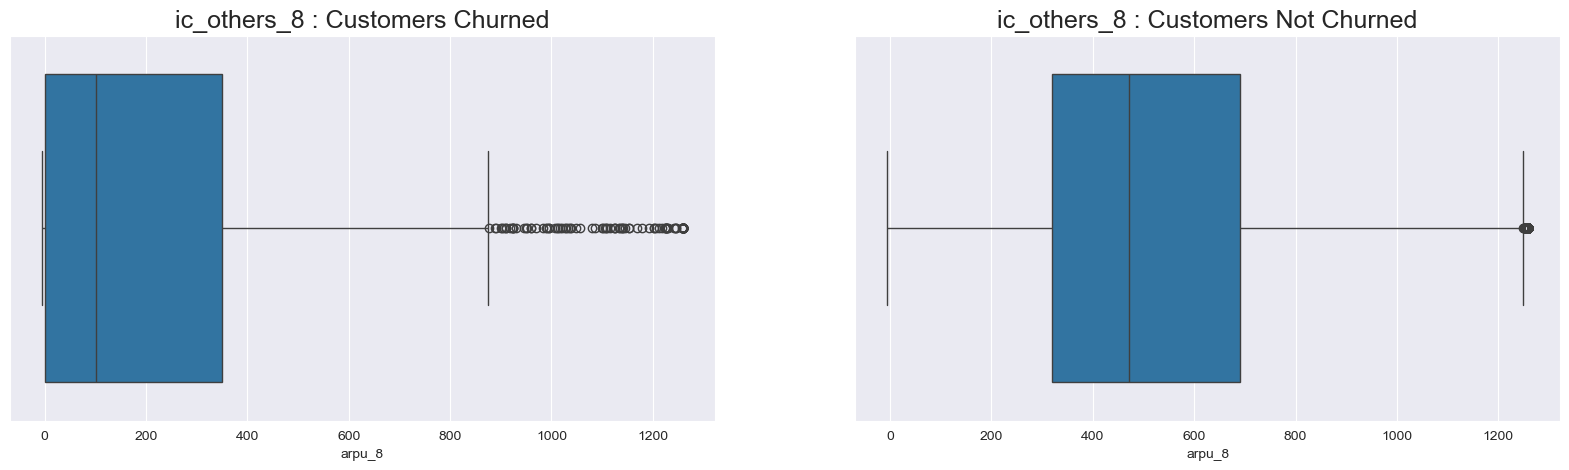

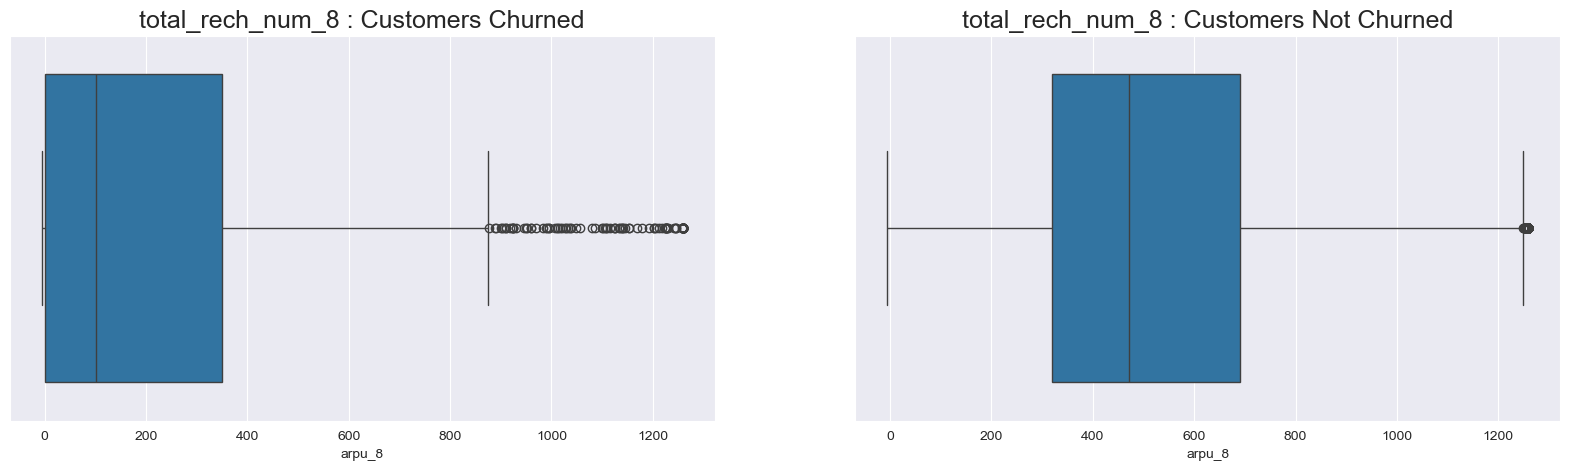

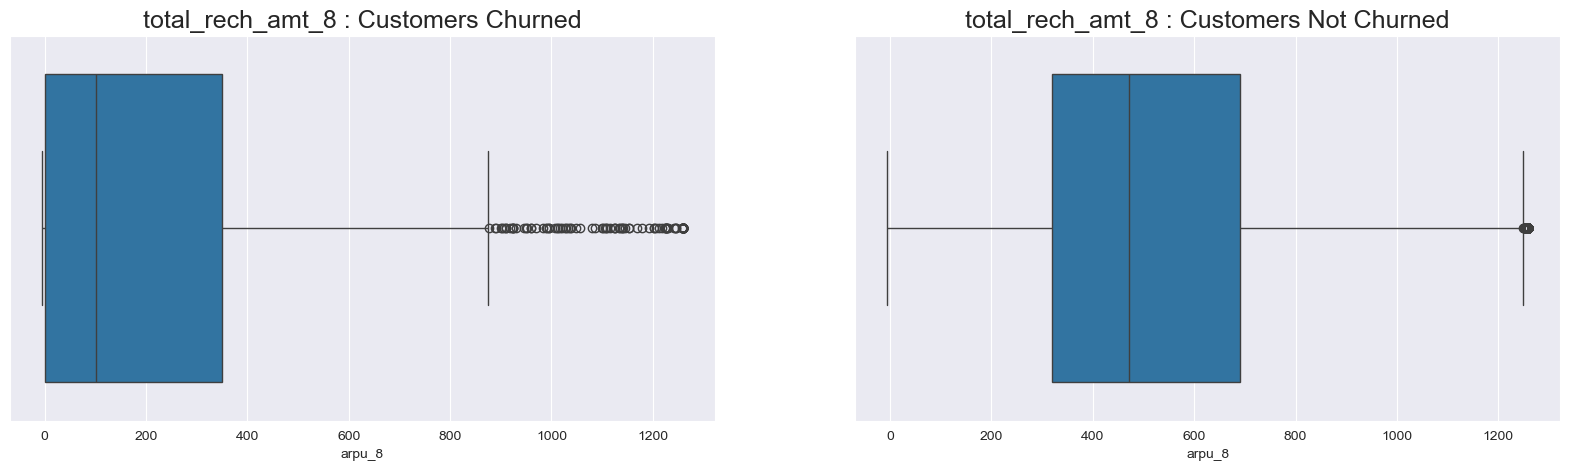

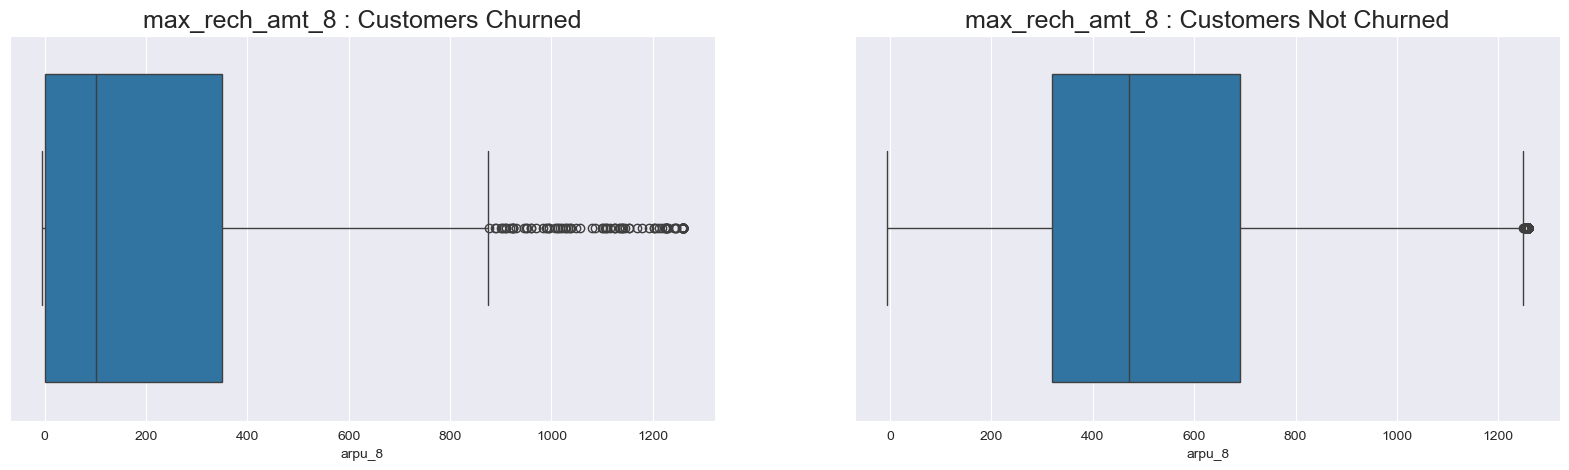

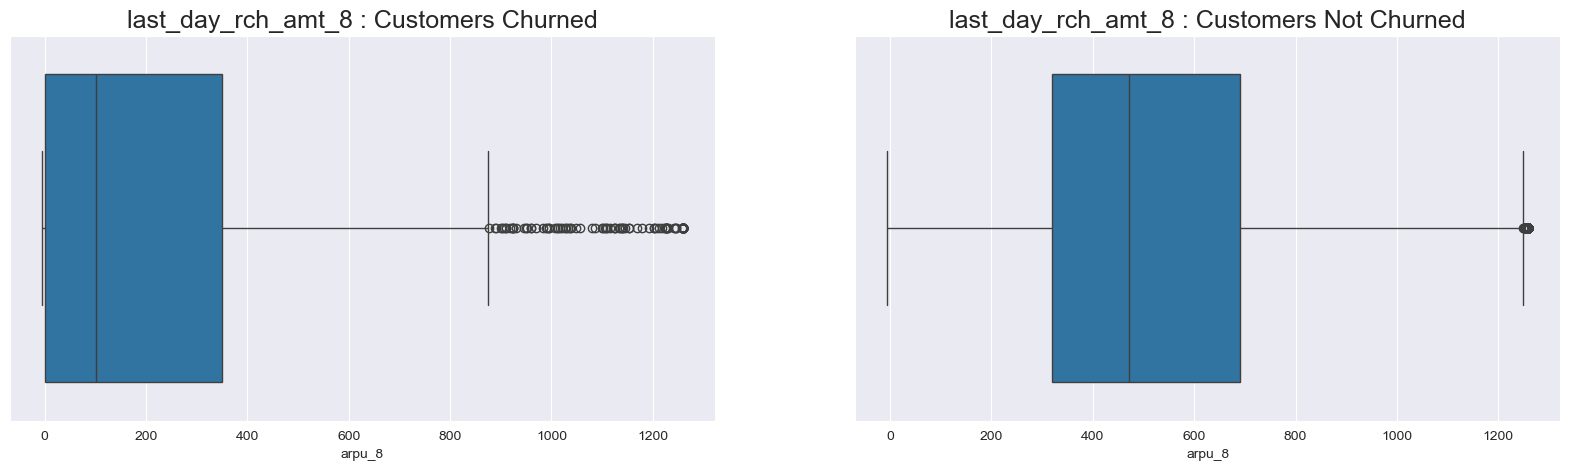

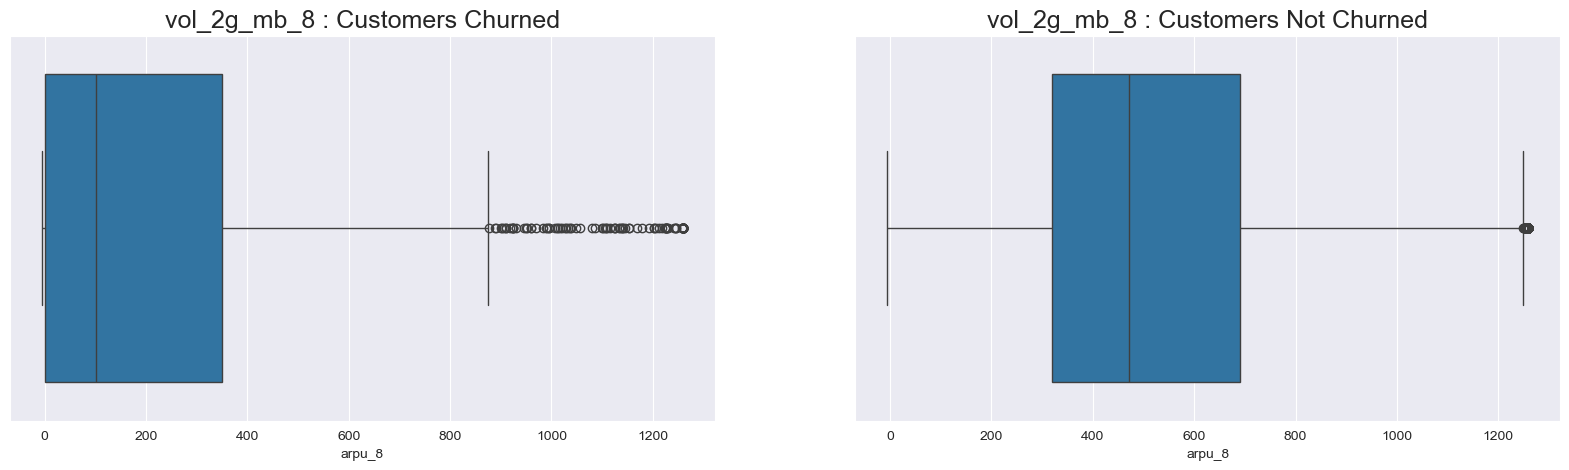

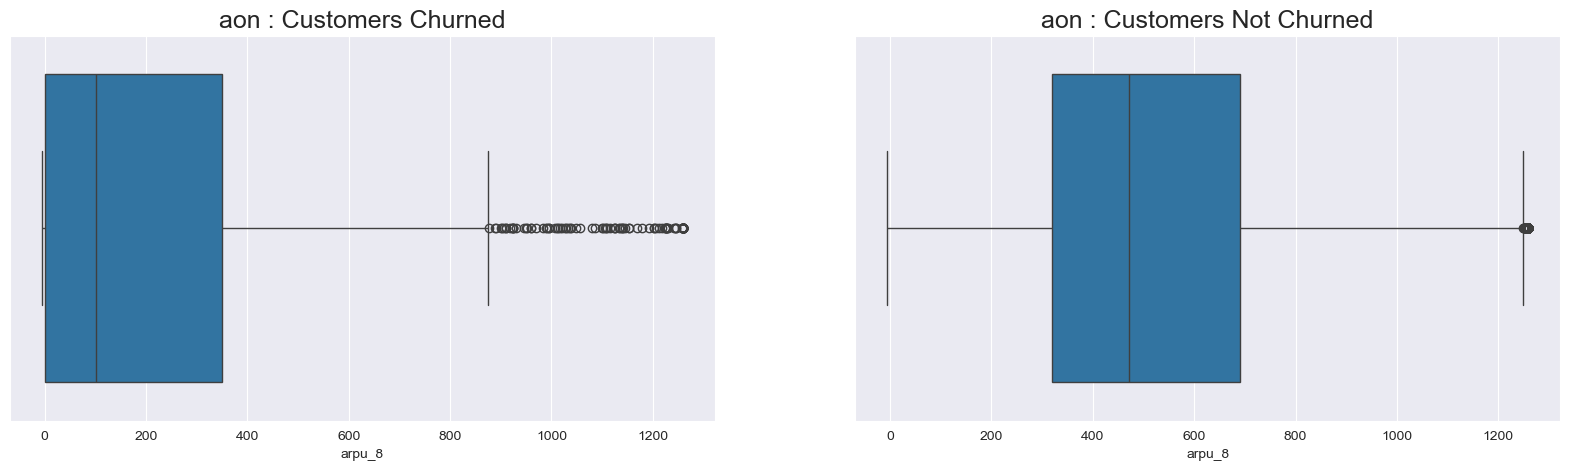

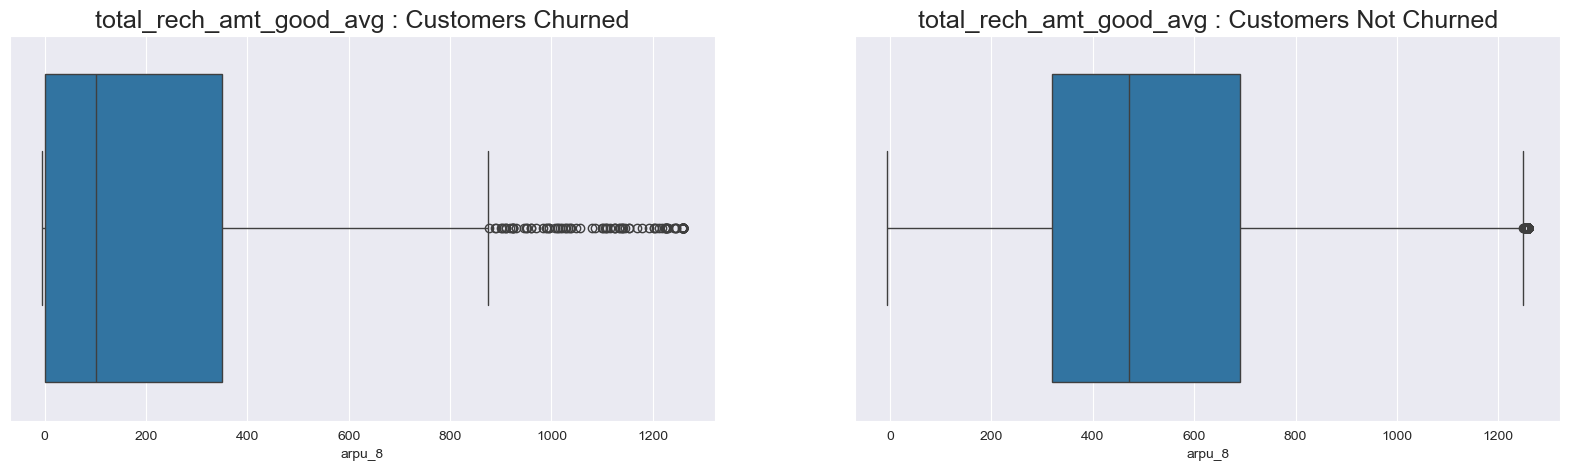

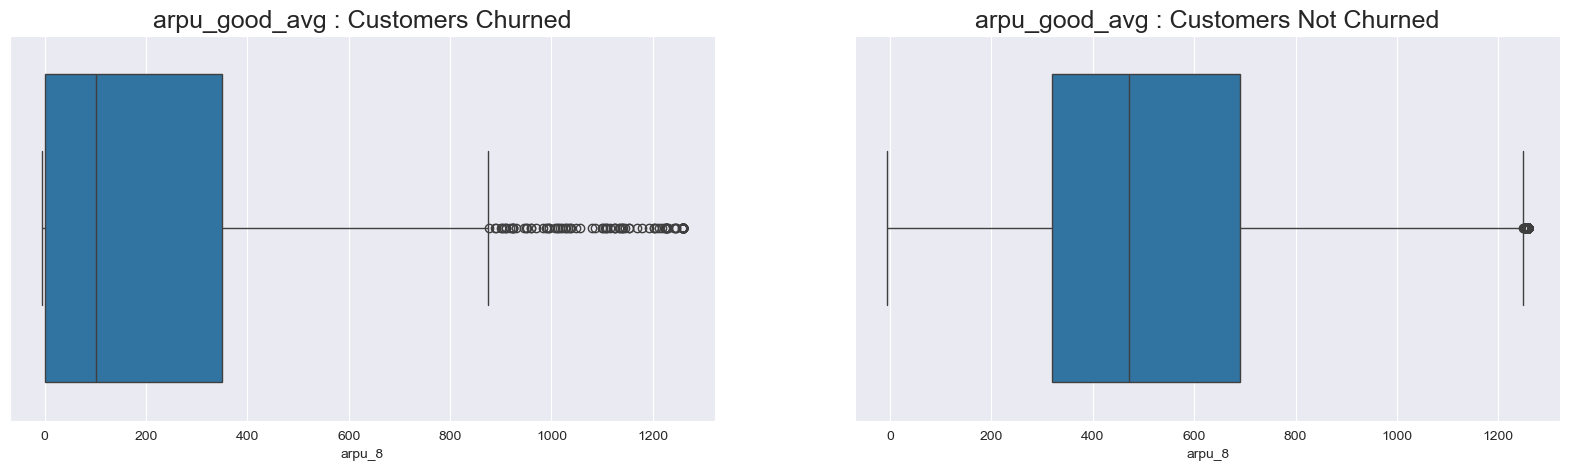

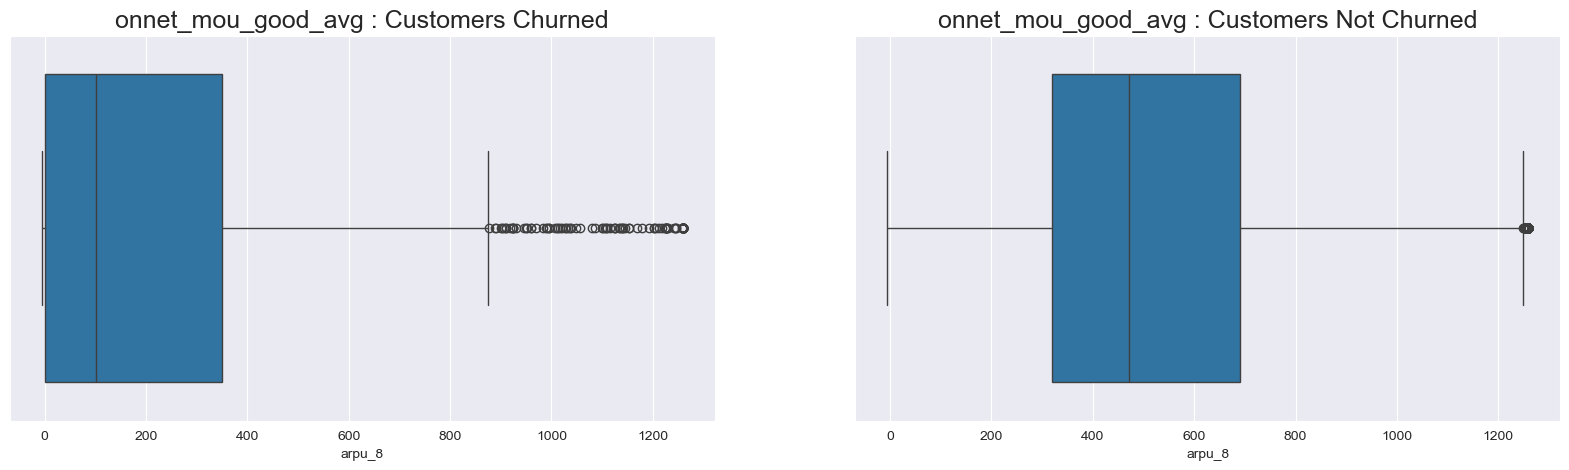

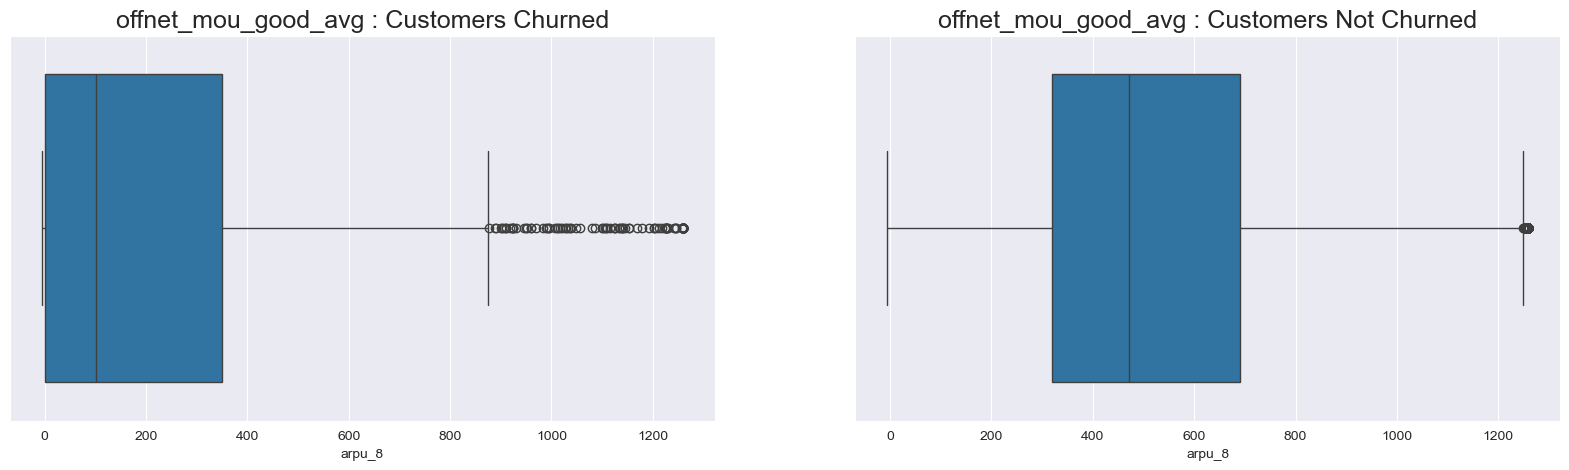

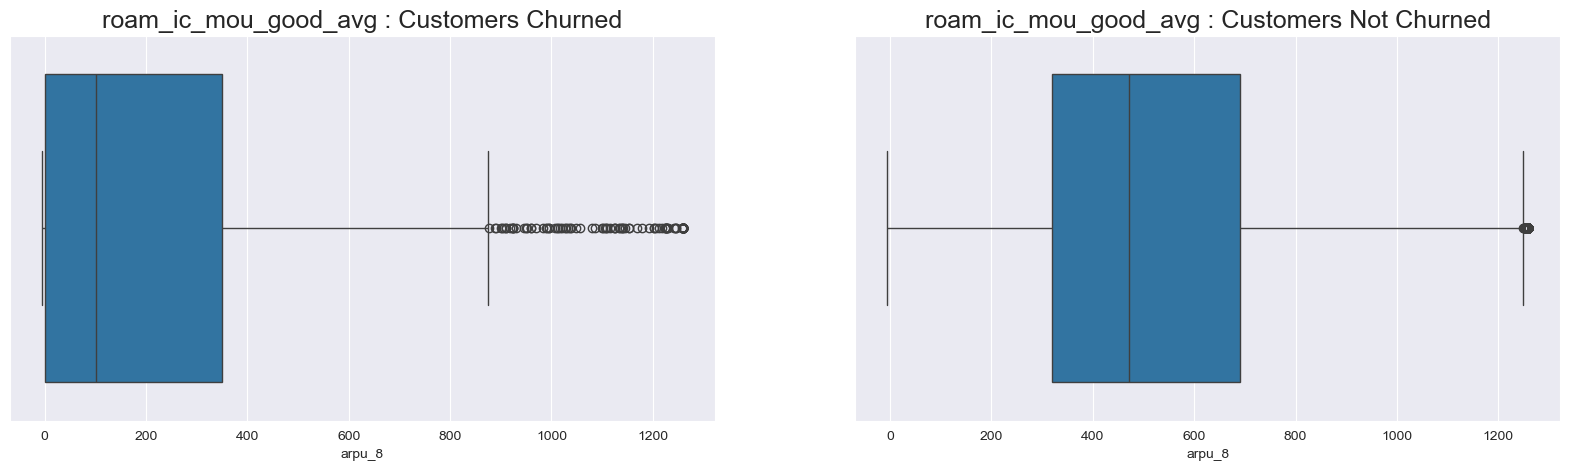

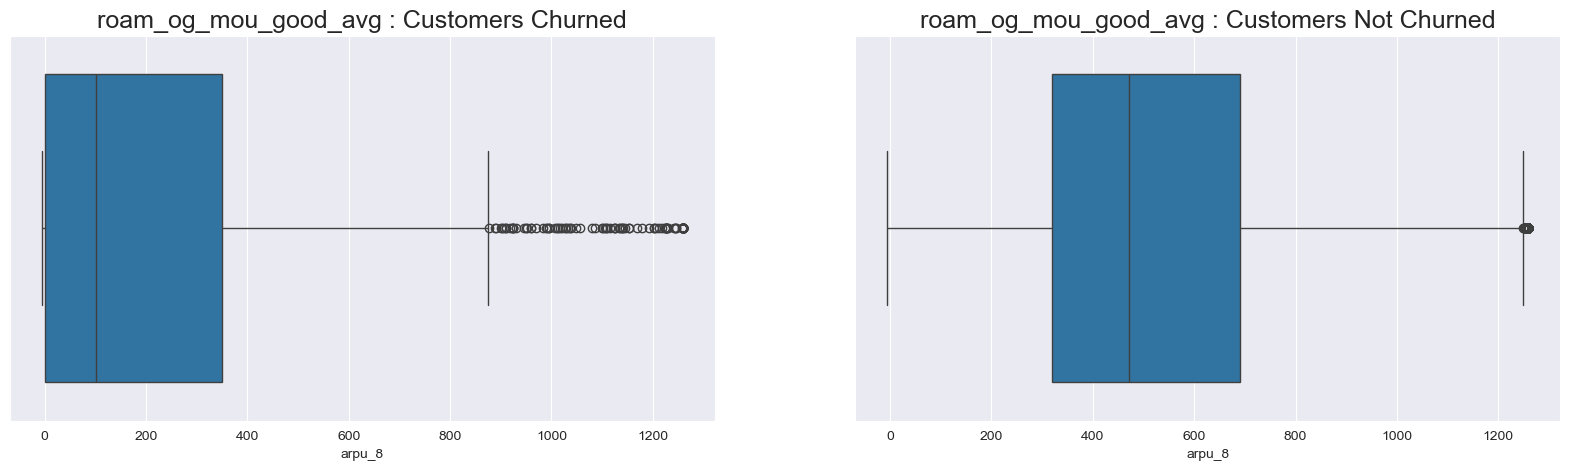

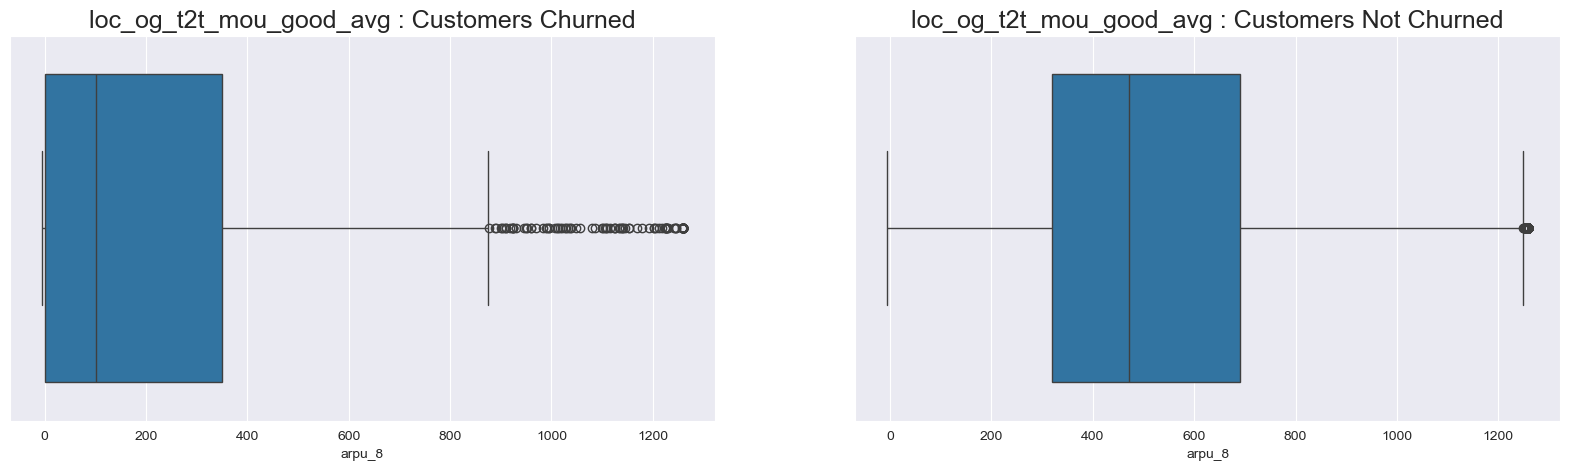

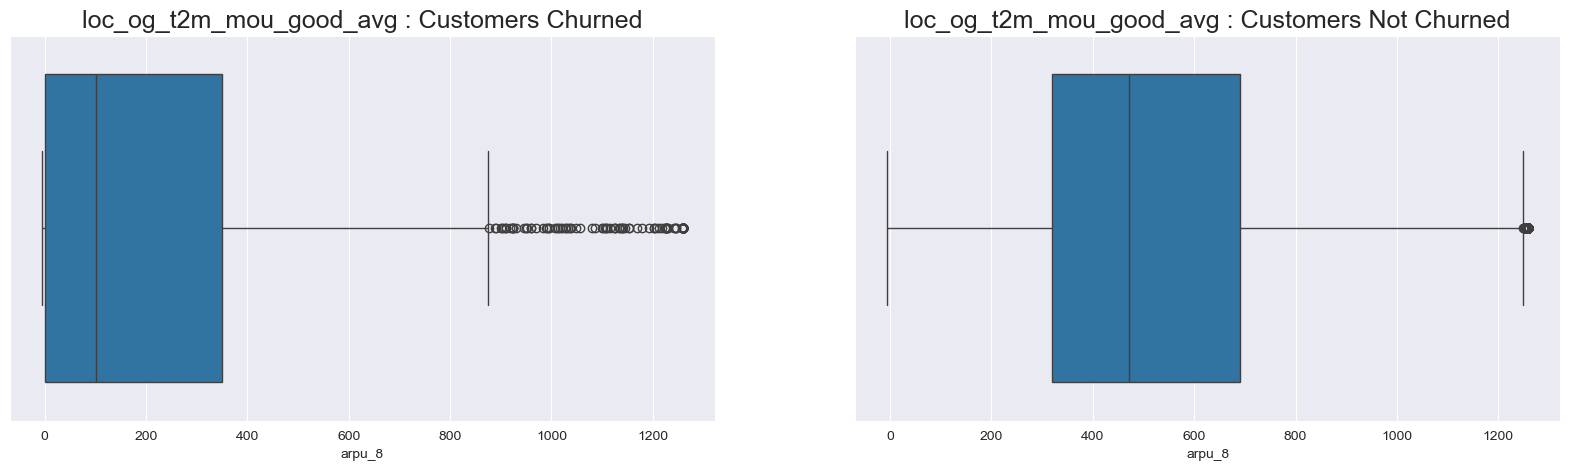

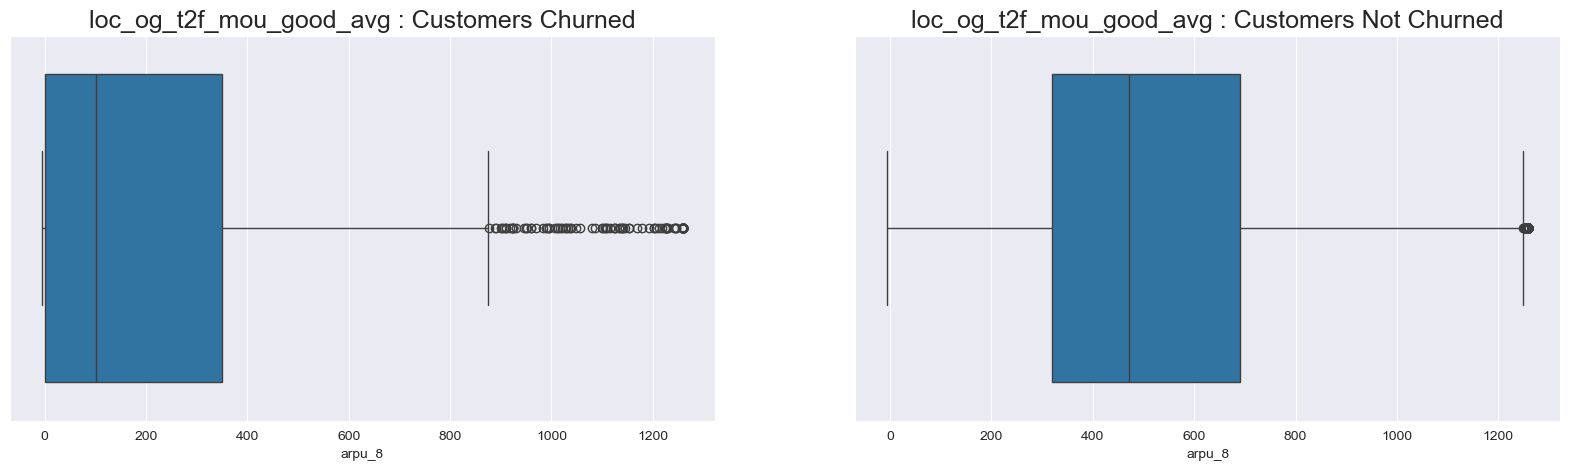

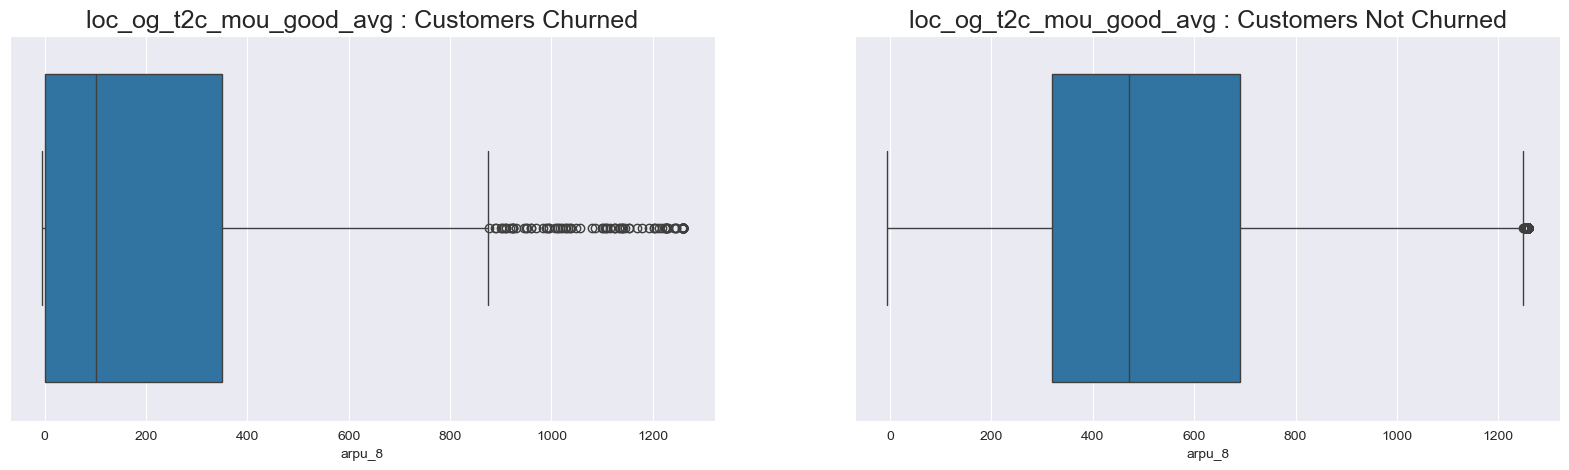

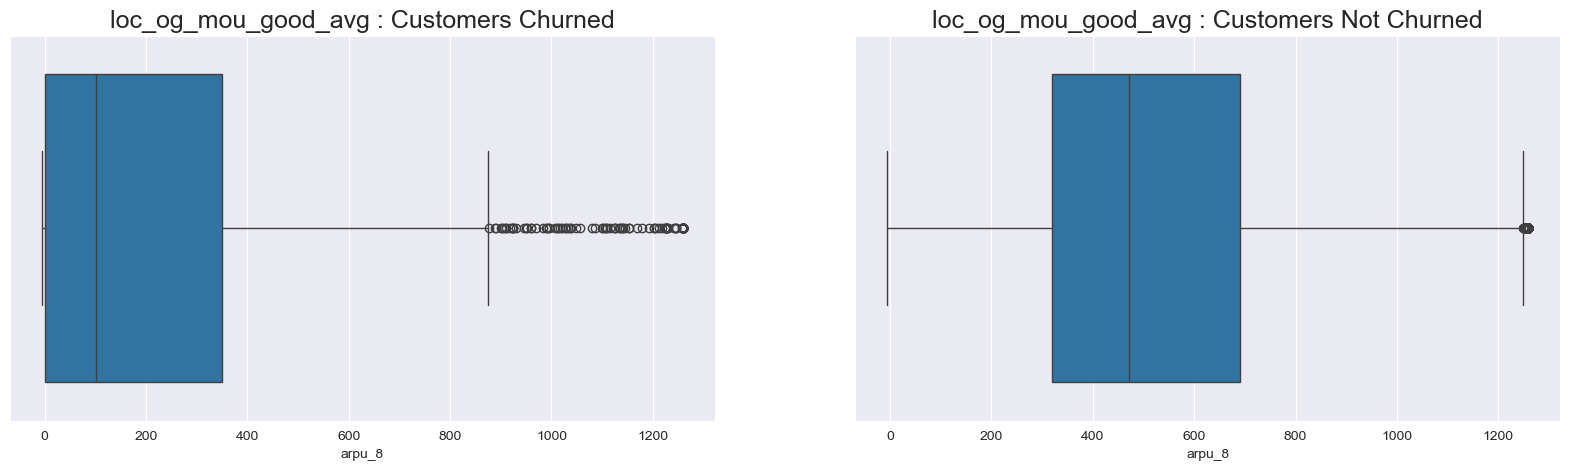

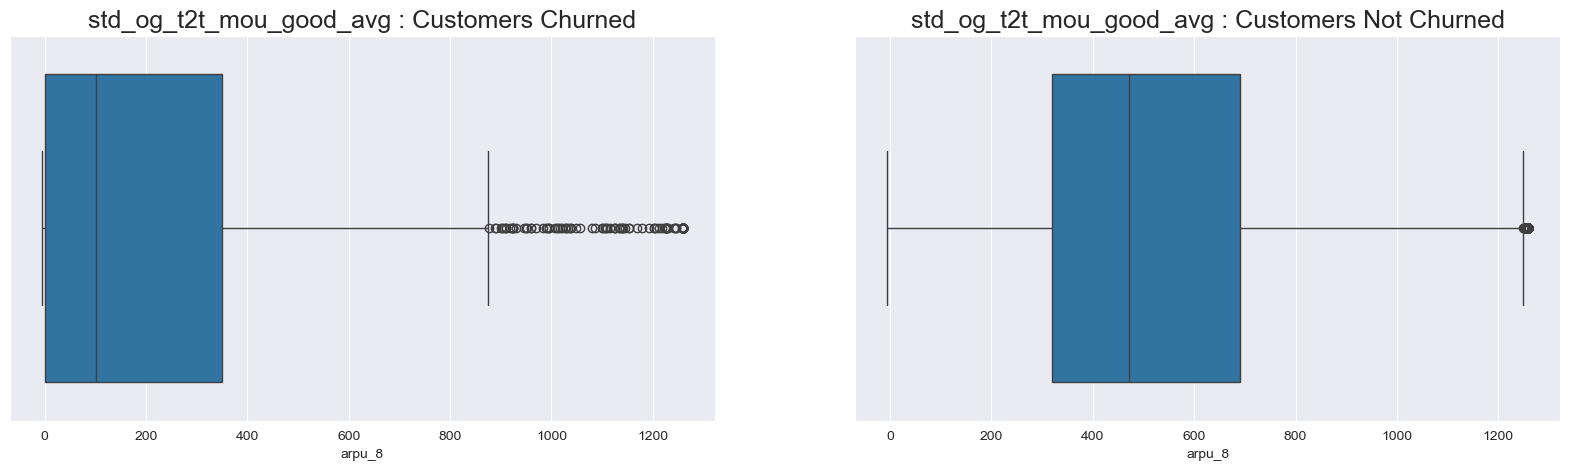

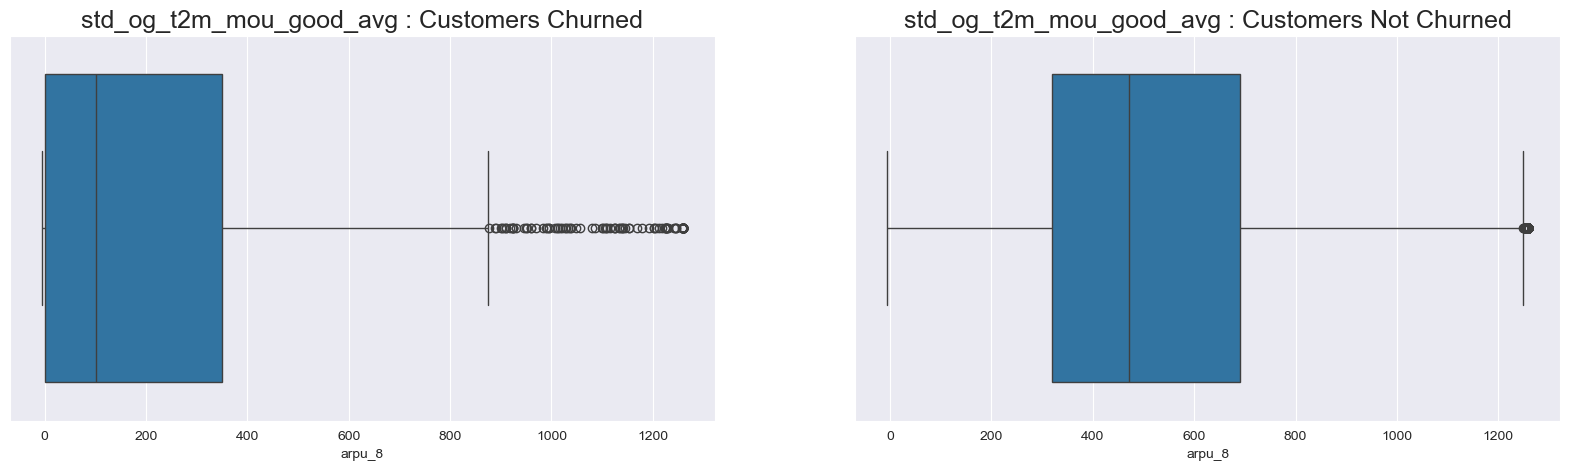

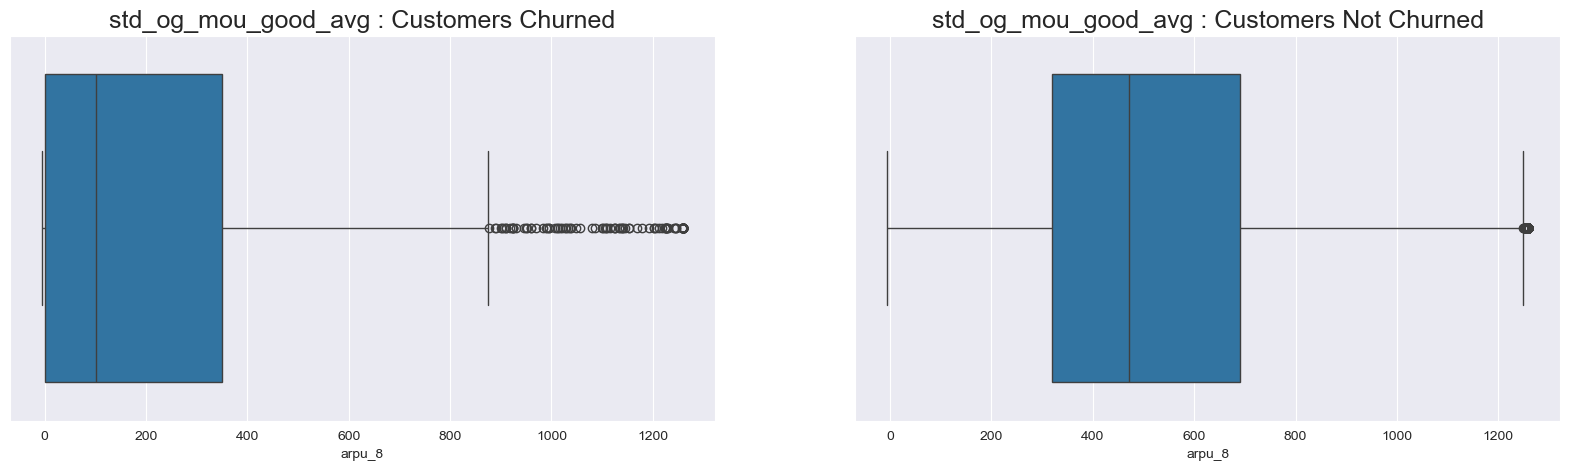

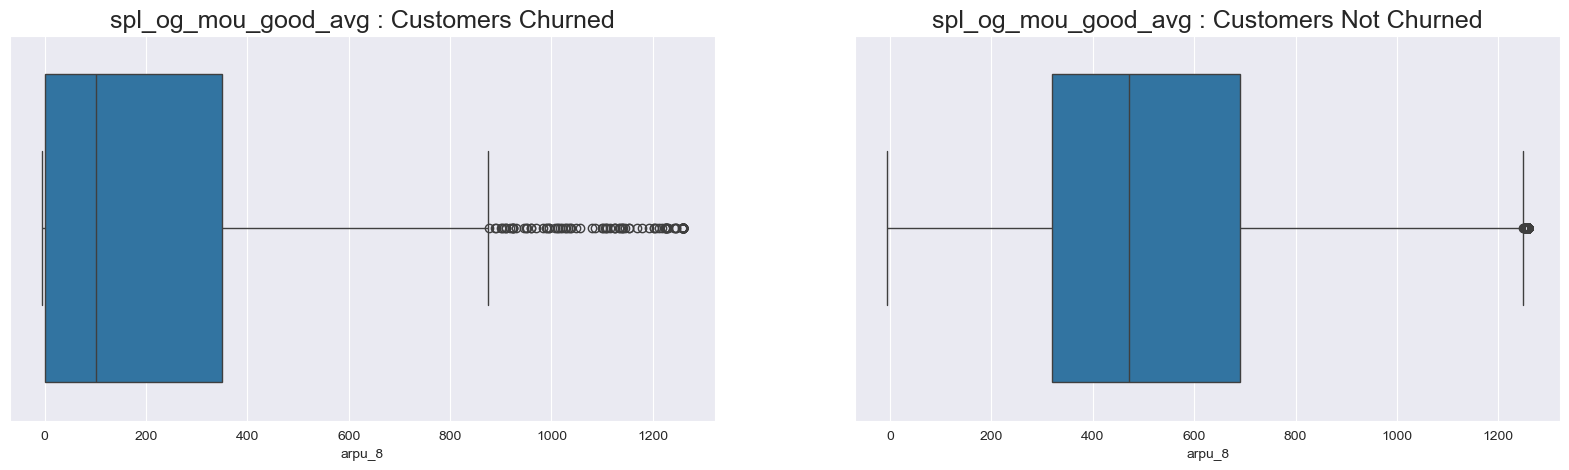

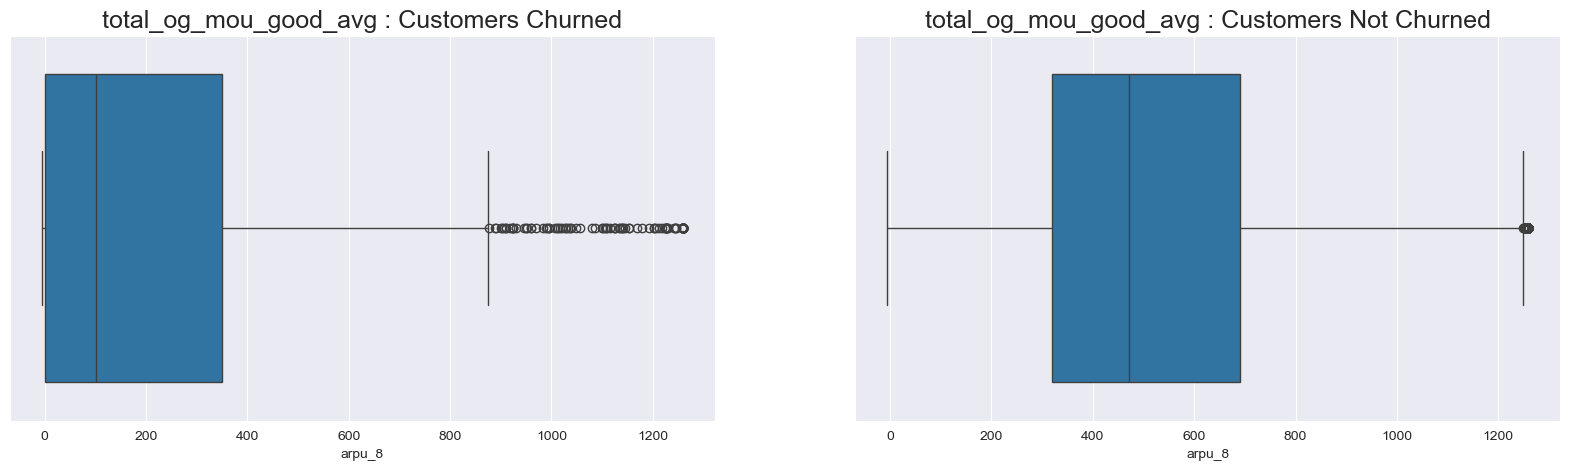

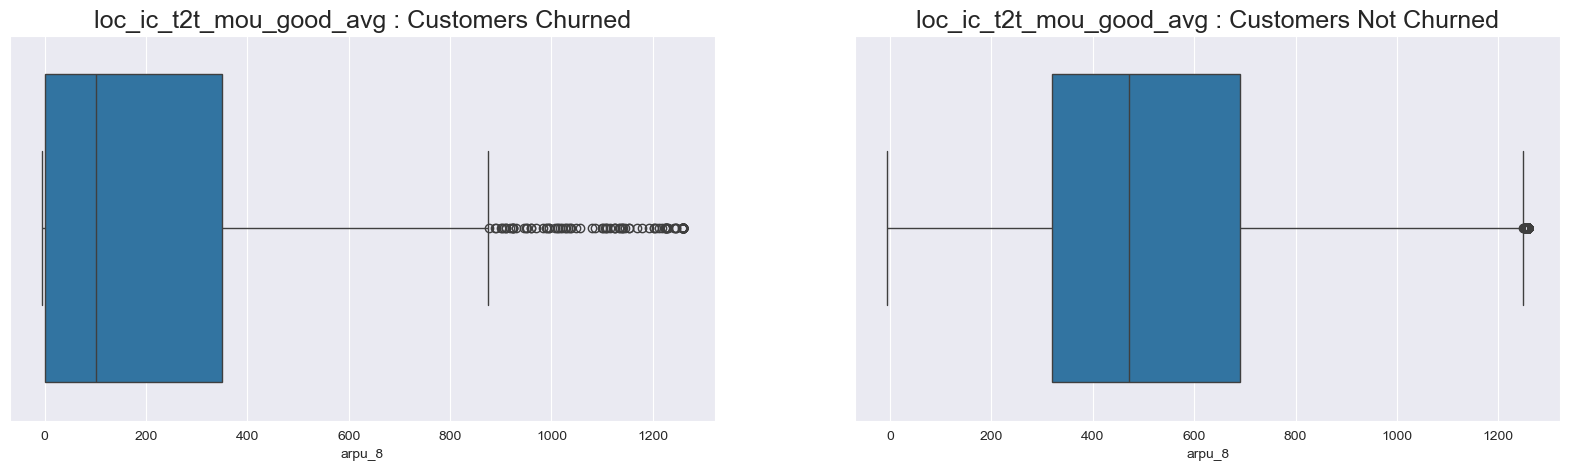

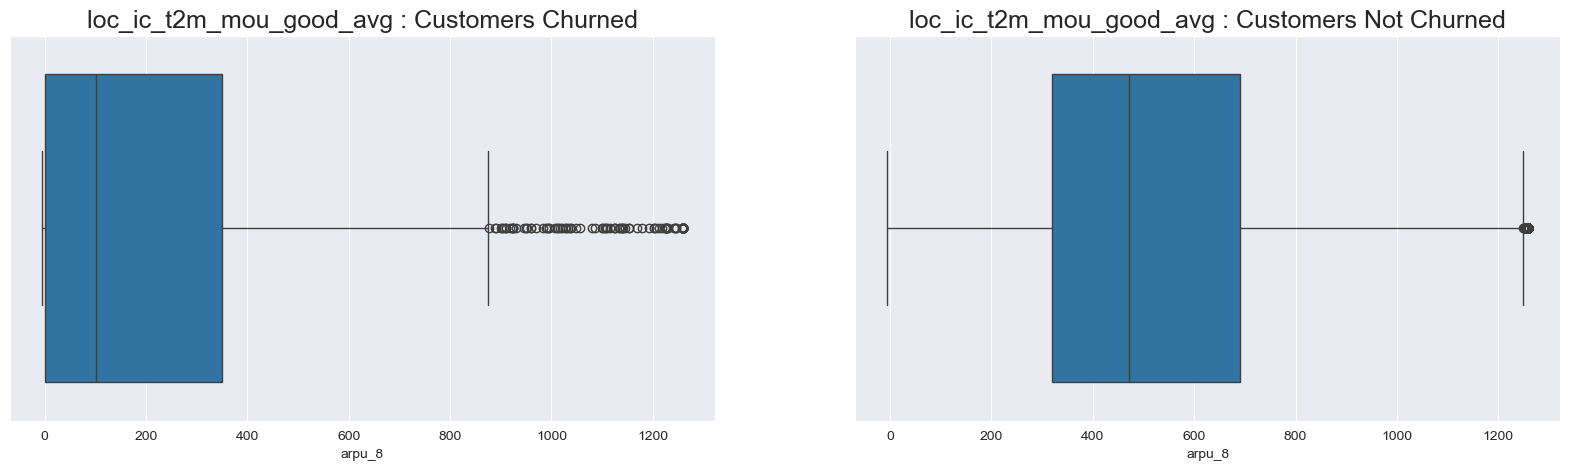

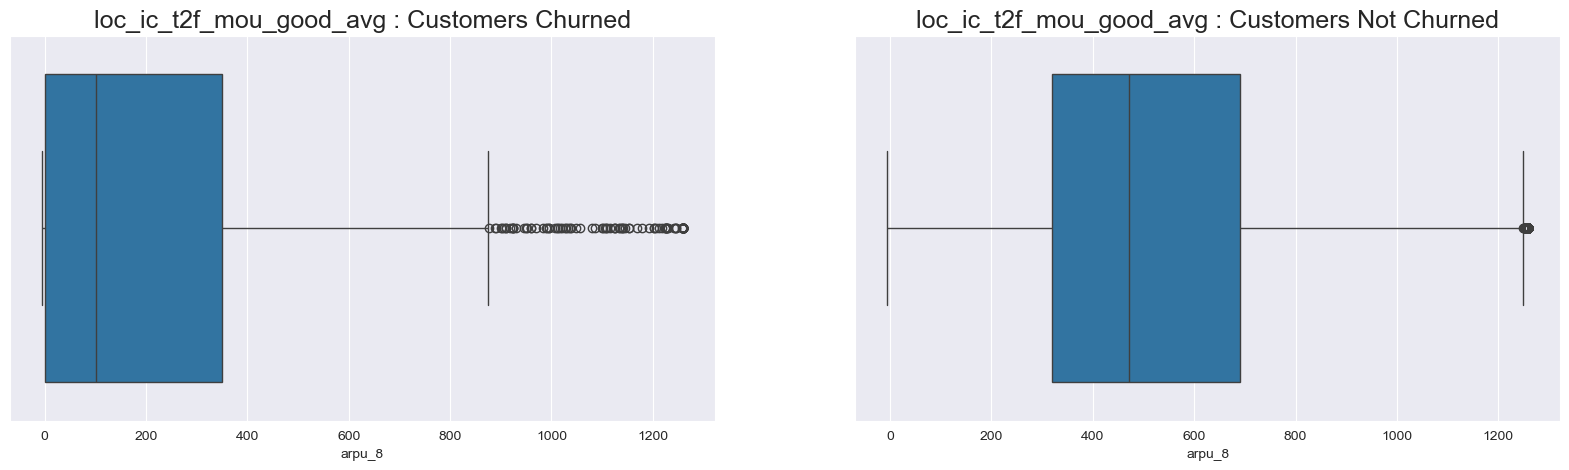

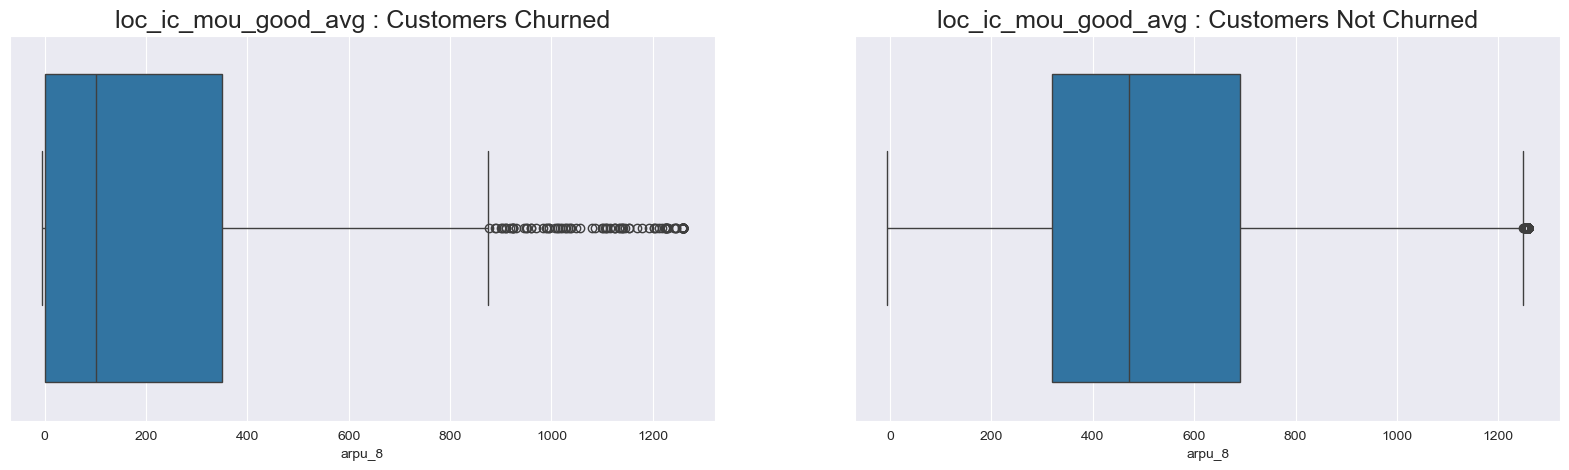

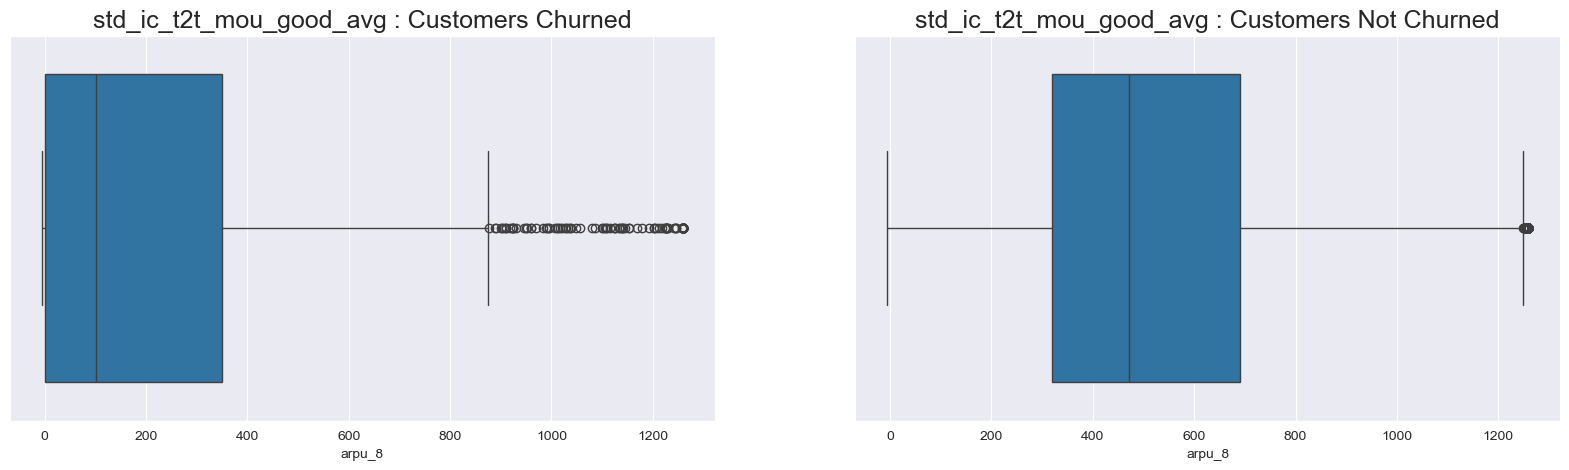

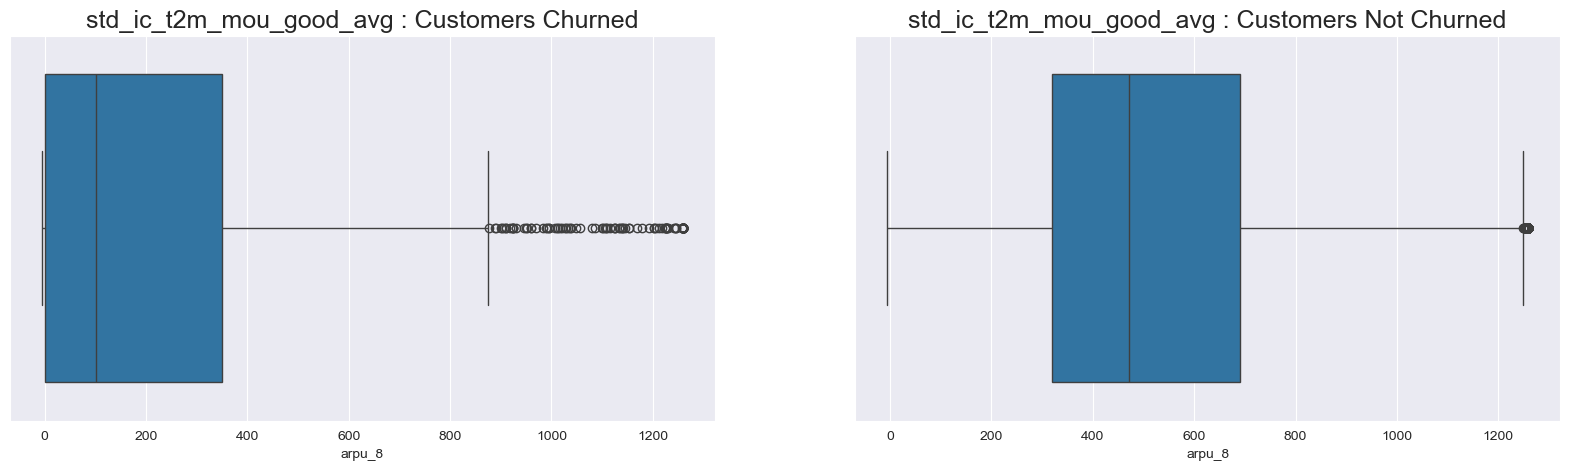

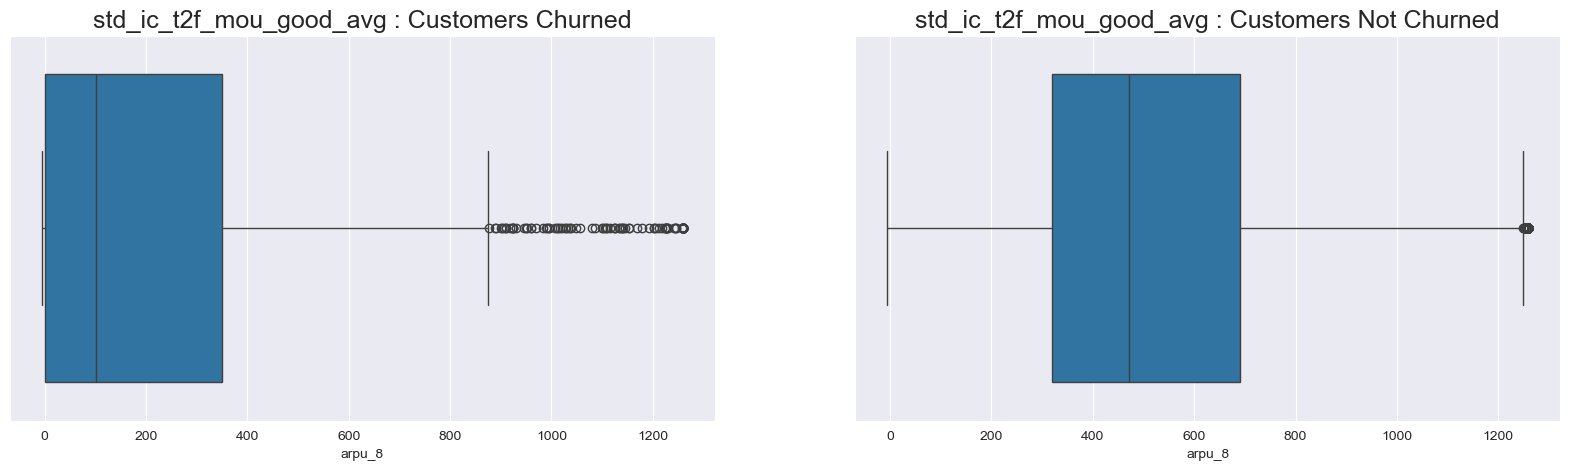

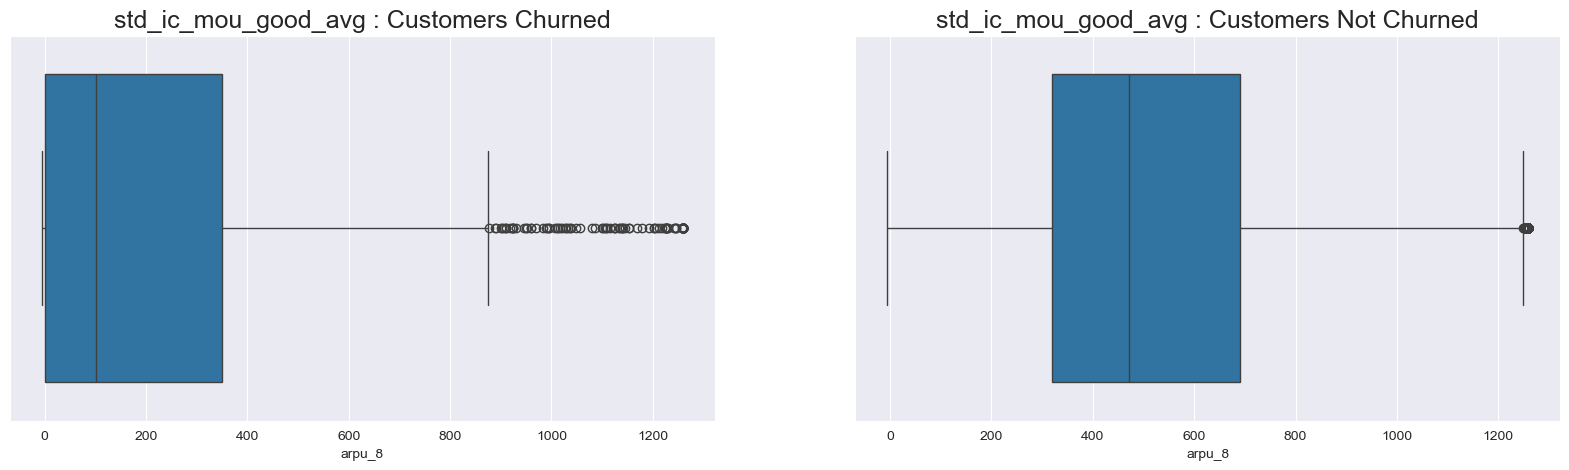

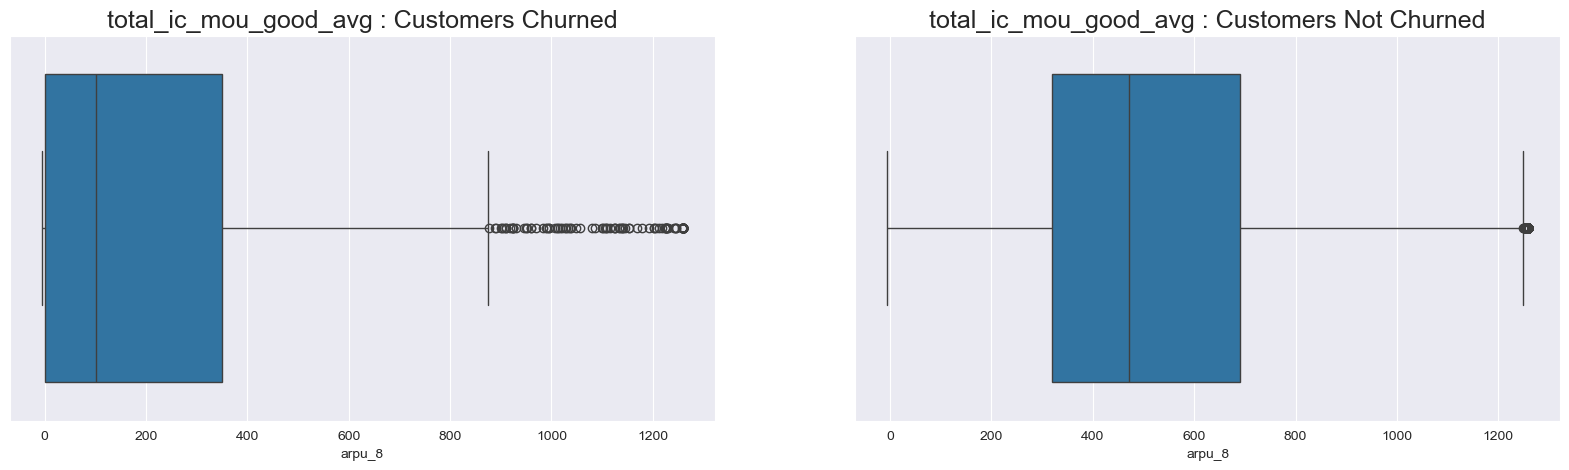

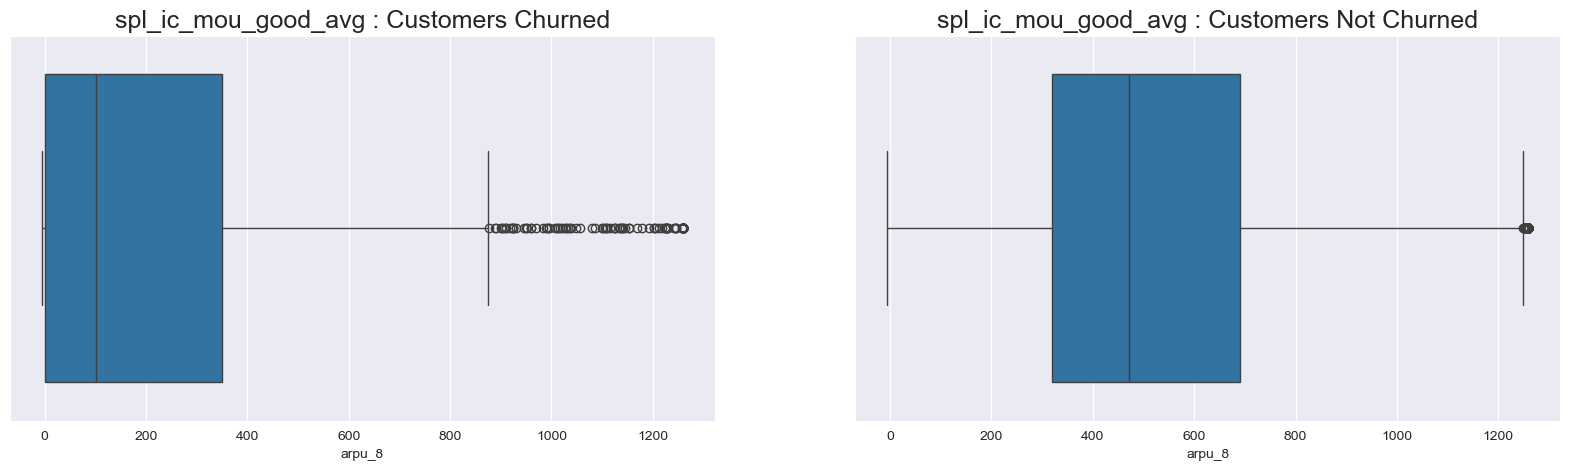

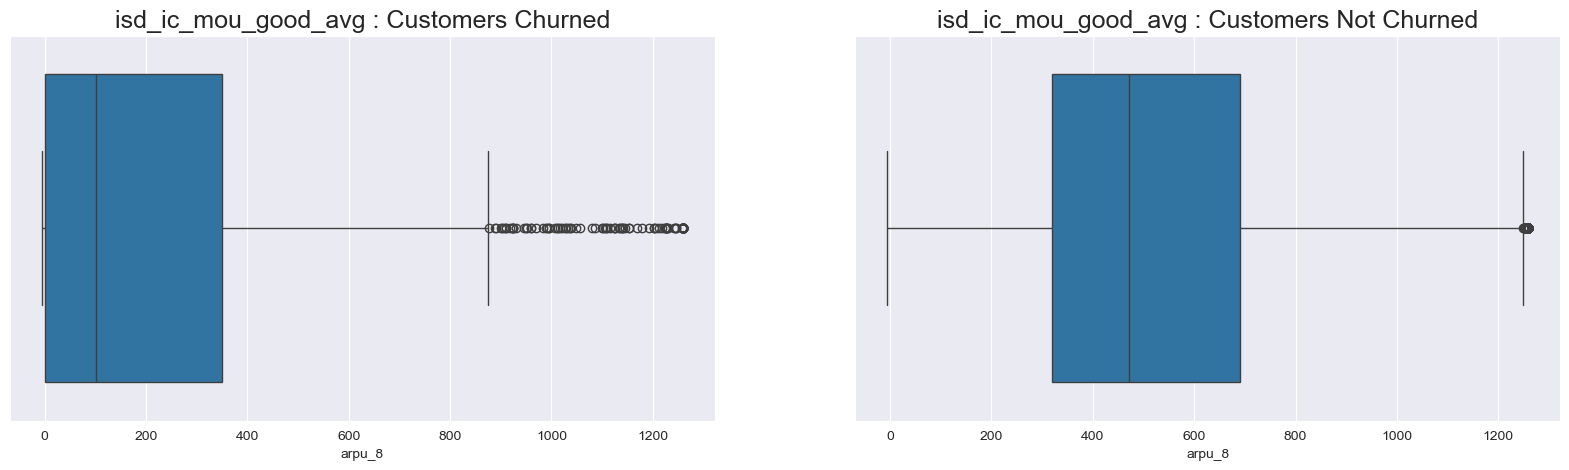

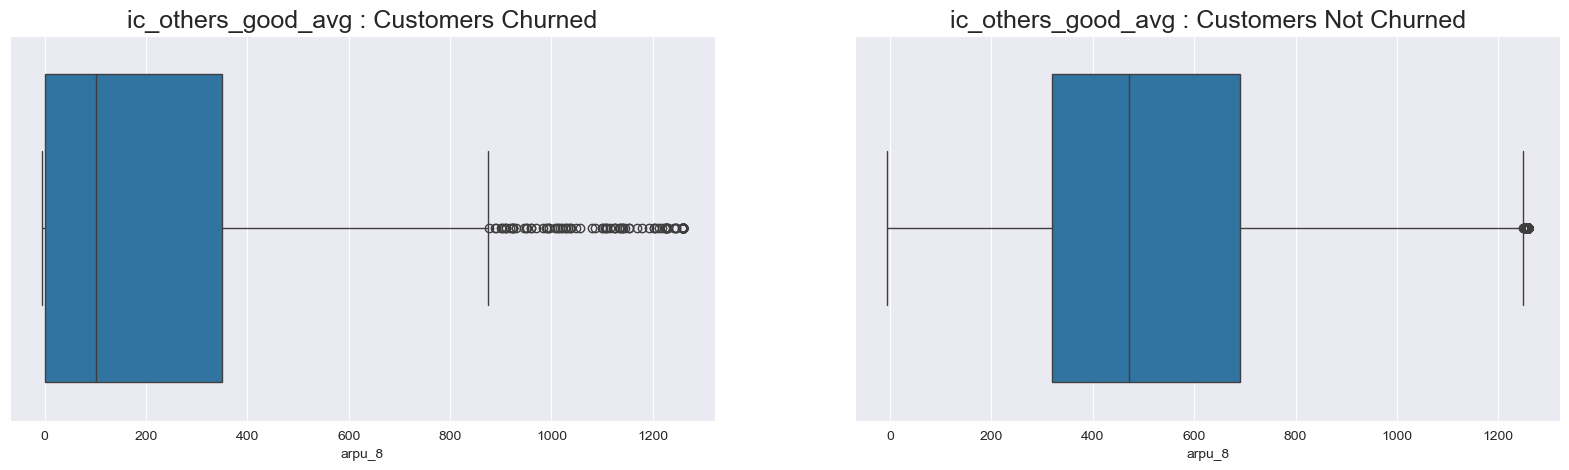

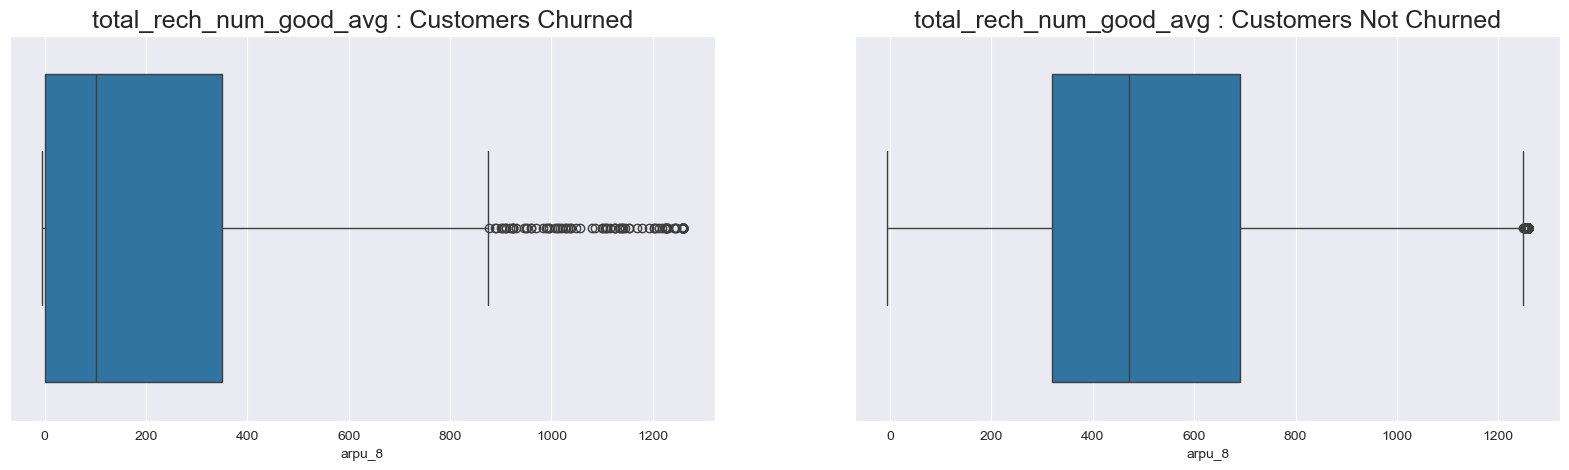

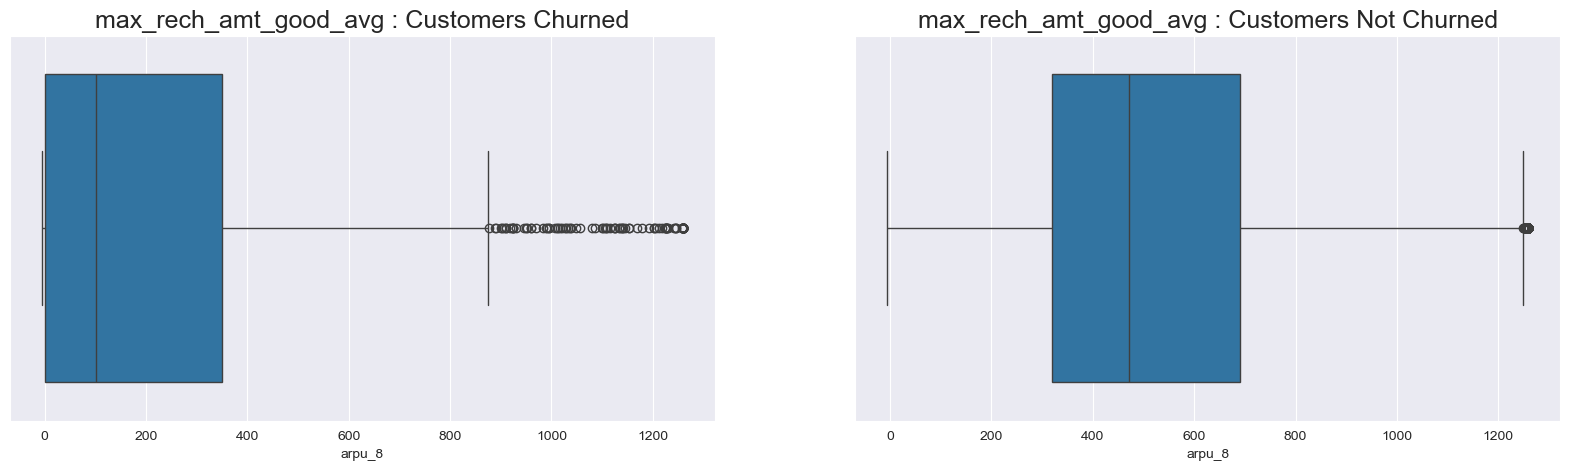

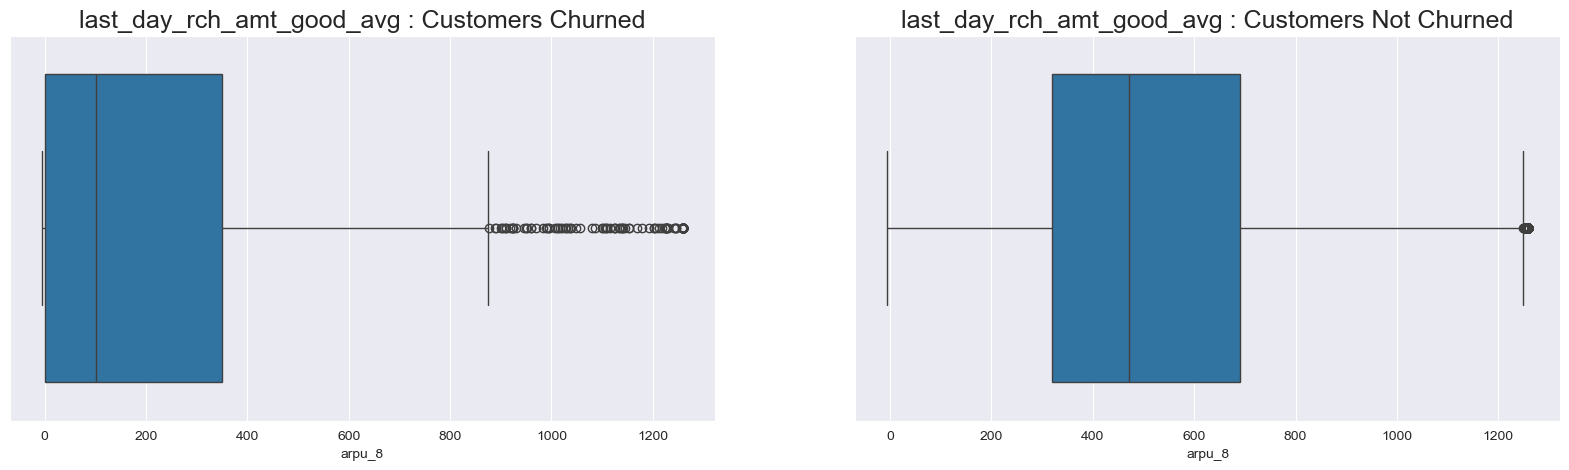

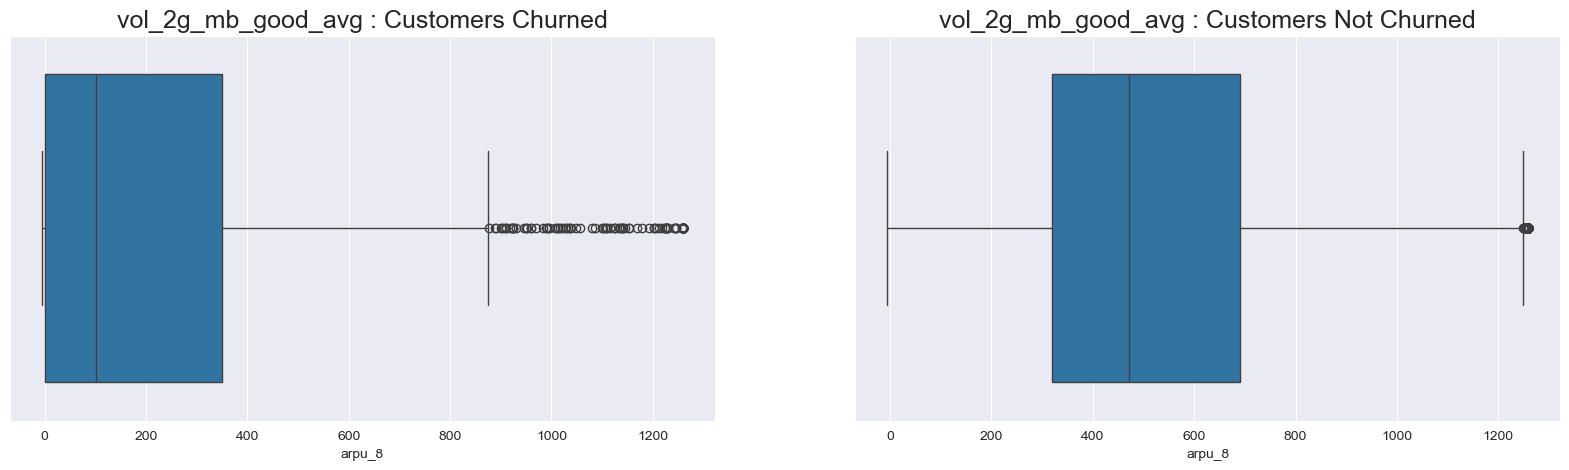

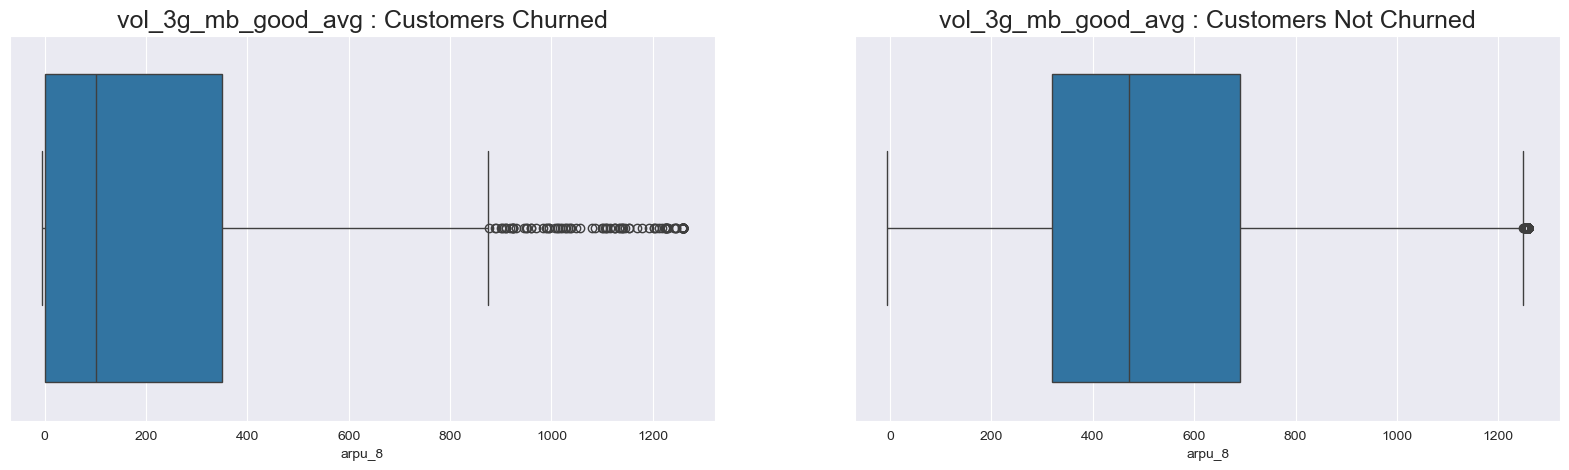

In [90]:
cols = final_df.columns

for col in cols:
    if col != "churn":
        plt.figure(figsize = (20,5))
        plt.subplot(1,2,1)
        plt.title(col + " : Customers Churned", fontsize=18)
        sns.boxplot(x = "arpu_8", data = final_df[final_df["churn"] == 1])
        plt.subplot(1,2,2)
        plt.title(col + " : Customers Not Churned", fontsize=18)
        sns.boxplot(x = "arpu_8", data = final_df[final_df["churn"] == 0])
        plt.show()

**Train-Test Split**

In [92]:
X = final_df.drop("churn", axis = 1)
y = final_df["churn"]

In [93]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 42) # splitting the data

**MinMax Scaler**

In [95]:
scaler = MinMaxScaler() # using MinMaxScaler() to scale all the features

cols = X_train.columns

X_train[cols] = scaler.fit_transform(X_train[cols])

X_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_8  \
337    0.216817     0.033594      0.057520          0.115627   
20790  0.327098     0.134969      0.365523          0.085548   
42083  0.358356     0.000359      0.000000          0.001234   
95072  0.490301     0.661680      0.033177          0.116429   
64915  0.410633     0.133849      0.222229          0.460689   

       loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
337            0.076078          0.620569          0.000000      0.114837   
20790          0.101887          0.000000          0.062165      0.098885   
42083          0.000000          0.000000          0.000000      0.000453   
95072          0.067395          0.000000          0.000000      0.087382   
64915          0.439510          0.016289          0.000000      0.460787   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_mou_8  spl_og_mou_8  \
337            0.000000          0.000000      0.002904      0.000000   
20790          0.131171          0.402048      0.315567      0.478002   
42083          0.000000          0.000000      0.000000      0.000000   
95072          0.747967          0.000000      0.461187      0.000000   
64915          0.000000          0.007264      0.004240      0.000000   

       total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
337          0.056215          0.050711          0.166236          0.153789   
20790        0.310706          0.154111          0.471341          0.000000   
42083        0.000212          0.420052          0.036116          0.021166   
95072        0.413029          0.087056          0.130720          0.741267   
64915        0.219591          0.994129          0.684879          1.000000   

       loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
337        0.140869          0.000000          0.000000          0.251366   
20790      0.364077          0.007472          0.032082          0.000000   
42083      0.153471          0.000000          0.000000          0.000000   
95072      0.179693          0.020793          0.056041          0.277778   
64915      0.878055          0.017057          0.005744          0.950820   

       std_ic_mou_8  total_ic_mou_8  ic_others_8  total_rech_num_8  \
337        0.014378        0.129954     0.000000          0.142857   
20790      0.022818        0.401140     0.264631          0.428571   
42083      0.000000        0.127094     0.000000          0.142857   
95072      0.058139        0.168948     0.000000          0.428571   
64915      0.063504        0.740837     0.000000          0.142857   

       total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  \
337            0.219545        0.435165            0.515873     0.001317   
20790          0.240964        0.285714            0.000000     0.000000   
42083          0.370817        0.553846            1.000000     0.034154   
95072          0.487282        0.318681            0.000000     0.034911   
64915          0.412316        0.360440            0.650794     1.000000   

            aon  total_rech_amt_good_avg  arpu_good_avg  onnet_mou_good_avg  \
337    0.414471                 0.110361       0.330971            0.047689   
20790  0.003001                 0.082410       0.257690            0.138814   
42083  0.914305                 0.033253       0.269089            0.011777   
95072  0.316105                 0.146988       0.313277            0.482966   
64915  0.757919                 0.339759       0.445244            0.103001   

       offnet_mou_good_avg  roam_ic_mou_good_avg  roam_og_mou_good_avg  \
337               0.212991                   0.0                   0.0   
20790             0.335529                   0.0                   0.0   
42083             0.000628                   0.0                   0.0   
95072             0.050223                   0.0                   0.0   
64915             0.213790                   0.0             

In [96]:
X_test[cols] = scaler.transform(X_test[cols])

# head to confirm
X_test.head()

arpu_8  onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_8  \
39713  0.815156     0.193509      0.145768          0.059665   
80955  0.004107     0.038713      0.003685          0.000000   
80034  1.000000     1.000000      0.578724          0.000000   
93911  0.487050     0.398266      0.316031          0.383501   
55461  0.501684     0.876979      0.369268          0.772154   

       loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
39713          0.144840          0.000000          0.829582      0.117849   
80955          0.000000          0.000000          0.000000      0.000000   
80034          0.178118          0.117534          0.000000      0.122151   
93911          0.503589          0.954328          0.565916      0.508157   
55461          0.082453          0.026828          0.000000      0.338964   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_mou_8  spl_og_mou_8  \
39713          0.209870          0.095459      0.185131      1.000000   
80955          0.000000          0.000000      0.000000      0.000000   
80034          1.000000          0.265058      1.000000      0.000000   
93911          0.341714          0.051649      0.240851      0.250083   
55461          0.777492          0.439632      0.736019      0.000000   

       total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
39713        0.221450          0.178627          0.241990          0.002368   
80955        0.000000          0.000000          0.000000          0.000000   
80034        1.000000          0.002839          0.050535          0.137359   
93911        0.436701          0.350029          0.373407          0.328005   
55461        0.752761          0.259274          0.199758          0.460184   

       loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
39713      0.217292          0.538661          0.000000          0.000000   
80955      0.000000          0.000000          0.000000          0.000000   
80034      0.046995          0.102827          0.171569          0.000000   
93911      0.386389          0.161468          0.052595          0.000000   
55461      0.253600          0.159682          0.112903          0.089253   

       std_ic_mou_8  total_ic_mou_8  ic_others_8  total_rech_num_8  \
39713      0.172749        0.215733     0.000000          1.000000   
80955      0.000000        0.000000     0.000000          0.107143   
80034      0.141908        0.109642     0.000000          0.500000   
93911      0.085228        0.340712     0.659033          0.142857   
55461      0.128051        0.236833     0.066158          0.428571   

       total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  \
39713          0.767738        0.109890            0.099206     0.148815   
80955          0.000000        0.000000            0.000000     0.000000   
80034          1.000000        0.659341            1.000000     0.000000   
93911          0.566934        1.000000            0.000000     0.000000   
55461          0.481928        0.285714            0.000000     0.000000   

            aon  total_rech_amt_good_avg  arpu_good_avg  onnet_mou_good_avg  \
39713  0.133378                 0.145060       0.319917            0.194578   
80955  0.112704                 1.000000       1.000000            1.000000   
80034  0.752918                 1.000000       1.000000            1.000000   
93911  0.062021                 0.369157       0.415299            0.232819   
55461  0.118039                 0.224578       0.394434            0.590066   

       offnet_mou_good_avg  roam_ic_mou_good_avg  roam_og_mou_good_avg  \
39713             0.102585              0.253222              0.057765   
80955             0.177089              0.043766              0.177334   
80034             0.641528              1.000000              1.000000   
93911             0.249525              0.930804              0.447100   
55461             0.154086              0.000000             

In [97]:
X_train.describe(percentiles=(0.25,0.5, 0.75,0.9,0.95)) # Verifying that the values fall within the 0 to 1 range, as MinMaxScaler was applied

arpu_8   onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_8  \
count  21007.000000  21007.000000  21007.000000      21007.000000   
mean       0.404088      0.207560      0.288458          0.200337   
std        0.251294      0.273113      0.271537          0.267046   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.234264      0.029005      0.078905          0.023323   
50%        0.360948      0.088100      0.201000          0.088047   
75%        0.533734      0.265211      0.405563          0.260624   
90%        0.778636      0.641100      0.720046          0.600694   
95%        1.000000      0.993851      1.000000          1.000000   
max        1.000000      1.000000      1.000000          1.000000   

       loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
count      21007.000000      21007.000000      21007.000000  21007.000000   
mean           0.258580          0.145771          0.109597      0.266904   
std            0.279999          0.268714          0.263586      0.279500   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.048457          0.000000          0.000000      0.054220   
50%            0.151403          0.005110          0.000000      0.166125   
75%            0.380875          0.148834          0.005359      0.393869   
90%            0.707890          0.541041          0.469882      0.708791   
95%            0.995530          0.992973          0.983708      0.998561   
max            1.000000          1.000000          1.000000      1.000000   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_mou_8  spl_og_mou_8  \
count      21007.000000      21007.000000  21007.000000  21007.000000   
mean           0.148121          0.165615      0.205829      0.165323   
std            0.276854          0.277161      0.292512      0.276389   
min            0.000000          0.000000      0.000000      0.000000   
25%            0.000000          0.000767      0.002443      0.000000   
50%            0.006204          0.026631      0.047425      0.016540   
75%            0.139698          0.186998      0.316262      0.206417   
90%            0.592825          0.604573      0.691721      0.592458   
95%            0.993229          1.000000      0.998729      0.998148   
max            1.000000          1.000000      1.000000      1.000000   

       total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
count    21007.000000      21007.000000      21007.000000      21007.000000   
mean         0.307445          0.222363          0.268862          0.155785   
std          0.274925          0.268304          0.271998          0.268140   
min          0.000000          0.000000          0.000000          0.000000   
25%          0.099303          0.036388          0.068273          0.000000   
50%          0.229470          0.114583          0.172526          0.026347   
75%          0.441402          0.298652          0.381158          0.167777   
90%          0.737475          0.627222          0.696895          0.543073   
95%          0.997397          0.994903          0.987255          1.000000   
max          1.000000          1.000000          1.000000          1.000000   

       loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
count  21007.000000      21007.000000      21007.000000      21007.000000   
mean       0.278927          0.142261          0.171660          0.098165   
std        0.271937          0.265879          0.268131          0.251387   
min        0.000000          0.000000          0.000000          0.000000   
25%        0.077244          0.000000          0.002462          0.000000   
50%        0.184723          0.008772          0.046441          0.000000   
75%        0.394560          0.142625          0.209723          0.009107   
90%        0.708462          0.516244          0.562609          0.345902   
95%        0.991228          0.996507 

In [98]:
for col in X_train.columns:
    print(col + " : " + str(np.isinf(X_train[col]).sum())) # Verifying if any column contains infinite values to prevent potential issues in further analysis

arpu_8 : 0
onnet_mou_8 : 0
offnet_mou_8 : 0
loc_og_t2t_mou_8 : 0
loc_og_t2m_mou_8 : 0
loc_og_t2f_mou_8 : 0
loc_og_t2c_mou_8 : 0
loc_og_mou_8 : 0
std_og_t2t_mou_8 : 0
std_og_t2m_mou_8 : 0
std_og_mou_8 : 0
spl_og_mou_8 : 0
total_og_mou_8 : 0
loc_ic_t2t_mou_8 : 0
loc_ic_t2m_mou_8 : 0
loc_ic_t2f_mou_8 : 0
loc_ic_mou_8 : 0
std_ic_t2t_mou_8 : 0
std_ic_t2m_mou_8 : 0
std_ic_t2f_mou_8 : 0
std_ic_mou_8 : 0
total_ic_mou_8 : 0
ic_others_8 : 0
total_rech_num_8 : 0
total_rech_amt_8 : 0
max_rech_amt_8 : 0
last_day_rch_amt_8 : 0
vol_2g_mb_8 : 0
aon : 0
total_rech_amt_good_avg : 0
arpu_good_avg : 0
onnet_mou_good_avg : 0
offnet_mou_good_avg : 0
roam_ic_mou_good_avg : 0
roam_og_mou_good_avg : 0
loc_og_t2t_mou_good_avg : 0
loc_og_t2m_mou_good_avg : 0
loc_og_t2f_mou_good_avg : 0
loc_og_t2c_mou_good_avg : 0
loc_og_mou_good_avg : 0
std_og_t2t_mou_good_avg : 0
std_og_t2m_mou_good_avg : 0
std_og_mou_good_avg : 0
spl_og_mou_good_avg : 0
total_og_mou_good_avg : 0
loc_ic_t2t_mou_good_avg : 0
loc_ic_t2m_mou_good_

**Develop model for further analysis**

Interpretable Model: Using Logistic Regression to make an interpretable model

Feature scaling using RFE: Getting top 15 columns from RFE to make the model

In [101]:
# Make a copy of X_train to keep it interpretable
X_train_interpretable = X_train.copy()

# Initialize the Logistic Regression model with class weights
logreg = LogisticRegression(class_weight='balanced')  # Since the target variable is imbalanced

# Initialize RFE with the model and specify n_features_to_select as a keyword argument
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE on the training data
rfe = rfe.fit(X_train_interpretable, y_train)

# Check which features are selected by RFE
rfe.support_

array([False,  True,  True, False,  True, False, False, False,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [102]:
list(zip(X_train_interpretable.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 30),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 5),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 33),
 ('loc_og_t2c_mou_8', False, 38),
 ('loc_og_mou_8', False, 29),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_mou_8', True, 1),
 ('spl_og_mou_8', False, 39),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 2),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 43),
 ('std_ic_t2m_mou_8', False, 37),
 ('std_ic_t2f_mou_8', False, 25),
 ('std_ic_mou_8', False, 41),
 ('total_ic_mou_8', True, 1),
 ('ic_others_8', False, 48),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 11),
 ('max_rech_amt_8', False, 10),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('aon', False, 9),
 ('total_rech_amt_good_avg', False, 19),
 ('arpu_good_avg', True, 1),
 ('onnet_mou_good_avg', False, 6),
 ('off

In [103]:
col = X_train_interpretable.columns[rfe.support_] # Get the top 15 features

**Model No.1**

In [105]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4053.8
Date:                Mon, 09 Dec 2024   Deviance:                       8107.6
Time:                        14:15:51   Pearson chi2:                 1.46e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1841
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8508      0.075    -11.356      0.000      -0.998      -0.704
onnet_mou_8            3.7973      0.512      7.410      0.000       2.793       4.802
offnet_mou_8           2.6710      0.420      6.364      0.000       1.848       3.494
loc_og_t2m_mou_8      -0.4016      0.535     -0.750      0.453      -1.451       0.647
std_og_t2t_mou_8      -4.8017      0.651     -7.373      0.000      -6.078      -3.525
std_og_t2m_mou_8      -3.4323      0.520     -6.598      0.000      -4.452      -2.413
std_og_mou_8           9.3652      1.143      8.192      0.000       7.125      11.606
total_og_mou_8       -10.0302      1.071     -9.367      0.000     -12.129      -7.932
loc_ic_t2t_mou_8      -1.4758      0.401     -3.677      0.000      -2.262      -0.689
loc_ic_t2m_mou_8      -3.0171      0.655     -4.603      0.000      -4.302      -1.733
loc_ic_mou_8           6.4903      0.922      7.036      0.000       4.682       8.298
total_ic_mou_8        -6.2786      0.599    -10.481      0.000      -7.453      -5.104
total_rech_num_8      -2.0458      0.178    -11.489      0.000      -2.395      -1.697
last_day_rch_amt_8    -2.6294      0.136    -19.328      0.000      -2.896      -2.363
vol_2g_mb_8           -2.0949      0.232     -9.027      0.000      -2.550      -1.640
arpu_good_avg          1.9933      0.146     13.682      0.000       1.708       2.279
======================================================================================
"""

Checking VIF values for each column

In [107]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5         std_og_mou_8  60.40
6       total_og_mou_8  58.30
9         loc_ic_mou_8  45.34
1         offnet_mou_8  34.00
3     std_og_t2t_mou_8  26.30
0          onnet_mou_8  23.50
4     std_og_t2m_mou_8  23.00
8     loc_ic_t2m_mou_8  22.87
10      total_ic_mou_8  12.83
2     loc_og_t2m_mou_8  12.78
7     loc_ic_t2t_mou_8   6.66
14       arpu_good_avg   4.68
11    total_rech_num_8   3.36
12  last_day_rch_amt_8   2.26
13         vol_2g_mb_8   1.21

Eliminating the feature `std_og_mou_8` due to its excessively high VIF value

In [109]:
col = col.drop('std_og_mou_8',1)
col

Index(['onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'arpu_good_avg'],
      dtype='object')

**Model No.2**

In [111]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm2 = sm.GLM(y_train, X_train_interpretable[col], family = sm.families.Binomial())
res = logm2.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4153.6
Date:                Mon, 09 Dec 2024   Deviance:                       8307.2
Time:                        14:15:51   Pearson chi2:                 2.00e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1763
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
onnet_mou_8            1.5891      0.447      3.551      0.000       0.712       2.466
offnet_mou_8           3.7828      0.397      9.518      0.000       3.004       4.562
loc_og_t2m_mou_8      -3.6267      0.412     -8.799      0.000      -4.435      -2.819
std_og_t2t_mou_8      -0.4487      0.348     -1.289      0.197      -1.131       0.234
std_og_t2m_mou_8      -2.0099      0.459     -4.377      0.000      -2.910      -1.110
total_og_mou_8        -2.8914      0.575     -5.031      0.000      -4.018      -1.765
loc_ic_t2t_mou_8      -1.9138      0.407     -4.703      0.000      -2.711      -1.116
loc_ic_t2m_mou_8      -3.2060      0.684     -4.687      0.000      -4.547      -1.865
loc_ic_mou_8           6.5645      0.934      7.031      0.000       4.735       8.394
total_ic_mou_8        -6.8684      0.578    -11.878      0.000      -8.002      -5.735
total_rech_num_8      -2.7200      0.178    -15.302      0.000      -3.068      -2.372
last_day_rch_amt_8    -2.8397      0.134    -21.116      0.000      -3.103      -2.576
vol_2g_mb_8           -2.1736      0.232     -9.369      0.000      -2.628      -1.719
arpu_good_avg          0.8497      0.102      8.300      0.000       0.649       1.050
======================================================================================
"""

Checking VIF values for each column

In [113]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8         loc_ic_mou_8  45.34
1         offnet_mou_8  32.25
5       total_og_mou_8  30.96
7     loc_ic_t2m_mou_8  22.85
0          onnet_mou_8  16.91
9       total_ic_mou_8  12.78
4     std_og_t2m_mou_8  12.58
2     loc_og_t2m_mou_8  11.40
3     std_og_t2t_mou_8   6.85
6     loc_ic_t2t_mou_8   6.66
13       arpu_good_avg   4.63
10    total_rech_num_8   3.36
11  last_day_rch_amt_8   2.26
12         vol_2g_mb_8   1.21

Removing loc_ic_mou_8 & offnet_mou_8 as this feature has a really high VIF value

In [115]:
col = col.drop(["offnet_mou_8", "loc_ic_mou_8"],1)
col

Index(['onnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'arpu_good_avg'],
      dtype='object')

**Model No.3**

In [117]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4152.9
Date:                Mon, 09 Dec 2024   Deviance:                       8305.7
Time:                        14:15:52   Pearson chi2:                 1.50e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1763
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8378      0.073    -11.415      0.000      -0.982      -0.694
onnet_mou_8            2.7666      0.445      6.210      0.000       1.893       3.640
loc_og_t2m_mou_8      -1.3949      0.367     -3.800      0.000      -2.114      -0.675
std_og_t2t_mou_8      -1.0464      0.318     -3.287      0.001      -1.670      -0.422
std_og_t2m_mou_8       1.5164      0.356      4.265      0.000       0.820       2.213
total_og_mou_8        -4.1633      0.629     -6.624      0.000      -5.395      -2.931
loc_ic_t2t_mou_8       0.3234      0.303      1.068      0.286      -0.270       0.917
loc_ic_t2m_mou_8       1.8530      0.467      3.970      0.000       0.938       2.768
total_ic_mou_8        -6.5349      0.580    -11.271      0.000      -7.671      -5.399
total_rech_num_8      -2.0828      0.173    -12.058      0.000      -2.421      -1.744
last_day_rch_amt_8    -2.5092      0.132    -19.056      0.000      -2.767      -2.251
vol_2g_mb_8           -2.0597      0.227     -9.091      0.000      -2.504      -1.616
arpu_good_avg          2.2894      0.141     16.208      0.000       2.013       2.566
======================================================================================
"""

Checking VIF values for each column

In [119]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4       total_og_mou_8  25.09
0          onnet_mou_8  15.56
7       total_ic_mou_8   9.78
6     loc_ic_t2m_mou_8   8.41
2     std_og_t2t_mou_8   6.72
1     loc_og_t2m_mou_8   6.47
3     std_og_t2m_mou_8   5.93
11       arpu_good_avg   4.43
5     loc_ic_t2t_mou_8   3.61
8     total_rech_num_8   3.35
9   last_day_rch_amt_8   2.25
10         vol_2g_mb_8   1.21

Removing total_og_mou_8 as it has a really high VIF value

In [121]:
col = col.drop("total_og_mou_8", 1)
col

Index(['onnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'arpu_good_avg'],
      dtype='object')

**Model No.4**

In [123]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20995
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4180.0
Date:                Mon, 09 Dec 2024   Deviance:                       8359.9
Time:                        14:15:52   Pearson chi2:                 1.41e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1742
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7528      0.072    -10.430      0.000      -0.894      -0.611
onnet_mou_8            0.4002      0.287      1.393      0.164      -0.163       0.963
loc_og_t2m_mou_8      -2.7908      0.294     -9.484      0.000      -3.367      -2.214
std_og_t2t_mou_8      -1.2676      0.281     -4.506      0.000      -1.819      -0.716
std_og_t2m_mou_8      -0.7212      0.143     -5.026      0.000      -1.002      -0.440
loc_ic_t2t_mou_8       0.3992      0.304      1.313      0.189      -0.197       0.995
loc_ic_t2m_mou_8       2.1666      0.468      4.630      0.000       1.249       3.084
total_ic_mou_8        -7.1101      0.587    -12.119      0.000      -8.260      -5.960
total_rech_num_8      -2.0969      0.172    -12.204      0.000      -2.434      -1.760
last_day_rch_amt_8    -2.5171      0.131    -19.213      0.000      -2.774      -2.260
vol_2g_mb_8           -2.0602      0.226     -9.121      0.000      -2.503      -1.617
arpu_good_avg          2.2466      0.140     16.066      0.000       1.973       2.521
======================================================================================
"""

Checking VIF values for each column

In [125]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6       total_ic_mou_8  9.77
0          onnet_mou_8  8.46
5     loc_ic_t2m_mou_8  8.40
2     std_og_t2t_mou_8  6.71
10       arpu_good_avg  4.42
1     loc_og_t2m_mou_8  3.73
4     loc_ic_t2t_mou_8  3.59
7     total_rech_num_8  3.33
8   last_day_rch_amt_8  2.25
3     std_og_t2m_mou_8  1.68
9          vol_2g_mb_8  1.21

Removing total_ic_mou_8 as it has a really high VIF value

In [127]:
col = col.drop("total_ic_mou_8", 1)
col

Index(['onnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'arpu_good_avg'],
      dtype='object')

**Model No. 5**

In [129]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20996
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4292.5
Date:                Mon, 09 Dec 2024   Deviance:                       8584.9
Time:                        14:15:52   Pearson chi2:                 4.75e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1653
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6633      0.071     -9.391      0.000      -0.802      -0.525
onnet_mou_8            0.5022      0.281      1.788      0.074      -0.048       1.053
loc_og_t2m_mou_8      -2.7933      0.289     -9.651      0.000      -3.361      -2.226
std_og_t2t_mou_8      -1.5347      0.277     -5.535      0.000      -2.078      -0.991
std_og_t2m_mou_8      -1.0467      0.145     -7.200      0.000      -1.332      -0.762
loc_ic_t2t_mou_8      -1.9177      0.235     -8.153      0.000      -2.379      -1.457
loc_ic_t2m_mou_8      -2.3188      0.292     -7.938      0.000      -2.891      -1.746
total_rech_num_8      -2.4073      0.173    -13.943      0.000      -2.746      -2.069
last_day_rch_amt_8    -2.7335      0.130    -21.096      0.000      -2.987      -2.480
vol_2g_mb_8           -2.2342      0.231     -9.671      0.000      -2.687      -1.781
arpu_good_avg          2.2570      0.136     16.565      0.000       1.990       2.524
======================================================================================
"""

Checking VIF values for each column

In [131]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0         onnet_mou_8  8.46
2    std_og_t2t_mou_8  6.71
9       arpu_good_avg  4.42
5    loc_ic_t2m_mou_8  4.10
1    loc_og_t2m_mou_8  3.71
6    total_rech_num_8  3.33
4    loc_ic_t2t_mou_8  2.65
7  last_day_rch_amt_8  2.23
3    std_og_t2m_mou_8  1.66
8         vol_2g_mb_8  1.21

As onnet_mou_8 still has a high VIF (Greater than 5), we'll drop this feature

In [133]:
col = col.drop("onnet_mou_8",1)
col

Index(['loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'arpu_good_avg'],
      dtype='object')

**Model No.6**

In [135]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit(class_weight = 'balanced')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20997
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4294.0
Date:                Mon, 09 Dec 2024   Deviance:                       8587.9
Time:                        14:15:53   Pearson chi2:                 4.68e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1652
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6659      0.071     -9.423      0.000      -0.804      -0.527
loc_og_t2m_mou_8      -2.7512      0.288     -9.545      0.000      -3.316      -2.186
std_og_t2t_mou_8      -1.1103      0.146     -7.622      0.000      -1.396      -0.825
std_og_t2m_mou_8      -1.0762      0.145     -7.444      0.000      -1.360      -0.793
loc_ic_t2t_mou_8      -1.7979      0.224     -8.016      0.000      -2.237      -1.358
loc_ic_t2m_mou_8      -2.3648      0.292     -8.109      0.000      -2.936      -1.793
total_rech_num_8      -2.3635      0.170    -13.865      0.000      -2.698      -2.029
last_day_rch_amt_8    -2.7149      0.129    -21.055      0.000      -2.968      -2.462
vol_2g_mb_8           -2.2385      0.231     -9.688      0.000      -2.691      -1.786
arpu_good_avg          2.2725      0.136     16.708      0.000       2.006       2.539
======================================================================================
"""

Checking VIF values for each column

In [137]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8       arpu_good_avg  4.36
4    loc_ic_t2m_mou_8  4.02
0    loc_og_t2m_mou_8  3.66
5    total_rech_num_8  3.31
6  last_day_rch_amt_8  2.23
3    loc_ic_t2t_mou_8  2.19
2    std_og_t2m_mou_8  1.64
1    std_og_t2t_mou_8  1.54
7         vol_2g_mb_8  1.20

As the p-values for all features are below 0.05 and the VIF values are under 5, the model has been created. The next step involves making predictions:

**Prediction**

In [140]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1) # Predicting the training set

In [141]:
y_train_pred_final = pd.DataFrame({'Churn' : y_train.values, 'Churn_Prob' : y_train_pred})

y_train_pred_final.head()

Churn  Churn_Prob
0      0    0.087187
1      0    0.034107
2      0    0.017568
3      0    0.074017
4      0    0.000180

In [142]:
y_train_pred_final['predicted'] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.5 else 0) # Using 0.5 as an example as the cut-off point

# Checking head for the predicted value
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.087187          0
1      0    0.034107          0
2      0    0.017568          0
3      0    0.074017          0
4      0    0.000180          0

Checking the overall accuracy of the cut-off being 0.5

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

1. The overall accuracy of the model, with a cut-off of 0.5, is 91%  
2. Next, we will evaluate the confusion matrix, sensitivity, and specificity at the 0.5 cut-off  
3. Finally, we will determine the optimal cut-off point for better performance

**Confusion Matrix, Sensitivity, Specificity**

In [147]:
confusion = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["predicted"])
print(confusion)

[[18951   236]
 [ 1516   304]]


In [148]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [149]:
print("Sensitivity : ")
print(TP / float(TP + FN))
print("-------- \nSpecificity")
print(TN / float(TN + FP))

Sensitivity : 
0.16703296703296702
-------- 
Specificity
0.9877000052118622


**Plot the ROC curve for further analysis**

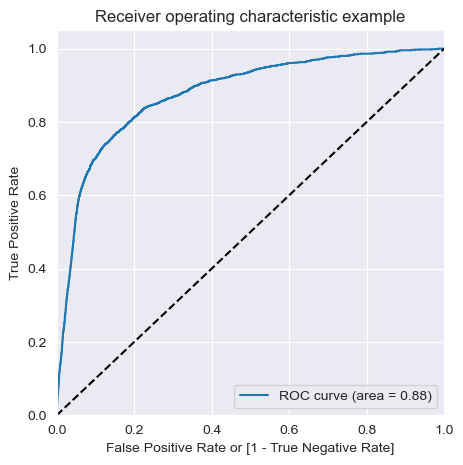

In [151]:
# function to draw ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Churn"], y_train_pred_final["Churn_Prob"], drop_intermediate = False)


draw_roc(y_train_pred_final["Churn"], y_train_pred_final["Churn_Prob"])

1. The area under the curve (AUC) is 0.89, indicating a strong model performance.  
2. The sensitivity is relatively low.  
3. To address this, we will determine the optimal cut-off point to enhance overall accuracy.

**Analysis for Optimal Cut-Off Point**

In [154]:
numbers = [float(i)/10 for i in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.087187          0    1    0    0    0    0    0    0    0    0   
1      0    0.034107          0    1    0    0    0    0    0    0    0    0   
2      0    0.017568          0    1    0    0    0    0    0    0    0    0   
3      0    0.074017          0    1    0    0    0    0    0    0    0    0   
4      0    0.000180          0    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

We will now calculate accuracy, sensitivity, and specificity for all the previously mentioned cut-off points

In [156]:
cutoff_df = pd.DataFrame(columns = ["prob", "accuracy", "sensitivity", "specificity"])

numbers = [float(i)/10 for i in range(10)]

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    specificity = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.086638     1.000000     0.000000
0.1   0.1  0.815538     0.794505     0.817533
0.2   0.2  0.889751     0.687363     0.908949
0.3   0.3  0.913315     0.577473     0.945171
0.4   0.4  0.916742     0.348352     0.970657
0.5   0.5  0.916599     0.167033     0.987700
0.6   0.6  0.915980     0.084615     0.994840
0.7   0.7  0.915124     0.039011     0.998228
0.8   0.8  0.913648     0.006044     0.999739
0.9   0.9  0.913362     0.000000     1.000000


We will now plot the accuracy, sensitivity, and specificity for the various cut-off points

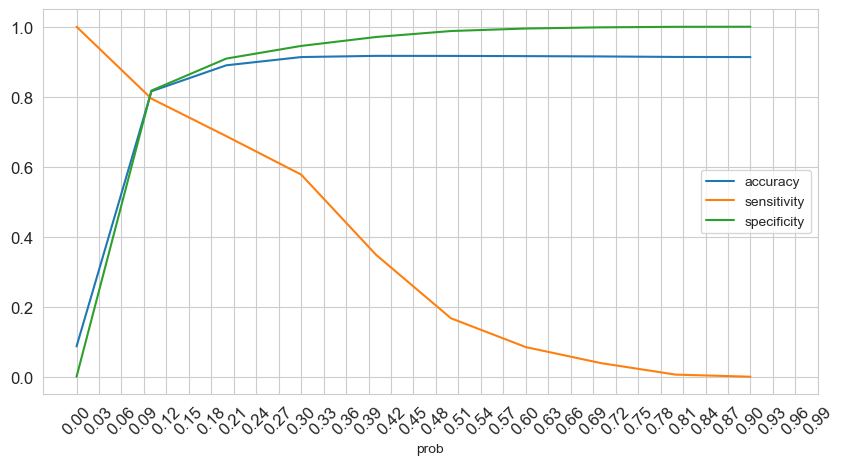

In [158]:
# We will now visualize the accuracy, sensitivity, and specificity for the different cut-off points mentioned earlier

sns.set_style("whitegrid") 

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'], figsize=(10,5))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.03), size = 12, rotation = 45)
plt.yticks(size = 12)
plt.show()

From above graph, it is evident that the optimal cut-off point seems to be 0.1

In [160]:
y_train_pred_final["FinalPredicted"] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.1 else 0)

We will now evaluate the accuracy, confusion matrix, sensitivity, and specificity for the final predictions using a cut-off point of 0.1

In [162]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.FinalPredicted))

0.8155376779168848


In [163]:
confusion = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["FinalPredicted"])
print(confusion)

[[15686  3501]
 [  374  1446]]


In [164]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [165]:
print("Sensitivity : ")
print(TP / float(TP + FN))
print("-------- \nSpecificity")
print(TN / float(TN + FP))

Sensitivity : 
0.7945054945054945
-------- 
Specificity
0.8175327044352947


As observed from the above results, although the accuracy has decreased, the sensitivity has significantly increased. In this scenario, a high sensitivity is crucial since the goal is to identify users who are likely to churn. With the optimal cut-off point of 0.1, the model will predict more churned customers, even potentially including some who may not churn, which is a beneficial trade-off.

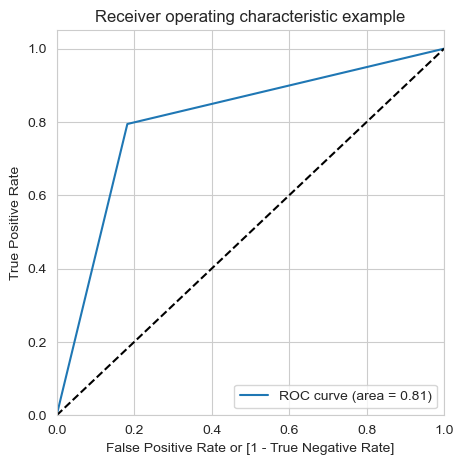

In [308]:
# function to draw ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Churn"], y_train_pred_final["FinalPredicted"], drop_intermediate = False)


draw_roc(y_train_pred_final["Churn"], y_train_pred_final["FinalPredicted"])

**Prediction on Test Dataset**

In [310]:
X_test_interpretable = X_test.copy()

X_test_interpretable = X_test_interpretable[col] # only the columns which we have from out training model
X_test_interpretable.head()

loc_og_t2m_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  loc_ic_t2t_mou_8  \
39713          0.144840          0.209870          0.095459          0.178627   
80955          0.000000          0.000000          0.000000          0.000000   
80034          0.178118          1.000000          0.265058          0.002839   
93911          0.503589          0.341714          0.051649          0.350029   
55461          0.082453          0.777492          0.439632          0.259274   

       loc_ic_t2m_mou_8  total_rech_num_8  last_day_rch_amt_8  vol_2g_mb_8  \
39713          0.241990          1.000000            0.099206     0.148815   
80955          0.000000          0.107143            0.000000     0.000000   
80034          0.050535          0.500000            1.000000     0.000000   
93911          0.373407          0.142857            0.000000     0.000000   
55461          0.199758          0.428571            0.000000     0.000000   

       arpu_good_avg  
39713       0.319917  
80955       1.000000  
80034       1.000000  
93911       0.415299  
55461       0.394434

In [312]:
X_test_sm = sm.add_constant(X_test_interpretable)

y_test_pred = res.predict(X_test_sm)


# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
39713  0.010640
80955  0.794684
80034  0.013384
93911  0.032529
55461  0.036117

In [314]:
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()

churn  Churn_Prob
0      0    0.010640
1      1    0.794684
2      0    0.013384
3      0    0.032529
4      0    0.036117

In [316]:
y_pred_final['FinalPredicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0) # as our cut-off point was 0.1, we'll use that to predict our test dataset as well
y_pred_final.head()

churn  Churn_Prob  FinalPredicted
0      0    0.010640               0
1      1    0.794684               1
2      0    0.013384               0
3      0    0.032529               0
4      0    0.036117               0

We will now evaluate the accuracy, confusion matrix, sensitivity, and specificity on the test dataset

In [318]:
# Now check the overall accuracy.
metrics.accuracy_score(y_pred_final["churn"], y_pred_final["FinalPredicted"])

0.8169702354509107

In [320]:
confusion2 = metrics.confusion_matrix(y_pred_final["churn"], y_pred_final["FinalPredicted"] )
confusion2

array([[6752, 1479],
       [ 169,  604]], dtype=int64)

In [322]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [177]:
print("Sensitivity : ")
print(TP / float(TP + FN))
print("-------- \nSpecificity")
print(TN / float(TN + FP))

Sensitivity : 
0.7945054945054945
-------- 
Specificity
0.8175327044352947


Comparing the metrics for the training and test datasets, we have:

1. **Accuracy**: 81.55% (training), 81.69% (testing)  
2. **Sensitivity**: 79.45% (training), 79.45% (testing)  
3. **Specificity**: 81.75% (training), 81.75% (testing)  

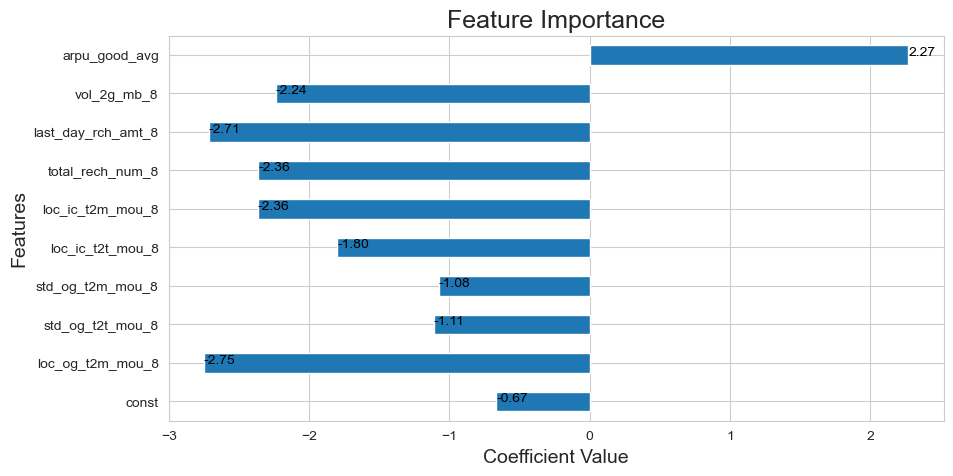

In [324]:
plt.figure(figsize = (10,5))
res.params.plot(kind = "barh")
plt.title("Feature Importance", fontsize = 18)
plt.ylabel("Features", fontsize = 14)
plt.xlabel("Coefficient Value", fontsize = 14)

for i, v in enumerate(res.params):
    plt.text(v,i,f"{v:.2f}", ha='left',
fontsize=10,
color = 'black')

plt.show()

From the coefficient graph above, it can be observerd that the top 3 features to decide if a customer will churn or not are below:

1. loc_og_t2m_mou_8=-2.75 
2. last_day_rch_amt_8 =-2.71
3. total_rech_num_8 and loc_ic_t2m_mou_8 = -2.36

**High Performance Models**

We will use Principal Component Analysis (PCA) from the Statsmodels library to reduce the data dimensions. Then, we will build three high-performance models in the following order:  

1. Logistic Regression  
2. Random Forest  
3. XGBoost  

We will evaluate these models based on their accuracy and confusion matrix and select the best-performing one.

**Principal Component Analysis (PCA)**

In [326]:
pca = PCA(random_state = 42)

In [328]:
pca.fit_transform(X_train)
pca.explained_variance_ratio_.cumsum()

array([0.18888392, 0.33279496, 0.40145108, 0.45696781, 0.51118871,
       0.55134718, 0.58559626, 0.61814733, 0.64635774, 0.67285368,
       0.69799811, 0.72183675, 0.74438003, 0.7637621 , 0.78156891,
       0.79893137, 0.81395787, 0.82846983, 0.84204838, 0.85494861,
       0.86715742, 0.87818367, 0.88745781, 0.89648839, 0.90480677,
       0.91290489, 0.92060021, 0.92761568, 0.93447656, 0.94059928,
       0.94643025, 0.95201522, 0.95654736, 0.96070234, 0.96471063,
       0.96840808, 0.9720326 , 0.97545311, 0.97839179, 0.98114883,
       0.98371525, 0.98596082, 0.98806526, 0.98969849, 0.99120387,
       0.99266576, 0.99377568, 0.99470834, 0.9955813 , 0.99629195,
       0.99681414, 0.99727723, 0.99772744, 0.99812071, 0.99848454,
       0.99884466, 0.99917381, 0.99943865, 0.99964369, 0.99978989,
       0.99991671, 1.        ])

From the cumulative sum of the explained variance shown above, it is evident that after 82%, the additional variance contribution is minimal. Therefore, by selecting the value of 0.82 and referring to the plot below, we will determine the optimal number of components.

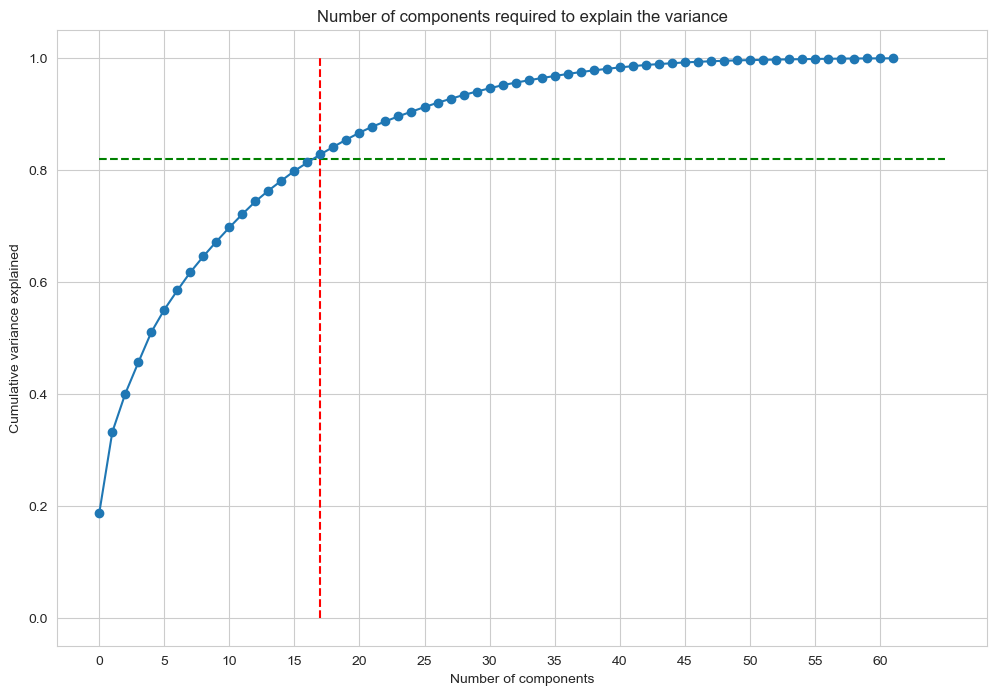

In [330]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)


fig = plt.figure(figsize=[12,8])
plt.vlines(x=17, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.82, xmax=65, xmin=0, colors="g", linestyles="--")
plt.xticks(np.arange(0,65,step=5))
plt.plot(var_cumu, marker = 'o')
plt.ylabel("Cumulative variance explained")
plt.xlabel("Number of components")
plt.title("Number of components required to explain the variance")
plt.show()

From above graph and analysis we can conclude that the optimal number of PCA is 17

In [332]:
pca_final = IncrementalPCA(n_components = 17)
# Incremental PCA doesn't build all the components. It only builds until n_components whereas PCA builds all and then take the top n_components. 
# Since we don't require all the PCA components, we're using Incremental PCA

X_train_PCA = pca_final.fit_transform(X_train)
X_train_PCA.shape

(21007, 17)

In [334]:
X_test_PCA = pca_final.transform(X_test)
X_test_PCA.shape

(9004, 17)

Developing a function to compute the accuracy and confusion matrix for both the training and test datasets, which can be invoked after making predictions with each high-performance model.

In [336]:
# Assessing the models on both the trained test set and the test dataset

def evaluate_model(classifier):
    print("Train Accuracy :", metrics.accuracy_score(y_train, classifier.predict(X_train_PCA)))
    print("Train Confusion Matrix:")
    print(metrics.confusion_matrix(y_train, classifier.predict(X_train_PCA)))
    print("-"*50)
    print("Test Accuracy :", metrics.accuracy_score(y_test, classifier.predict(X_test_PCA)))
    print("Test Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, classifier.predict(X_test_PCA)))

**Logistic Regression**

In [338]:
LogRegPCA = LogisticRegression(class_weight = "balanced")
Model_PCA = LogRegPCA.fit(X_train_PCA, y_train)

We will make predictions now

In [340]:
evaluate_model(Model_PCA)

Train Accuracy : 0.8195363450278479
Train Confusion Matrix:
[[15737  3450]
 [  341  1479]]
--------------------------------------------------
Test Accuracy : 0.8236339404709018
Test Confusion Matrix:
[[6793 1438]
 [ 150  623]]


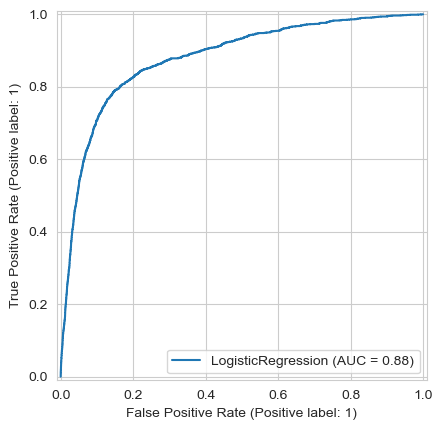

In [346]:
RocCurveDisplay.from_estimator(Model_PCA, X_train_PCA, y_train)
plt.show()

**Random Forest**

In [349]:
rf = RandomForestClassifier(random_state = 42, class_weight = "balanced", n_jobs = -1)

params = {
    "max_depth" : [5, 7, 10, 12, 14],
    "min_samples_leaf" : [5, 10, 15, 20, 50, 100, 500, 1000],
    "criterion" : ["gini","entropy"],
    "n_estimators" : [10,15,20,25,30,40,50,100],
    "max_features": ["auto", "sqrt", "log2"]
}


grid_search = model_selection.GridSearchCV(estimator = rf,
                          param_grid = params,
                          cv = 4,
                          n_jobs = -1,
                          verbose = 1,
                          scoring = "accuracy")

In [351]:
%%time

grid_search.fit(X_train_PCA, y_train)

Fitting 4 folds for each of 1920 candidates, totalling 7680 fits
CPU times: total: 37.2 s
Wall time: 30min 52s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 12, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 100, 500,
                                              1000],
                         'n_estimators': [10, 15, 20, 25, 30, 40, 50, 100]},
             scoring='accuracy', verbose=1)

In [353]:
grid_search.best_score_

0.914885477513223

In [355]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

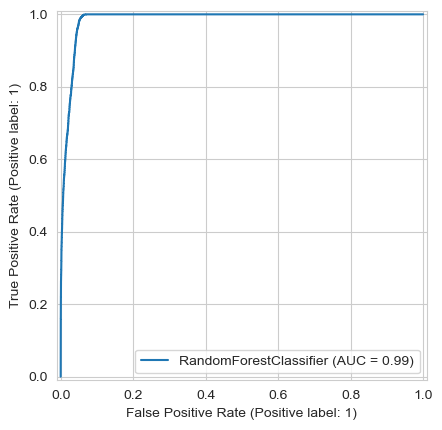

In [359]:
RocCurveDisplay.from_estimator(rf_best, X_train_PCA, y_train)
plt.show()

In [361]:
evaluate_model(rf_best)

Train Accuracy : 0.9553006140810206
Train Confusion Matrix:
[[18349   838]
 [  101  1719]]
--------------------------------------------------
Test Accuracy : 0.9114837849844514
Test Confusion Matrix:
[[7754  477]
 [ 320  453]]


**XGBoost**

In [366]:
xgb_model = xgb.XGBClassifier(class_weight = "balanced")

parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_depth': [2, 4, 6, 8, 10],
              'min_child_weight': [3, 7, 11, 19, 25],
              'n_estimators': [50, 100, 150, 200, 300, 500]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator = xgb_model, 
                                       param_grid = parameters, 
                                       n_jobs=-1, cv=4, 
                                       scoring = scorer, 
                                       verbose = 1, 
                                       refit=True)

In [368]:
%%time
clf_xgb.fit(X_train_PCA, y_train)

Fitting 4 folds for each of 750 candidates, totalling 3000 fits
CPU times: total: 18.4 s
Wall time: 11min 5s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, class_weight='balanced',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_child_weight': [3, 7, 11, 19, 25],
                         'n_estimators': [50, 100, 150, 200, 300, 500]},
             scoring=make_scorer(roc_auc_score, response_method='predict_proba'),
             verbose=1)

In [370]:
clf_xgb.best_score_

0.8839193115399288

In [372]:
xg_best = clf_xgb.best_estimator_
xg_best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=25, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

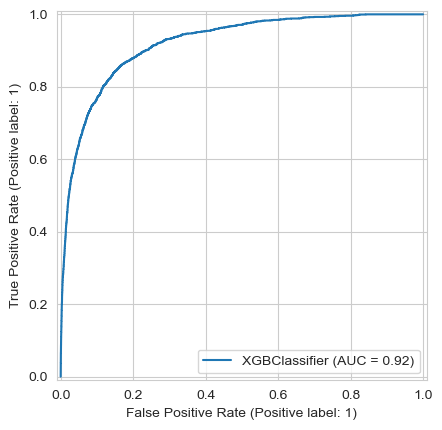

In [374]:
RocCurveDisplay.from_estimator(xg_best, X_train_PCA, y_train)
plt.show()

In [376]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xg_best.predict_proba(X_train_PCA)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xg_best.predict_proba(X_test_PCA)[:, 1]))

AUC on train data by XGBoost = 0.9207397608385256
AUC on test data by XGBoost = 0.8806284511446096


**Conclusion and Final Remarks**

1. **Interpretable Model Creation**:  
   - An interpretable model was built to identify the key factors influencing a customer's decision to churn.  

2. **High-Performance Models**:  
   - Three high-performance models were developed using:  
     - Logistic Regression  
     - Random Forest  
     - XGBoost  
   - All three models demonstrated high accuracy on both training and test datasets.  

3. **Best Performing Model**:  
   - The **Random Forest** model performed the best for the given data and is recommended for predicting potential future customer churn.  
     - **Accuracy on Training Set**: 95%  
     - **Accuracy on Test Dataset**: 91%  
   - This model not only achieved high accuracy but was also computationally less expensive compared to others.  

4. **Key Features Identified (From Interpretable Model)**:  
   - The top three most significant features influencing churn were:  
     - `loc_og_t2m_mou_8`: -2.75
     - `last_day_rch_amt_8`: -2.71 
     - `total_rech_num_8 and loc_ic_t2m_mou_8`: -2.36

**Feature Importance Graph**

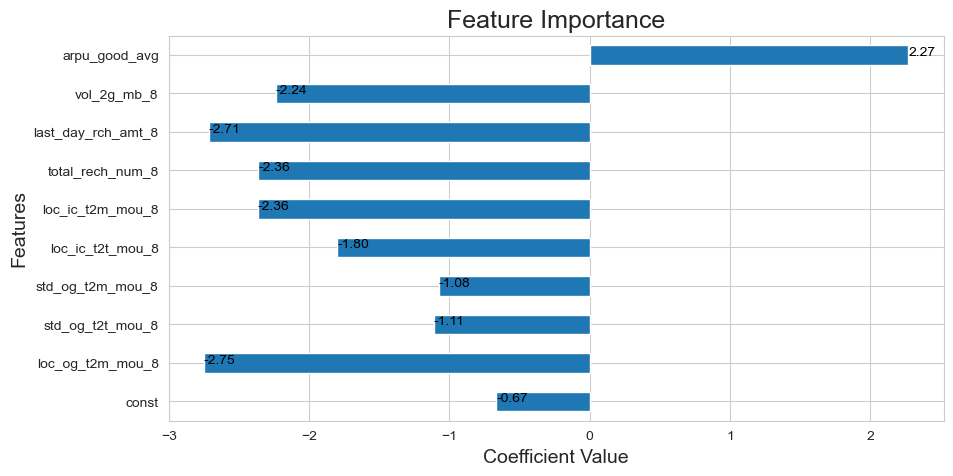

In [382]:
plt.figure(figsize = (10,5))
res.params.plot(kind = "barh")
plt.title("Feature Importance", fontsize = 18)
plt.ylabel("Features", fontsize = 14)
plt.xlabel("Coefficient Value", fontsize = 14)
for i, v in enumerate(res.params):
    plt.text(v,i,f"{v:.2f}", ha='left',
fontsize=10,
color = 'black')
plt.show()

We can observe that the top 3 features to decide if a customer will churn or not are below:

1. loc_og_t2m_mou_8=-2.75
2. last_day_rch_amt_8 =-2.71
3. total_rech_num_8 and loc_ic_t2m_mou_8 = -2.36